In [394]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
import numpy as np
import scipy.cluster.hierarchy as spc
import random 

# extra imports for SVM 
import matplotlib.colors as colors 
from sklearn.utils import resample # downsample the dataset 
from sklearn.model_selection import train_test_split # split data into training and test sets
from sklearn.preprocessing import scale # scale and center data
from sklearn.svm import SVC # make a SVM for classification
from sklearn.model_selection import GridSearchCV # cross validation
from sklearn.metrics import confusion_matrix # creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
from sklearn.decomposition import PCA # performs PCA to plot the data

from dython.nominal import associations
from dython.nominal import cluster_correlations
from dython.nominal import cramers_v
from dython.nominal import theils_u
from dython.nominal import correlation_ratio
from dython.nominal import identify_nominal_columns
from dython.nominal import identify_numeric_columns
from scipy.stats import chi2_contingency
from sklearn.feature_selection import chi2

from sklearn.metrics import jaccard_score
from sklearn.metrics import pairwise_distances

from sklearn.impute import SimpleImputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.impute import KNNImputer

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error

from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

Database consists of three variables:

1) Technical Variables
2) Data Variables 
3) Imputed Variables 

For (1), they assign a "unique identification number to each trans-Atlantic slaving voyage, keep track of changes since publication, and provide voyage groupings used for purposes of computing two key imputed variables, the total number of slaves embarked (SLAXIMP) anddisembarked (SLAMIMP)."

For (2), they are values that come directly from historical records. 

For (3), they are either computed from data variables (such as slave mortality rates) or infer data not found in existing documentation on the basis of patterns observed in data variables (such as embarkations ons slave voyages on ships of similar tonnage and rigging in the same period of time).

SPSS format of each variable:

F - standard numeric format
A - alphanumeric or string variable 
DATE - dates entered as yyyy-mm-dd

The number following a letter indicates its width or the number of characters allowed for entering data. Numbers are integers except for ratios and percentages. 

For examples, F8.5 indicates a width of 8 characters of which 5 follow the decimal point 

<font size="6">1) Technical Variables</font>

In [196]:
# technical variables are nominal
tech_var_ship_flag = {"XMIMPFLAG": "Voyage groupings for estimating imputed slaves"}
ship_flag = {1: "Spanish, pre-1626",
2: "Spanish, 1626-41",
3: "French, pre-1716",
4: "Pernambuco, pre-1701",
5: "Pernambuco, 1701-1800",
6: "Pernambuco, post-1800",
7: "Dutch, pre-1650",
8: "Dutch, 1650-73",
9: "Dutch, 1674-1730",
10: "Dutch, post-1730",
11: "Bahia, pre-1751",
14: "Bahia 1801-25",
15: "Bahia, post-1825",
16: "Spanish, 1642-62",
17: "Brig, pre-1751",
18: "Brig, 1776-1800",
19: "Brig, 1801-25",
20: "Brig, 1826-50",
21: "Brig, post-1850",
22: "Schooner, pre-1776",
23: "Schooner, 1776-1800",
24: "Schooner, 1801-25",
25: "Schooner, 1826-50",
26: "Schooner, 1851-66",
27: "Curveta, pre-1751",
28: "Curveta, 1751-75",
29: "Curveta, 1776-1800",
30: "Curveta, post-1800",
31: "Ship, pre-1726",
32: "Ship, 1726-50",
33: "Ship, 1751-75",
34: "Ship, 1776-1800",
35: "Ship, 1801-25",
36: "Ship, 1826-1850",
37: "Ship, post-1850",
38: "Schooner-brig",
39: "Smack",
40: "Patacho",
41: "Brigantine, pre-1776",
42: "Brigantine, 1776-1800",
43: "Brigantine, 1801-25",
44: "Brigantine, 1825-50",
45: "Brigantine, post-1850",
46: "Barque, pre-1826",
47: "Barque, 1826-50",
48: "Barque, 1851-75",
49: "Polacca",
50: "Pilot",
51: "Sumaca, pre-1751",
52: "Sumaca, 1751-76",
53: "Sumaca, 1776-1800",
54: "Sumaca, 1800-25",
55: "Sumaca, 1826-66",
56: "Felucca",
57: "Barqua",
58: "Navio Mercante",
59: "Chalupa",
60: "Galera, pre-1751",
61: "Galera, 1751-76",
62: "Galera, 1776-1800",
63: "Galera, 1801-25",
64: "Galera, post-1850",
65: "Sloop, pre-1751",
66: "Sloop, 1751-76",
67: "Sloop, 1776-1800",
68: "Sloop, post-1800",
69: "Steamer",
70: "Fregata, pre-1726",
71: "Fregata, 1726-75",
73: "Fluit",
74: "Snow, pre-1726",
75: "Snow, 1726-50",
76: "Snow, 1751-75",
77: "Snow, 1776-1800",
78: "Snow, post-1800",
79: "Bergantine, pre-1776",
80: "Bergantine, 1776-1800",
81: "Bergantine, 1801-25",
82: "Bergantine, 1826-75",
83: "Penque",
84: "Charrua",
85: "Fregata, post-1800",
86: "Balandra",
87: "Paquete",
88: "Iate, pre-1826",
89: "Iate, post-1825",
90: "Galeta, pre-1826",
91: "Galeta, 1826-50",
92: "Galeta, 1851-75",
93: "Small craft",
94: "Buque, pre-1726",
95: "Buque, 1726-1825",
97: "Fregata, 1776-1800",
98: "Brig, 1751-75",
99: "North America, pre-1851",
101: "Senegambia, pre-1701",
102: "Senegambia, 1701-1800",
103: "Senegambia, post-1800",
104: "Sierra Leone, pre-1701",
105: "Sierra Leone, 1701-1800",
106: "Sierra Leone, post-1800",
107: "Gold Cost, pre-1701",
108: "Gold Coast, post-1700",
110: "B. of Benin, pre-1700",
111: "B. of Benin, 1700-1800",
112: "B. of Benin, post-1800",
113: "B. of Biafra, pre-1700",
114: "B. of Biafra, 1700-1800",
115: "B. of Biafra, post-1800",
116: "WC Africa, pre-1701",
117: "WC Africa, 1701-1800",
118: "WC Africa, post-1800",
120: "Windward Coast",
122: "SE. Africa, pre-1701",
123: "SE. Africa, 1701-1800",
124: "SE. Africa, post-1800",
128: "No rig, 1651-75",
129: "No rig, 1676-1700",
130: "No rig, 1701-25",
131: "No rig, 1726-50",
132: "No rig, 1751-75",
133: "No rig, 1776-1800",
134: "No rig, 1801-25",
135: "No rig, 1826-50",
136: "No rig, 1851-66",
137: "US brig, pre-1776",
138: "US brig, 1776-1800",
139: "US brig, 1801-25",
140: "US brig, post-1825",
141: "US schooner, pre-1776",
142: "US schooner, 1776-1800",
143: "US schooner, 1801-25",
145: "US schooner, post-1825",
146: "US ship, pre-1776",
147: "US ship, 1776-1800",
148: "US ship, 1801-25",
149: "US ship, post-1825",
150: "US brigantine, pre-1776",
151: "US brigantine, 1776-1825",
152: "US brigantine, post-1825",
154: "US barque",
155: "US sloop",
156: "US snow",
157: "Danish, pre-1794",
159: "Danish, 1794-1806"
}


<font size="6">2) Data Variables</font>

In [197]:
# split between nominal and numerical categories 

ship_nation_owners = {"NATIONAL": "Country in which ship registered",
"TONNAGE": "Tonnage of vessel",
"TONTYPE": "Definition of ton used in tonnage",
"RIG": "Rig of vessel",
"GUNS": "Guns mounted",
"YRCONS": "Year of vessel's construction",
"PLACCONS": "Place where vessel constructed",
"CONSTREG": "Region where vessel constructed",
"YRREG": "Year of vessel's registration",
"PLACREG": "Place where vessel registered",
"REGISREG": "Region where vessel registered",
"OWNERA": "First owner of venture",
"OWNERB": "Second owner of venture",
"OWNERC": "Third owner of venture",
"OWNERD": "Fourth owner of venture",
"OWNERE": "Fifth owner of venture",
"OWNERF": "Sixth owner of venture",
"OWNERG": "Seventh owner of venture",
"OWNERH": "Eighth owner of venture",
"OWNERI": "Ninth owner of venture",
"OWNERJ": "Tenth owner of venture",
"OWNERK": "Eleventh owner of venture",
"OWNERL": "Twelfth owner of venture",
"OWNERM": "Thirteenth owner of venture",
"OWNERN": "Fourteenth owner of venture",
"OWNERO": "Fifteenth owner of venture",
"OWNERP": "Sixteenth owner of venture"
}
ship_nation_owners_nom = {"NATIONAL": "Country in which ship registered",
"TONTYPE": "Definition of ton used in tonnage",
"RIG": "Rig of vessel",
"YRCONS": "Year of vessel's construction",
"PLACCONS": "Place where vessel constructed",
"CONSTREG": "Region where vessel constructed",
"YRREG": "Year of vessel's registration",
"PLACREG": "Place where vessel registered",
"REGISREG": "Region where vessel registered",
"OWNERA": "First owner of venture",
"OWNERB": "Second owner of venture",
"OWNERC": "Third owner of venture",
"OWNERD": "Fourth owner of venture",
"OWNERE": "Fifth owner of venture",
"OWNERF": "Sixth owner of venture",
"OWNERG": "Seventh owner of venture",
"OWNERH": "Eighth owner of venture",
"OWNERI": "Ninth owner of venture",
"OWNERJ": "Tenth owner of venture",
"OWNERK": "Eleventh owner of venture",
"OWNERL": "Twelfth owner of venture",
"OWNERM": "Thirteenth owner of venture",
"OWNERN": "Fourteenth owner of venture",
"OWNERO": "Fifteenth owner of venture",
"OWNERP": "Sixteenth owner of venture"
}
ship_nation_owners_num = {"TONNAGE": "Tonnage of vessel",
"GUNS": "Guns mounted"
}

voyage_outcome = {"FATE": "Particular outcome of voyage",
"FATE2": "Outcome of voyage for slaves",
"FATE3": "Outcome of voyage if vessel captured",
"FATE4": "Outcome of voyage for owner",
"RESISTANCE": "African resistance"
}
voyage_outcome_nom = {"FATE": "Particular outcome of voyage",
"FATE2": "Outcome of voyage for slaves",
"FATE3": "Outcome of voyage if vessel captured",
"FATE4": "Outcome of voyage for owner",
"RESISTANCE": "African resistance"}

itinerary = {"PORTDEP": "Port of departure",
"EMBPORT": "First intended port of embarkation",
"EMBPORT2": "Second intended port of embarkation",
"EMBREG": "First intended region of purchase of slaves",
"EMBREG2": "Second intended region of purchase of slaves",
"ARRPORT": "First intended port of disembarkation",
"ARRPORT2": "Second intended port of disembarkation",
"REGARR": "First intended region of slave landing",
"REGARR2": "Second intended region of slave landing",
"NPPRETRA": "Number of ports of call prior to buying slaves",
"PLAC1TRA": "First place of slave purchase",
"PLAC2TRA": "Second place of slave purchase",
"PLAC3TRA": "Third place of slave purchase",
"REGEM1": "First region of embarkation of slaves",
"REGEM2": "Second region of embarkation of slaves",
"REGEM3": "Third region of embarkation of slaves",
"NPAFTTRA": "Port of call before Atlantic crossing",
"NPPRIOR": "Number of ports of call in Americas prior to slave of slaves",
"SLA1PORT": "First place of slave landing",
"ADPSALE1": "Second place of slave landing",
"ADPSALE2": "Third place of slave landing",
"REGDIS1": "First region of slave landing",
"REGDIS2": "Second region of slave landing",
"REGDIS3": "Third region of slave landing",
"PORTRET": "Place at which voyage ended",
"RETRNREG": "Region of return",
"RETRNREG1": "Broad region of return",
# "DEPTREGIMP": "Derived region where voyage began",
# "DEPTREGIMP1": "Derived broad region where voyage began",
"MAJBUYPT": "Principal place of slave purchase",
"MAJSELPT": "Principal port of slave disembarkation"
}
itinerary_nom = {"PORTDEP": "Port of departure",
"EMBPORT": "First intended port of embarkation",
"EMBPORT2": "Second intended port of embarkation",
"EMBREG": "First intended region of purchase of slaves",
"EMBREG2": "Second intended region of purchase of slaves",
"ARRPORT": "First intended port of disembarkation",
"ARRPORT2": "Second intended port of disembarkation",
"REGARR": "First intended region of slave landing",
"REGARR2": "Second intended region of slave landing",
#"NPPRETRA": "Number of ports of call prior to buying slaves",
"PLAC1TRA": "First place of slave purchase",
"PLAC2TRA": "Second place of slave purchase",
"PLAC3TRA": "Third place of slave purchase",
"REGEM1": "First region of embarkation of slaves",
"REGEM2": "Second region of embarkation of slaves",
"REGEM3": "Third region of embarkation of slaves",
"NPAFTTRA": "Port of call before Atlantic crossing",
#"NPPRIOR": "Number of ports of call in Americas prior to slave of slaves",
"SLA1PORT": "First place of slave landing",
"ADPSALE1": "Second place of slave landing",
"ADPSALE2": "Third place of slave landing",
"REGDIS1": "First region of slave landing",
"REGDIS2": "Second region of slave landing",
"REGDIS3": "Third region of slave landing",
"PORTRET": "Place at which voyage ended",
"RETRNREG": "Region of return",
"RETRNREG1": "Broad region of return",
"DEPTREGIMP": "Derived region where voyage began",
"DEPTREGIMP1": "Derived broad region where voyage began",
"MAJBUYPT": "Principal place of slave purchase",
"MAJSELPT": "Principal port of slave disembarkation"}

itinerary_num = {"NPPRETRA": "Number of ports of call prior to buying slaves",
"NPPRIOR": "Number of ports of call in Americas prior to slave of slaves"}

voyage_dates = {"DATEDEPA": "Day that voyage began",
"DATEDEPB": "Month that voyage began",
"DATEDEPC": "Year that voyage began",
"D1SLATRA": "Day that slave purchase began",
"D1SLATRB": "Month that slave purchase began",
"D1SLATRC": "Year that slave purchase began",
"DLSLATRA": "Day that vessel left last slaving port",
"DLSLATRB": "Month that vessel left last lsaving port",
"DLSLATRC": "Year that vessel left last lsaving port",
"DATARR32": "Day of first disembarkation of slaves",
"DATARR33": "Month of first disembarkation of slaves",
"DATARR34": "Year of first disembarkation of slaves",
"DATARR36": "Day of arrival at second place of landing",
"DATARR37": "Month of arrival at second place of landing",
"DATARR38": "Year of arrival at second place of landing",
"DATARR39": "Day of third disembarkation of slaves",
"DATARR40": "Month of third disembarkation of slaves",
"DATARR41": "Year of third disembarkation of slaves",
"DDEPAM": "Day of departure from last place of landing",
"DDEPAMB": "Month of departure from last place of landing",
"DDEPAMC": "Year of departure from last place of landing",
"DATARR43": "Day on which voyage completed",
"DATARR44": "Month in which voyage completed",
"DATARR45": "Year in which voyage completed",
# "DATE_DEP": "Date that voyage began",
# "DATE_BUY": "Date that slave purchase began",
# "DATE_LEFTAFT": "Date that vessel left last slaving port",
# "DATE_LAND1": "Date that slaves landed at first place",
# "DATE_LAND2": "Date that slaves landed at second place",
# "DATE_LAND3": "Date that slaves landed at third place",
# "DATE_DEPAM": "Date ship left on return voyage",
# "DATE_END": "Date when voyage completed",
"VOYAGE": "Length of Middle Passage in days",
"YEAR5": "5-year period in which votage occurred",
"YEAR10": "Decade in whic voyage occurred",
"YEAR25": "Quarter-century in which voyage occurred",
"YEAR100": "Century in which voyage occurred",
"VOY1IMP": "Voyage length from home port to disembarkation (days)",
"VOY2IMP": "Voyage length from leaving Africa to disembarkation (days)"
}
voyage_dates_nom = {"DATEDEPA": "Day that voyage began",
"DATEDEPB": "Month that voyage began",
"DATEDEPC": "Year that voyage began",
"D1SLATRA": "Day that slave purchase began",
"D1SLATRB": "Month that slave purchase began",
"D1SLATRC": "Year that slave purchase began",
"DLSLATRA": "Day that vessel left last slaving port",
"DLSLATRB": "Month that vessel left last lsaving port",
"DLSLATRC": "Year that vessel left last lsaving port",
"DATARR32": "Day of first disembarkation of slaves",
"DATARR33": "Month of first disembarkation of slaves",
"DATARR34": "Year of first disembarkation of slaves",
"DATARR36": "Day of arrival at second place of landing",
"DATARR37": "Month of arrival at second place of landing",
"DATARR38": "Year of arrival at second place of landing",
"DATARR39": "Day of third disembarkation of slaves",
"DATARR40": "Month of third disembarkation of slaves",
"DATARR41": "Year of third disembarkation of slaves",
"DDEPAM": "Day of departure from last place of landing",
"DDEPAMB": "Month of departure from last place of landing",
"DDEPAMC": "Year of departure from last place of landing",
"DATARR43": "Day on which voyage completed",
"DATARR44": "Month in which voyage completed",
"DATARR45": "Year in which voyage completed",
# "DATE_DEP": "Date that voyage began",
# "DATE_BUY": "Date that slave purchase began",
# "DATE_LEFTAFT": "Date that vessel left last slaving port",
# "DATE_LAND1": "Date that slaves landed at first place",
# "DATE_LAND2": "Date that slaves landed at second place",
# "DATE_LAND3": "Date that slaves landed at third place",
# "DATE_DEPAM": "Date ship left on return voyage",
# "DATE_END": "Date when voyage completed",
"YEAR5": "5-year period in which votage occurred",
"YEAR10": "Decade in whic voyage occurred",
"YEAR25": "Quarter-century in which voyage occurred",
"YEAR100": "Century in which voyage occurred"
}
voyage_dates_num = {"VOYAGE": "Length of Middle Passage in days",
"VOY1IMP": "Voyage length from home port to disembarkation (days)",
"VOY2IMP": "Voyage length from leaving Africa to disembarkation (days)"}

captain_and_crew = {"CREW1": "Crew at voyage outset",
"CREW2": "Crew at departure from last port of slave purchase",
"CREW3": "Crew at first landing of slaves",
"CREW4": "Crew when return voyage began",
"CREW5": "Crew at end of voyage",
"CREW": "Number of crew unspecified",
"SAILD1": "Crew died before first place of trade in Africa",
"SAILD2": "Crew died while ship was on Africa coast",
"SAILD3": "Crew died during Middle Passage",
"SAILD4": "Crew died in the Americas",
"SAILD5": "Crew died on return voyage",
"CREWDIED": "Crew died during complete voyage",
"NDESERT": "Total number of crew deserted"
}
captain_and_crew_num = {"CREW1": "Crew at voyage outset",
"CREW2": "Crew at departure from last port of slave purchase",
"CREW3": "Crew at first landing of slaves",
"CREW4": "Crew when return voyage began",
"CREW5": "Crew at end of voyage",
"CREW": "Number of crew unspecified",
"SAILD1": "Crew died before first place of trade in Africa",
"SAILD2": "Crew died while ship was on Africa coast",
"SAILD3": "Crew died during Middle Passage",
"SAILD4": "Crew died in the Americas",
"SAILD5": "Crew died on return voyage",
"CREWDIED": "Crew died during complete voyage",
"NDESERT": "Total number of crew deserted"}

slaves_numbers = {"SLINTEND": "Slaves intended from first port of purchase",
"SLINTEN2": "Slaves intended from second port of purchase",
"NCAR13": "Slaves carried from first port of purchase",
"NCAR15": "Slaves carried from second port of purchase",
"NCAR17": "Slaves carried from third port of purchase",
"TSLAVESP": "Total slaves purchased",
"TSLAVESD": "Total slaves on board at departure from last slaving port",
"SLAARRIV": "Total slaves arrived at first port of disembarkation",
"SLAS32": "Slaves disembarked at first place",
"SLAS36": "Slaves disembarked at second place",
"SLAS39": "Slaves disembarked at third place"
}

# slave characteristics are all numerical categories 
slaves_charac = {"MEN1": "Men embarked at first port of purchase",
"WOMEN1": "Women embarked at first port of purchase",
"BOY1": "Boys embarked at first port of purchase",
"GIRL1": "Girls embarked at first port of purchase",
"ADULT1": "Adults embarked at first port of purchase",
"CHILD1": "Children embarked at first port of purchase",
"INFANT1": "Infants embarked at first port of purchase",
"MALE1": "Males embarked at first port of purchase",
"FEMALE1": "Females embarked at first port of purchase",
"MEN2": "Men who died on Middle Passage",
"WOMEN2": "Women who died on Middle Passage",
"BOY2": "Boys who died on Middle Passage",
"GIRL2": "Girls who died on Middle Passage",
"ADULT2": "Adults who died on Middle Passage",
"CHILD2": "Children who died on Middle Passage",
"MALE2": "Males who died on Middle Passage",
"FEMALE2": "Females who died on Middle Passage",
"MEN3": "Men disembarked at first place of landing",
"WOMEN3": "Women disembarked at first place of landing",
"BOY3": "Boys disembarked at first place of landing",
"GIRL3": "Girls disembarked at first place of landing",
"ADULT3": "Adults disembarked at first place of landing",
"CHILD3": "Children disembarked at first place of landing",
"INFANT3": "Infants disembarked at first place of landing",
"MALE3": "Males disembarked at first place of landing",
"FEMALE3": "Females disembarked at first place of landing",
"MEN4": "Men embarked at second port of purchase",
"WOMEN4": "Women embarked at second port of purchase",
"BOY4": "Boys embarked at second port of purchase",
"GIRL4": "Girl embarked at second port of purchase",
"ADULT4": "Adults embarked at second port of purchase",
"CHILD4": "Children embarked at second port of purchase",
"INFANT4": "Infants embarked at second port of purchase",
"MALE4": "Males embarked at second port of purchase",
"FEMALE4": "Females embarked second port of purchase",
"MEN5": "Men embarked at third port of purchase",
"WOMEN5": "Women embarked at third port of purchase",
"BOY5": "Boys embarked at third port of purchase",
"GIRL5": "Girls embarked at third port of purchase",
"ADULT5": "Adults embarked at third port of purchase",
"CHILD5": "Children embarked at third port of purchase",
"MALE5": "Males embarked at third port of purchase",
"FEMALE5": "Females embarked at third port of purchase",
"MEN6": "Men disembarked at second place of landing",
"WOMEN6": "Women disembarked at second place of landing",
"BOY6": "Boys disembarked at second place of landing",
"GIRL6": "Girls disembarked at second place of landing",
"ADULT6": "Adults disembarked at second place of landing",
"CHILD6": "Children disembarked at second place of landing",
"MALE6": "Males disembarked at second place of landing",
"FEMALE6": "Females disembarked at second place of landing",
"SLADAFRI": "Slaves deaths before leaving Africa",
"SLADVOY": "Slaves deaths between African and the Americas",
"SLADAMER": "Slaves deaths between arrival and sale",
# "ADLT1IMP": "Derived number of adult embarked",
# "CHIL1IMP": "Derived number of children embarked",
# "MALE1IMP": "Derived number of males embarked",
# "FEML1IMP": "Derived number of females embarked",
"SLAVMAX1": "Total slaves embarked with age and gender identified",
"SLAVEMA1": "Total slaves embarked with age identified",
"SLAVEMX1": "Total slaves embarked with gender identified",
"MENRAT1": "Percentage of men among embarked slaves",
"WOMRAT1": "Percentage of women among embarked slaves",
"BOYRAT1": "Percentage of boys among embarked slaves",
"GIRLRAT1": "Percentage of girls among embarked slaves",
"CHILRAT1": "Child ratio among embarked slaves",
"MALRAT1": "Male ratio among embarked slaves",
# "ADLT2IMP": "Derived number of adults who died on Middle Passage",
# "CHIL2IMP": "Derived number of children who died on Middle Passage",
# "MALE2IMP": "Derived number of males who died on Middle Passage",
# "FEML2IMP": "Derived number of females who died on Middle Passage",
# "ADLT3IMP": "Derived number of adults landed",
# "CHIL3IMP": "Derived number of children landed",
# "MALE3IMP": "Derived number of males landed",
# "FEML3IMP": "Derived number of females landed",
"SLAVMAX3": "Total slaves identified by age and gender among landed slaves",
"SLAVEMA3": "Total slaves identified by age among landed slaves",
"SLAVEMX3": "Total slaves identified by gender among landed slaves",
"MENRAT3": "Percentage of men among landed slaves",
"WOMRAT3": "Percentage of women among landed slaves",
"BOYRAT3": "Percentage of boys among landed slaves",
"GIRLRAT3": "Percentage of girls among landed slaves",
"CHILRAT3": "Child ratio among landed slaves",
"MALRAT3": "Male ratio among landed slaves",
"MEN7": "Derived number of men at departure or arrival",
"WOMEN7": "Derived number of women at departure or arrival",
"BOY7": "Derived number of boys at departure or arrival",
"GIRL7": "Derived number of girls at departure or arrival",
"ADULT7": "Derived number of adults at departure or arrival",
"CHILD7": "Derived number of children at departure or arrival",
"MALE7": "Derived number of males at departure or arrival",
"FEMALE7": "Derived number of females at departure or arrival",
"SLAVMAX7": "Total slaves identified by age and gender at departure or arrival",
"SLAVEMA7": "Total slaves identified by age at departure or arrival",
"SLAVEMX7": "Total slaves identified by gender at departure or arrival",
"MENRAT7": "Percentage of men at departure or arrival",
"WOMRAT7": "Percentage of women at departure or arrival",
"BOYRAT7": "Percentage of boys at departure or arrival",
"GIRLRAT7": "Percentage of girls at departure or arrival",
"CHILRAT7": "Child ratio at departure or arrival",
"MALRAT7": "Male ratio at departure or arrival",
# "TSLMTIMP": "Derived number of slaves embarked for mortality calculation",
# "VYMRTIMP": "Derived slave deaths during Middle Passage",
"VYMRTRAT": "Slave mortality rate (slave deaths / slaves embarked)",
"JAMCASPR": "Average price of slaves standardized on sterling cash price of prime slaves sold in Jamaica"
}


<font size="6">3) Imputed Variables</font>

In [198]:
ship_nation_owners_imp = {"NATINIMP": "Imputed country in which ship registered",
"TONMOD": "Tonnage stnadardized on British measured tons, 1773-1835"
}
ship_nation_owners_imp_nom = {"NATINIMP": "Imputed country in which ship registered"}
ship_nation_owners_imp_num = {"TONMOD": "Tonnage stnadardized on British measured tons, 1773-1835"}

# imputed itineraries are all nominal  
itinerary_imp = {"PTDEPIMP": "Imputed port where voyage began",
"MJBYPTIMP": "Imputed principal place of slave purchase",
"MAJBYIMP": "Imputed principal region of slave purchase",
"MAJBYIMP1": "Imputed broad region of slave purchase",
"MJSLPTIMP": "Imputed principal port of slave disembarkation",
"MJSELIMP": "Imputed principal region of slave disembarkation",
"MJSELIMP1": "Imputed broad region of slave disembarkation",
"DEPTREGIMP": "Derived region where voyage began",
"DEPTREGIMP1": "Derived broad region where voyage began"
}

# imputed voyage dates are all nominal 
voyage_dates_imp = {"YEARDEP": "Year voyage began (imputed)",
"YEARAF": "Year departed Africa (imputed)",
"YEARAM": "Year of arrival at port of disembarkation (imputed)"
}

# imputed slave numbers are all numerical 
slaves_numbers_imp = {"SLAXIMP": "Imputed total slaves embarked",
"SLAMIMP": "Imputed total slaves disembarked"
}

# imputed slave characteristics are all numerical 
slaves_charac_imputed = {"ADLT1IMP": "Derived number of adult embarked",
"ADLT2IMP": "Derived number of adults who died on Middle Passage",
"ADLT3IMP": "Derived number of adults landed",
"CHIL1IMP": "Derived number of children embarked",
"CHIL2IMP": "Derived number of children who died on Middle Passage",
"CHIL3IMP": "Derived number of children landed",
"MALE1IMP": "Derived number of males embarked",
"MALE2IMP": "Derived number of males who died on Middle Passage",
"MALE3IMP": "Derived number of males landed",
"FEML1IMP": "Derived number of females embarked",
"FEML2IMP": "Derived number of females who died on Middle Passage",
"FEML3IMP": "Derived number of females landed",      
"TSLMTIMP": "Derived number of slaves embarked for mortality calculation",
"VYMRTIMP": "Derived slave deaths during Middle Passage"                   
}

<font size="6">4) Nominal vs. Numerical Data </font>

In [199]:
all_nominal = {"XMIMPFLAG": "Voyage groupings for estimating imputed slaves",
"NATIONAL": "Country in which ship registered",
"TONTYPE": "Definition of ton used in tonnage",
"RIG": "Rig of vessel",
"YRCONS": "Year of vessel's construction",
"PLACCONS": "Place where vessel constructed",
"CONSTREG": "Region where vessel constructed",
"YRREG": "Year of vessel's registration",
"PLACREG": "Place where vessel registered",
"REGISREG": "Region where vessel registered",
"OWNERA": "First owner of venture",
"OWNERB": "Second owner of venture",
"OWNERC": "Third owner of venture",
"OWNERD": "Fourth owner of venture",
"OWNERE": "Fifth owner of venture",
"OWNERF": "Sixth owner of venture",
"OWNERG": "Seventh owner of venture",
"OWNERH": "Eighth owner of venture",
"OWNERI": "Ninth owner of venture",
"OWNERJ": "Tenth owner of venture",
"OWNERK": "Eleventh owner of venture",
"OWNERL": "Twelfth owner of venture",
"OWNERM": "Thirteenth owner of venture",
"OWNERN": "Fourteenth owner of venture",
"OWNERO": "Fifteenth owner of venture",
"OWNERP": "Sixteenth owner of venture",
"FATE": "Particular outcome of voyage",
"FATE2": "Outcome of voyage for slaves",
"FATE3": "Outcome of voyage if vessel captured",
"FATE4": "Outcome of voyage for owner",
"RESISTANCE": "African resistance",
"PORTDEP": "Port of departure",
"EMBPORT": "First intended port of embarkation",
"EMBPORT2": "Second intended port of embarkation",
"EMBREG": "First intended region of purchase of slaves",
"EMBREG2": "Second intended region of purchase of slaves",
"ARRPORT": "First intended port of disembarkation",
"ARRPORT2": "Second intended port of disembarkation",
"REGARR": "First intended region of slave landing",
"REGARR2": "Second intended region of slave landing",
#"NPPRETRA": "Number of ports of call prior to buying slaves",
"PLAC1TRA": "First place of slave purchase",
"PLAC2TRA": "Second place of slave purchase",
"PLAC3TRA": "Third place of slave purchase",
"REGEM1": "First region of embarkation of slaves",
"REGEM2": "Second region of embarkation of slaves",
"REGEM3": "Third region of embarkation of slaves",
"NPAFTTRA": "Port of call before Atlantic crossing",
#"NPPRIOR": "Number of ports of call in Americas prior to slave of slaves",
"SLA1PORT": "First place of slave landing",
"ADPSALE1": "Second place of slave landing",
"ADPSALE2": "Third place of slave landing",
"REGDIS1": "First region of slave landing",
"REGDIS2": "Second region of slave landing",
"REGDIS3": "Third region of slave landing",
"PORTRET": "Place at which voyage ended",
"RETRNREG": "Region of return",
"RETRNREG1": "Broad region of return",
"DEPTREGIMP": "Derived region where voyage began",
"DEPTREGIMP1": "Derived broad region where voyage began",
"MAJBUYPT": "Principal place of slave purchase",
"MAJSELPT": "Principal port of slave disembarkation",
"DATEDEPA": "Day that voyage began",
"DATEDEPB": "Month that voyage began",
"DATEDEPC": "Year that voyage began",
"D1SLATRA": "Day that slave purchase began",
"D1SLATRB": "Month that slave purchase began",
"D1SLATRC": "Year that slave purchase began",
"DLSLATRA": "Day that vessel left last slaving port",
"DLSLATRB": "Month that vessel left last lsaving port",
"DLSLATRC": "Year that vessel left last lsaving port",
"DATARR32": "Day of first disembarkation of slaves",
"DATARR33": "Month of first disembarkation of slaves",
"DATARR34": "Year of first disembarkation of slaves",
"DATARR36": "Day of arrival at second place of landing",
"DATARR37": "Month of arrival at second place of landing",
"DATARR38": "Year of arrival at second place of landing",
"DATARR39": "Day of third disembarkation of slaves",
"DATARR40": "Month of third disembarkation of slaves",
"DATARR41": "Year of third disembarkation of slaves",
"DDEPAM": "Day of departure from last place of landing",
"DDEPAMB": "Month of departure from last place of landing",
"DDEPAMC": "Year of departure from last place of landing",
"DATARR43": "Day on which voyage completed",
"DATARR44": "Month in which voyage completed",
"DATARR45": "Year in which voyage completed",
# "DATE_DEP": "Date that voyage began",
# "DATE_BUY": "Date that slave purchase began",
# "DATE_LEFTAFT": "Date that vessel left last slaving port",
# "DATE_LAND1": "Date that slaves landed at first place",
# "DATE_LAND2": "Date that slaves landed at second place",
# "DATE_LAND3": "Date that slaves landed at third place",
# "DATE_DEPAM": "Date ship left on return voyage",
# "DATE_END": "Date when voyage completed",
"YEAR5": "5-year period in which votage occurred",
"YEAR10": "Decade in whic voyage occurred",
"YEAR25": "Quarter-century in which voyage occurred",
"YEAR100": "Century in which voyage occurred",
"NATINIMP": "Imputed country in which ship registered",
"PTDEPIMP": "Imputed port where voyage began",
"MJBYPTIMP": "Imputed principal place of slave purchase",
"MAJBYIMP": "Imputed principal region of slave purchase",
"MAJBYIMP1": "Imputed broad region of slave purchase",
"MJSLPTIMP": "Imputed principal port of slave disembarkation",
"MJSELIMP": "Imputed principal region of slave disembarkation",
"MJSELIMP1": "Imputed broad region of slave disembarkation",
"DEPTREGIMP": "Derived region where voyage began",
"DEPTREGIMP1": "Derived broad region where voyage began",
"YEARDEP": "Year voyage began (imputed)",
"YEARAF": "Year departed Africa (imputed)",
"YEARAM": "Year of arrival at port of disembarkation (imputed)"
}

all_numerical = {"TONNAGE": "Tonnage of vessel",
"GUNS": "Guns mounted",
"NPPRETRA": "Number of ports of call prior to buying slaves",
"NPPRIOR": "Number of ports of call in Americas prior to slave of slaves",
"VOYAGE": "Length of Middle Passage in days",
"VOY1IMP": "Voyage length from home port to disembarkation (days)",
"VOY2IMP": "Voyage length from leaving Africa to disembarkation (days)",
"CREW1": "Crew at voyage outset",
"CREW2": "Crew at departure from last port of slave purchase",
"CREW3": "Crew at first landing of slaves",
"CREW4": "Crew when return voyage began",
"CREW5": "Crew at end of voyage",
"CREW": "Number of crew unspecified",
"SAILD1": "Crew died before first place of trade in Africa",
"SAILD2": "Crew died while ship was on Africa coast",
"SAILD3": "Crew died during Middle Passage",
"SAILD4": "Crew died in the Americas",
"SAILD5": "Crew died on return voyage",
"CREWDIED": "Crew died during complete voyage",
"NDESERT": "Total number of crew deserted",
"SLINTEND": "Slaves intended from first port of purchase",
"SLINTEN2": "Slaves intended from second port of purchase",
"NCAR13": "Slaves carried from first port of purchase",
"NCAR15": "Slaves carried from second port of purchase",
"NCAR17": "Slaves carried from third port of purchase",
"TSLAVESP": "Total slaves purchased",
"TSLAVESD": "Total slaves on board at departure from last slaving port",
"SLAARRIV": "Total slaves arrived at first port of disembarkation",
"SLAS32": "Slaves disembarked at first place",
"SLAS36": "Slaves disembarked at second place",
"SLAS39": "Slaves disembarked at third place",
"MEN1": "Men embarked at first port of purchase",
"WOMEN1": "Women embarked at first port of purchase",
"BOY1": "Boys embarked at first port of purchase",
"GIRL1": "Girls embarked at first port of purchase",
"ADULT1": "Adults embarked at first port of purchase",
"CHILD1": "Children embarked at first port of purchase",
"INFANT1": "Infants embarked at first port of purchase",
"MALE1": "Males embarked at first port of purchase",
"FEMALE1": "Females embarked at first port of purchase",
"MEN2": "Men who died on Middle Passage",
"WOMEN2": "Women who died on Middle Passage",
"BOY2": "Boys who died on Middle Passage",
"GIRL2": "Girls who died on Middle Passage",
"ADULT2": "Adults who died on Middle Passage",
"CHILD2": "Children who died on Middle Passage",
"MALE2": "Males who died on Middle Passage",
"FEMALE2": "Females who died on Middle Passage",
"MEN3": "Men disembarked at first place of landing",
"WOMEN3": "Women disembarked at first place of landing",
"BOY3": "Boys disembarked at first place of landing",
"GIRL3": "Girls disembarked at first place of landing",
"ADULT3": "Adults disembarked at first place of landing",
"CHILD3": "Children disembarked at first place of landing",
"INFANT3": "Infants disembarked at first place of landing",
"MALE3": "Males disembarked at first place of landing",
"FEMALE3": "Females disembarked at first place of landing",
"MEN4": "Men embarked at second port of purchase",
"WOMEN4": "Women embarked at second port of purchase",
"BOY4": "Boys embarked at second port of purchase",
"GIRL4": "Girl embarked at second port of purchase",
"ADULT4": "Adults embarked at second port of purchase",
"CHILD4": "Children embarked at second port of purchase",
"INFANT4": "Infants embarked at second port of purchase",
"MALE4": "Males embarked at second port of purchase",
"FEMALE4": "Females embarked second port of purchase",
"MEN5": "Men embarked at third port of purchase",
"WOMEN5": "Women embarked at third port of purchase",
"BOY5": "Boys embarked at third port of purchase",
"GIRL5": "Girls embarked at third port of purchase",
"ADULT5": "Adults embarked at third port of purchase",
"CHILD5": "Children embarked at third port of purchase",
"MALE5": "Males embarked at third port of purchase",
"FEMALE5": "Females embarked at third port of purchase",
"MEN6": "Men disembarked at second place of landing",
"WOMEN6": "Women disembarked at second place of landing",
"BOY6": "Boys disembarked at second place of landing",
"GIRL6": "Girls disembarked at second place of landing",
"ADULT6": "Adults disembarked at second place of landing",
"CHILD6": "Children disembarked at second place of landing",
"MALE6": "Males disembarked at second place of landing",
"FEMALE6": "Females disembarked at second place of landing",
"SLADAFRI": "Slaves deaths before leaving Africa",
"SLADVOY": "Slaves deaths between African and the Americas",
"SLADAMER": "Slaves deaths between arrival and sale",
# "ADLT1IMP": "Derived number of adult embarked",
# "CHIL1IMP": "Derived number of children embarked",
# "MALE1IMP": "Derived number of males embarked",
# "FEML1IMP": "Derived number of females embarked",
"SLAVMAX1": "Total slaves embarked with age and gender identified",
"SLAVEMA1": "Total slaves embarked with age identified",
"SLAVEMX1": "Total slaves embarked with gender identified",
"MENRAT1": "Percentage of men among embarked slaves",
"WOMRAT1": "Percentage of women among embarked slaves",
"BOYRAT1": "Percentage of boys among embarked slaves",
"GIRLRAT1": "Percentage of girls among embarked slaves",
"CHILRAT1": "Child ratio among embarked slaves",
"MALRAT1": "Male ratio among embarked slaves",
# "ADLT2IMP": "Derived number of adults who died on Middle Passage",
# "CHIL2IMP": "Derived number of children who died on Middle Passage",
# "MALE2IMP": "Derived number of males who died on Middle Passage",
# "FEML2IMP": "Derived number of females who died on Middle Passage",
# "ADLT3IMP": "Derived number of adults landed",
# "CHIL3IMP": "Derived number of children landed",
# "MALE3IMP": "Derived number of males landed",
# "FEML3IMP": "Derived number of females landed",
"SLAVMAX3": "Total slaves identified by age and gender among landed slaves",
"SLAVEMA3": "Total slaves identified by age among landed slaves",
"SLAVEMX3": "Total slaves identified by gender among landed slaves",
"MENRAT3": "Percentage of men among landed slaves",
"WOMRAT3": "Percentage of women among landed slaves",
"BOYRAT3": "Percentage of boys among landed slaves",
"GIRLRAT3": "Percentage of girls among landed slaves",
"CHILRAT3": "Child ratio among landed slaves",
"MALRAT3": "Male ratio among landed slaves",
"MEN7": "Derived number of men at departure or arrival",
"WOMEN7": "Derived number of women at departure or arrival",
"BOY7": "Derived number of boys at departure or arrival",
"GIRL7": "Derived number of girls at departure or arrival",
"ADULT7": "Derived number of adults at departure or arrival",
"CHILD7": "Derived number of children at departure or arrival",
"MALE7": "Derived number of males at departure or arrival",
"FEMALE7": "Derived number of females at departure or arrival",
"SLAVMAX7": "Total slaves identified by age and gender at departure or arrival",
"SLAVEMA7": "Total slaves identified by age at departure or arrival",
"SLAVEMX7": "Total slaves identified by gender at departure or arrival",
"MENRAT7": "Percentage of men at departure or arrival",
"WOMRAT7": "Percentage of women at departure or arrival",
"BOYRAT7": "Percentage of boys at departure or arrival",
"GIRLRAT7": "Percentage of girls at departure or arrival",
"CHILRAT7": "Child ratio at departure or arrival",
"MALRAT7": "Male ratio at departure or arrival",
# "TSLMTIMP": "Derived number of slaves embarked for mortality calculation",
# "VYMRTIMP": "Derived slave deaths during Middle Passage",
"VYMRTRAT": "Slave mortality rate (slave deaths / slaves embarked)",
"JAMCASPR": "Average price of slaves standardized on sterling cash price of prime slaves sold in Jamaica",
"TONMOD": "Tonnage stnadardized on British measured tons, 1773-1835",
"SLAXIMP": "Imputed total slaves embarked",
"SLAMIMP": "Imputed total slaves disembarked",
"ADLT1IMP": "Derived number of adult embarked",
"ADLT2IMP": "Derived number of adults who died on Middle Passage",
"ADLT3IMP": "Derived number of adults landed",
"CHIL1IMP": "Derived number of children embarked",
"CHIL2IMP": "Derived number of children who died on Middle Passage",
"CHIL3IMP": "Derived number of children landed",
"MALE1IMP": "Derived number of males embarked",
"MALE2IMP": "Derived number of males who died on Middle Passage",
"MALE3IMP": "Derived number of males landed",
"FEML1IMP": "Derived number of females embarked",
"FEML2IMP": "Derived number of females who died on Middle Passage",
"FEML3IMP": "Derived number of females landed",      
"TSLMTIMP": "Derived number of slaves embarked for mortality calculation",
"VYMRTIMP": "Derived slave deaths during Middle Passage"  
} 

In [368]:
all_data = {"VOYAGEID": "Voyage identification number",
"EVGREEN": "Voyage in 1999 CD-ROM",
"XMIMPFLAG": "Voyage groupings for estimating imputed slaves",
"NATIONAL": "Country in which ship registered",
"TONTYPE": "Definition of ton used in tonnage",
"RIG": "Rig of vessel",
"YRCONS": "Year of vessel's construction",
"PLACCONS": "Place where vessel constructed",
"CONSTREG": "Region where vessel constructed",
"YRREG": "Year of vessel's registration",
"PLACREG": "Place where vessel registered",
"REGISREG": "Region where vessel registered",
"OWNERA": "First owner of venture",
"OWNERB": "Second owner of venture",
"OWNERC": "Third owner of venture",
"OWNERD": "Fourth owner of venture",
"OWNERE": "Fifth owner of venture",
"OWNERF": "Sixth owner of venture",
"OWNERG": "Seventh owner of venture",
"OWNERH": "Eighth owner of venture",
"OWNERI": "Ninth owner of venture",
"OWNERJ": "Tenth owner of venture",
"OWNERK": "Eleventh owner of venture",
"OWNERL": "Twelfth owner of venture",
"OWNERM": "Thirteenth owner of venture",
"OWNERN": "Fourteenth owner of venture",
"OWNERO": "Fifteenth owner of venture",
"OWNERP": "Sixteenth owner of venture",
"FATE": "Particular outcome of voyage",
"FATE2": "Outcome of voyage for slaves",
"FATE3": "Outcome of voyage if vessel captured",
"FATE4": "Outcome of voyage for owner",
"RESISTANCE": "African resistance",
"PORTDEP": "Port of departure",
"EMBPORT": "First intended port of embarkation",
"EMBPORT2": "Second intended port of embarkation",
"EMBREG": "First intended region of purchase of slaves",
"EMBREG2": "Second intended region of purchase of slaves",
"ARRPORT": "First intended port of disembarkation",
"ARRPORT2": "Second intended port of disembarkation",
"REGARR": "First intended region of slave landing",
"REGARR2": "Second intended region of slave landing",
#"NPPRETRA": "Number of ports of call prior to buying slaves",
"PLAC1TRA": "First place of slave purchase",
"PLAC2TRA": "Second place of slave purchase",
"PLAC3TRA": "Third place of slave purchase",
"REGEM1": "First region of embarkation of slaves",
"REGEM2": "Second region of embarkation of slaves",
"REGEM3": "Third region of embarkation of slaves",
"NPAFTTRA": "Port of call before Atlantic crossing",
#"NPPRIOR": "Number of ports of call in Americas prior to slave of slaves",
"SLA1PORT": "First place of slave landing",
"ADPSALE1": "Second place of slave landing",
"ADPSALE2": "Third place of slave landing",
"REGDIS1": "First region of slave landing",
"REGDIS2": "Second region of slave landing",
"REGDIS3": "Third region of slave landing",
"PORTRET": "Place at which voyage ended",
"RETRNREG": "Region of return",
"RETRNREG1": "Broad region of return",
"DEPTREGIMP": "Derived region where voyage began",
"DEPTREGIMP1": "Derived broad region where voyage began",
"MAJBUYPT": "Principal place of slave purchase",
"MAJSELPT": "Principal port of slave disembarkation",
"DATEDEPA": "Day that voyage began",
"DATEDEPB": "Month that voyage began",
"DATEDEPC": "Year that voyage began",
"D1SLATRA": "Day that slave purchase began",
"D1SLATRB": "Month that slave purchase began",
"D1SLATRC": "Year that slave purchase began",
"DLSLATRA": "Day that vessel left last slaving port",
"DLSLATRB": "Month that vessel left last lsaving port",
"DLSLATRC": "Year that vessel left last lsaving port",
"DATARR32": "Day of first disembarkation of slaves",
"DATARR33": "Month of first disembarkation of slaves",
"DATARR34": "Year of first disembarkation of slaves",
"DATARR36": "Day of arrival at second place of landing",
"DATARR37": "Month of arrival at second place of landing",
"DATARR38": "Year of arrival at second place of landing",
"DATARR39": "Day of third disembarkation of slaves",
"DATARR40": "Month of third disembarkation of slaves",
"DATARR41": "Year of third disembarkation of slaves",
"DDEPAM": "Day of departure from last place of landing",
"DDEPAMB": "Month of departure from last place of landing",
"DDEPAMC": "Year of departure from last place of landing",
"DATARR43": "Day on which voyage completed",
"DATARR44": "Month in which voyage completed",
"DATARR45": "Year in which voyage completed",
# "DATE_DEP": "Date that voyage began",
# "DATE_BUY": "Date that slave purchase began",
# "DATE_LEFTAFT": "Date that vessel left last slaving port",
# "DATE_LAND1": "Date that slaves landed at first place",
# "DATE_LAND2": "Date that slaves landed at second place",
# "DATE_LAND3": "Date that slaves landed at third place",
# "DATE_DEPAM": "Date ship left on return voyage",
# "DATE_END": "Date when voyage completed",
"YEAR5": "5-year period in which votage occurred",
"YEAR10": "Decade in whic voyage occurred",
"YEAR25": "Quarter-century in which voyage occurred",
"YEAR100": "Century in which voyage occurred",
"NATINIMP": "Imputed country in which ship registered",
"PTDEPIMP": "Imputed port where voyage began",
"MJBYPTIMP": "Imputed principal place of slave purchase",
"MAJBYIMP": "Imputed principal region of slave purchase",
"MAJBYIMP1": "Imputed broad region of slave purchase",
"MJSLPTIMP": "Imputed principal port of slave disembarkation",
"MJSELIMP": "Imputed principal region of slave disembarkation",
"MJSELIMP1": "Imputed broad region of slave disembarkation",
"DEPTREGIMP": "Derived region where voyage began",
"DEPTREGIMP1": "Derived broad region where voyage began",
"YEARDEP": "Year voyage began (imputed)",
"YEARAF": "Year departed Africa (imputed)",
"YEARAM": "Year of arrival at port of disembarkation (imputed)",
"TONNAGE": "Tonnage of vessel",
"GUNS": "Guns mounted",
"NPPRETRA": "Number of ports of call prior to buying slaves",
"NPPRIOR": "Number of ports of call in Americas prior to slave of slaves",
"VOYAGE": "Length of Middle Passage in days",
"VOY1IMP": "Voyage length from home port to disembarkation (days)",
"VOY2IMP": "Voyage length from leaving Africa to disembarkation (days)",
"CREW1": "Crew at voyage outset",
"CREW2": "Crew at departure from last port of slave purchase",
"CREW3": "Crew at first landing of slaves",
"CREW4": "Crew when return voyage began",
"CREW5": "Crew at end of voyage",
"CREW": "Number of crew unspecified",
"SAILD1": "Crew died before first place of trade in Africa",
"SAILD2": "Crew died while ship was on Africa coast",
"SAILD3": "Crew died during Middle Passage",
"SAILD4": "Crew died in the Americas",
"SAILD5": "Crew died on return voyage",
"CREWDIED": "Crew died during complete voyage",
"NDESERT": "Total number of crew deserted",
"SLINTEND": "Slaves intended from first port of purchase",
"SLINTEN2": "Slaves intended from second port of purchase",
"NCAR13": "Slaves carried from first port of purchase",
"NCAR15": "Slaves carried from second port of purchase",
"NCAR17": "Slaves carried from third port of purchase",
"TSLAVESP": "Total slaves purchased",
"TSLAVESD": "Total slaves on board at departure from last slaving port",
"SLAARRIV": "Total slaves arrived at first port of disembarkation",
"SLAS32": "Slaves disembarked at first place",
"SLAS36": "Slaves disembarked at second place",
"SLAS39": "Slaves disembarked at third place",
"MEN1": "Men embarked at first port of purchase",
"WOMEN1": "Women embarked at first port of purchase",
"BOY1": "Boys embarked at first port of purchase",
"GIRL1": "Girls embarked at first port of purchase",
"ADULT1": "Adults embarked at first port of purchase",
"CHILD1": "Children embarked at first port of purchase",
"INFANT1": "Infants embarked at first port of purchase",
"MALE1": "Males embarked at first port of purchase",
"FEMALE1": "Females embarked at first port of purchase",
"MEN2": "Men who died on Middle Passage",
"WOMEN2": "Women who died on Middle Passage",
"BOY2": "Boys who died on Middle Passage",
"GIRL2": "Girls who died on Middle Passage",
"ADULT2": "Adults who died on Middle Passage",
"CHILD2": "Children who died on Middle Passage",
"MALE2": "Males who died on Middle Passage",
"FEMALE2": "Females who died on Middle Passage",
"MEN3": "Men disembarked at first place of landing",
"WOMEN3": "Women disembarked at first place of landing",
"BOY3": "Boys disembarked at first place of landing",
"GIRL3": "Girls disembarked at first place of landing",
"ADULT3": "Adults disembarked at first place of landing",
"CHILD3": "Children disembarked at first place of landing",
"INFANT3": "Infants disembarked at first place of landing",
"MALE3": "Males disembarked at first place of landing",
"FEMALE3": "Females disembarked at first place of landing",
"MEN4": "Men embarked at second port of purchase",
"WOMEN4": "Women embarked at second port of purchase",
"BOY4": "Boys embarked at second port of purchase",
"GIRL4": "Girl embarked at second port of purchase",
"ADULT4": "Adults embarked at second port of purchase",
"CHILD4": "Children embarked at second port of purchase",
"INFANT4": "Infants embarked at second port of purchase",
"MALE4": "Males embarked at second port of purchase",
"FEMALE4": "Females embarked second port of purchase",
"MEN5": "Men embarked at third port of purchase",
"WOMEN5": "Women embarked at third port of purchase",
"BOY5": "Boys embarked at third port of purchase",
"GIRL5": "Girls embarked at third port of purchase",
"ADULT5": "Adults embarked at third port of purchase",
"CHILD5": "Children embarked at third port of purchase",
"MALE5": "Males embarked at third port of purchase",
"FEMALE5": "Females embarked at third port of purchase",
"MEN6": "Men disembarked at second place of landing",
"WOMEN6": "Women disembarked at second place of landing",
"BOY6": "Boys disembarked at second place of landing",
"GIRL6": "Girls disembarked at second place of landing",
"ADULT6": "Adults disembarked at second place of landing",
"CHILD6": "Children disembarked at second place of landing",
"MALE6": "Males disembarked at second place of landing",
"FEMALE6": "Females disembarked at second place of landing",
"SLADAFRI": "Slaves deaths before leaving Africa",
"SLADVOY": "Slaves deaths between African and the Americas",
"SLADAMER": "Slaves deaths between arrival and sale",
# "ADLT1IMP": "Derived number of adult embarked",
# "CHIL1IMP": "Derived number of children embarked",
# "MALE1IMP": "Derived number of males embarked",
# "FEML1IMP": "Derived number of females embarked",
"SLAVMAX1": "Total slaves embarked with age and gender identified",
"SLAVEMA1": "Total slaves embarked with age identified",
"SLAVEMX1": "Total slaves embarked with gender identified",
"MENRAT1": "Percentage of men among embarked slaves",
"WOMRAT1": "Percentage of women among embarked slaves",
"BOYRAT1": "Percentage of boys among embarked slaves",
"GIRLRAT1": "Percentage of girls among embarked slaves",
"CHILRAT1": "Child ratio among embarked slaves",
"MALRAT1": "Male ratio among embarked slaves",
# "ADLT2IMP": "Derived number of adults who died on Middle Passage",
# "CHIL2IMP": "Derived number of children who died on Middle Passage",
# "MALE2IMP": "Derived number of males who died on Middle Passage",
# "FEML2IMP": "Derived number of females who died on Middle Passage",
# "ADLT3IMP": "Derived number of adults landed",
# "CHIL3IMP": "Derived number of children landed",
# "MALE3IMP": "Derived number of males landed",
# "FEML3IMP": "Derived number of females landed",
"SLAVMAX3": "Total slaves identified by age and gender among landed slaves",
"SLAVEMA3": "Total slaves identified by age among landed slaves",
"SLAVEMX3": "Total slaves identified by gender among landed slaves",
"MENRAT3": "Percentage of men among landed slaves",
"WOMRAT3": "Percentage of women among landed slaves",
"BOYRAT3": "Percentage of boys among landed slaves",
"GIRLRAT3": "Percentage of girls among landed slaves",
"CHILRAT3": "Child ratio among landed slaves",
"MALRAT3": "Male ratio among landed slaves",
"MEN7": "Derived number of men at departure or arrival",
"WOMEN7": "Derived number of women at departure or arrival",
"BOY7": "Derived number of boys at departure or arrival",
"GIRL7": "Derived number of girls at departure or arrival",
"ADULT7": "Derived number of adults at departure or arrival",
"CHILD7": "Derived number of children at departure or arrival",
"MALE7": "Derived number of males at departure or arrival",
"FEMALE7": "Derived number of females at departure or arrival",
"SLAVMAX7": "Total slaves identified by age and gender at departure or arrival",
"SLAVEMA7": "Total slaves identified by age at departure or arrival",
"SLAVEMX7": "Total slaves identified by gender at departure or arrival",
"MENRAT7": "Percentage of men at departure or arrival",
"WOMRAT7": "Percentage of women at departure or arrival",
"BOYRAT7": "Percentage of boys at departure or arrival",
"GIRLRAT7": "Percentage of girls at departure or arrival",
"CHILRAT7": "Child ratio at departure or arrival",
"MALRAT7": "Male ratio at departure or arrival",
# "TSLMTIMP": "Derived number of slaves embarked for mortality calculation",
# "VYMRTIMP": "Derived slave deaths during Middle Passage",
"VYMRTRAT": "Slave mortality rate (slave deaths / slaves embarked)",
"JAMCASPR": "Average price of slaves standardized on sterling cash price of prime slaves sold in Jamaica",
"TONMOD": "Tonnage stnadardized on British measured tons, 1773-1835",
"SLAXIMP": "Imputed total slaves embarked",
"SLAMIMP": "Imputed total slaves disembarked",
"ADLT1IMP": "Derived number of adult embarked",
"ADLT2IMP": "Derived number of adults who died on Middle Passage",
"ADLT3IMP": "Derived number of adults landed",
"CHIL1IMP": "Derived number of children embarked",
"CHIL2IMP": "Derived number of children who died on Middle Passage",
"CHIL3IMP": "Derived number of children landed",
"MALE1IMP": "Derived number of males embarked",
"MALE2IMP": "Derived number of males who died on Middle Passage",
"MALE3IMP": "Derived number of males landed",
"FEML1IMP": "Derived number of females embarked",
"FEML2IMP": "Derived number of females who died on Middle Passage",
"FEML3IMP": "Derived number of females landed",      
"TSLMTIMP": "Derived number of slaves embarked for mortality calculation",
"VYMRTIMP": "Derived slave deaths during Middle Passage",
"SOURCEA": "1st source of information",  
"SOURCEB": "2nd source of information",
"SOURCEC": "3rd source of information",  
"SOURCED": "4th source of information",
"SOURCEE": "5th source of information",  
"SOURCEF": "6th source of information",
"SOURCEG": "7th source of information",  
"SOURCEH": "8th source of information",
"SOURCEI": "9th source of information",  
"SOURCEJ": "10th source of information",
"SOURCEK": "11th source of information",  
"SOURCEL": "12th source of information",
"SOURCEM": "13th source of information",  
"SOURCEN": "14th source of information",
"SOURCEO": "15th source of information",  
"SOURCEP": "16th source of information",
"SOURCEQ": "17th source of information",  
"SOURCER": "18th source of information",
"filter_$": "Unsure",
"SHIPNAME": "Name of the ship"
} 

In [200]:
path = "database.csv"
#path = "tastdb-exp-2020.csv"
# df = pd.read_csv(path)
df = pd.read_csv(path, na_values=' ', low_memory=False)

In [726]:
df.head()

VOYAGEID  ADLT1IMP  ADLT2IMP  ADLT3IMP  ADPSALE1  ADPSALE2  ADULT1  ADULT2  \
0         1       NaN       1.0       NaN       NaN       NaN     NaN     NaN   
1         2       NaN       NaN       NaN       NaN       NaN     NaN     NaN   
2         3       NaN       NaN       NaN       NaN       NaN     NaN     NaN   
3         4       NaN       NaN       NaN       NaN       NaN     NaN     NaN   
4         5       NaN       NaN       NaN       NaN       NaN     NaN     NaN   

   ADULT3  ADULT4  ...  YEAR5  YEAR10  YEAR25  YEAR100  YEARAF  YEARAM  \
0     NaN     NaN  ...     64      32      13     1800    1816    1817   
1     NaN     NaN  ...     64      32      13     1800    1817    1817   
2     NaN     NaN  ...     64      32      13     1800    1817    1817   
3     NaN     NaN  ...     64      32      13     1800    1817    1817   
4     NaN     NaN  ...     64      32      13     1800    1817    1817   

   YEARDEP  YRCONS  YRREG  filter_$  
0     1816     NaN    NaN       0.0  
1     1816     NaN    NaN       0.0  
2     1816     NaN    NaN       0.0  
3     1816     NaN    NaN       0.0  
4     1817     NaN    NaN       0.0  

[5 rows x 274 columns]

In [201]:
df.shape

(36108, 274)

<font size="6">Professor Arlei's previous code for characterization of dataset</font>

In [ ]:
def dython_correlation(df, features, func, min_count):
    res = np.zeros((len(features), len(features)))
    
    idx = {}
    list_features = list(features.keys())
    for f in list_features:
        idx[f] = len(idx)
    
    for fi in features:
        for fj in features:
            if fi != fj:
                data = df[[fi, fj]].dropna()
                if data.shape[0] >= min_count:
                    assoc = associations(data, plot=False, compute_only=True)
                    corr = assoc['corr'][fi][fj]
                else:
                    corr = np.NAN
            else:
                corr = 1.
            res[idx[fi],idx[fj]] = corr
            
    return pd.DataFrame(res, list_features, list_features)

In [412]:
# find the percentage of data that is missing for each non-imputed category
missing = {}
for v in slaves_charac:
    missing[v] = df[v].isna().sum() / df.shape[0]

missing 

{'MEN1': 0.9748255234297108,
 'WOMEN1': 0.9758502270964883,
 'BOY1': 0.977567298105683,
 'GIRL1': 0.9797551789077212,
 'ADULT1': 0.9792012850337876,
 'CHILD1': 0.9852110335659687,
 'INFANT1': 0.9965658579816107,
 'MALE1': 0.9945995347291459,
 'FEMALE1': 0.9946549241165392,
 'MEN2': 0.9919685388279605,
 'WOMEN2': 0.9906391935305195,
 'BOY2': 0.9949595657472028,
 'GIRL2': 0.9964827739005206,
 'ADULT2': 0.9999723053063033,
 'CHILD2': 0.9980336767475352,
 'MALE2': 0.9987260440899524,
 'FEMALE2': 0.9993353273512795,
 'MEN3': 0.9151711532070456,
 'WOMEN3': 0.916112772792733,
 'BOY3': 0.9186883793065249,
 'GIRL3': 0.9218455743879472,
 'ADULT3': 0.9984767918466821,
 'CHILD3': 0.9929101584136479,
 'INFANT3': 0.9955688490085299,
 'MALE3': 0.9889775119087183,
 'FEMALE3': 0.989005206602415,
 'MEN4': 0.9959842694139803,
 'WOMEN4': 0.9960396588013737,
 'BOY4': 0.9962889110446439,
 'GIRL4': 0.9966212473690041,
 'ADULT4': 1.0,
 'CHILD4': 0.9998615265315166,
 'INFANT4': 0.9998061371441231,
 'MALE4': 0.

In [9]:
# the percentage of data that is missing in order
sorted_missing = dict(sorted(missing.items(), key=lambda item: item[1]))

for v in sorted_missing:
    print(v, sorted_missing[v], slaves_charac[v])

VYMRTIMP 0.8195136811786862 Derived slave deaths during Middle Passage
TSLMTIMP 0.8205383848454636 Derived number of slaves embarked for mortality calculation
VYMRTRAT 0.8206214689265536 Slave mortality rate (slave deaths / slaves embarked)
SLAVEMA7 0.8834607289243381 Total slaves identified by age at departure or arrival
ADULT7 0.8835161183117315 Derived number of adults at departure or arrival
CHILD7 0.8835438130054282 Derived number of children at departure or arrival
CHILRAT7 0.8835438130054282 Child ratio at departure or arrival
MALE7 0.8908552121413538 Derived number of males at departure or arrival
FEMALE7 0.8908552121413538 Derived number of females at departure or arrival
SLAVEMX7 0.8908552121413538 Total slaves identified by gender at departure or arrival
MALRAT7 0.8908552121413538 Male ratio at departure or arrival
SLADVOY 0.8916029688711643 Slaves deaths between African and the Americas
SLAVMAX7 0.9039271075661903 Total slaves identified by age and gender at departure or ar

In [10]:
for v in slaves_charac_imputed:
    
    print(v, "imputed = ", df[v].mean(), df[v].std(), " original = ", df[slaves_charac_imputed[v]].mean(), df[slaves_charac_imputed[v]].std())

ADLT1IMP imputed =  297.87258687258685 157.37723324213584  original =  393.31158455392807 127.96652212832531
ADLT2IMP imputed =  21.115384615384617 36.454211434931544  original =  26.0 nan
ADLT3IMP imputed =  184.2677137870855 113.33935741119123  original =  242.74545454545455 115.24261335400172
CHIL1IMP imputed =  38.56628056628057 46.679792299026815  original =  25.769662921348313 28.689339089147644
CHIL2IMP imputed =  8.793233082706767 14.23596665101684  original =  15.394366197183098 21.075021690034212
CHIL3IMP imputed =  57.460732984293195 49.973197538559724  original =  18.90234375 28.190010648590523
MALE1IMP imputed =  185.08739650413983 113.81623381757244  original =  210.23589743589744 132.45230903479643
MALE2IMP imputed =  48.50909090909091 42.02330602366084  original =  51.108695652173914 41.73526526991003
MALE3IMP imputed =  160.05011655011654 93.24944433679374  original =  195.6532663316583 97.16702686719918
FEML1IMP imputed =  98.44642857142857 61.49110595370499  original

In [11]:
corrs = df[list(slaves_charac.keys())].corr(min_periods=50)[list(slaves_charac.keys())]

In [12]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
corrs

MEN1    WOMEN1      BOY1     GIRL1    ADULT1    CHILD1  INFANT1  \
MEN1      1.000000  0.706061  0.274918  0.139560       NaN       NaN      NaN   
WOMEN1    0.706061  1.000000  0.184637  0.188115       NaN       NaN      NaN   
BOY1      0.274918  0.184637  1.000000  0.735164       NaN       NaN      NaN   
GIRL1     0.139560  0.188115  0.735164  1.000000       NaN       NaN      NaN   
ADULT1         NaN       NaN       NaN       NaN  1.000000  0.061847      NaN   
CHILD1         NaN       NaN       NaN       NaN  0.061847  1.000000      NaN   
INFANT1        NaN       NaN       NaN       NaN       NaN       NaN      1.0   
MALE1          NaN       NaN       NaN       NaN       NaN       NaN      NaN   
FEMALE1        NaN       NaN       NaN       NaN       NaN       NaN      NaN   
MEN2      0.417170  0.398256  0.194105  0.101042       NaN       NaN      NaN   
WOMEN2    0.134343  0.497361  0.130987  0.146631       NaN       NaN      NaN   
BOY2      0.116455  0.172208  0.433083  0.277317       NaN       NaN      NaN   
GIRL2    -0.003025  0.161282  0.272933  0.296758       NaN       NaN      NaN   
ADULT2         NaN       NaN       NaN       NaN       NaN       NaN      NaN   
CHILD2         NaN       NaN       NaN       NaN       NaN       NaN      NaN   
MALE2          NaN       NaN       NaN       NaN       NaN       NaN      NaN   
FEMALE2        NaN       NaN       NaN       NaN       NaN       NaN      NaN   
MEN3      0.848702  0.613206  0.149740  0.029545       NaN       NaN      NaN   
WOMEN3    0.509787  0.720347 -0.020131 -0.018598       NaN       NaN      NaN   
BOY3      0.200082  0.155660  0.890859  0.674082       NaN       NaN      NaN   
GIRL3     0.113917  0.141591  0.676072  0.829621       NaN       NaN      NaN   
ADULT3         NaN       NaN       NaN       NaN       NaN       NaN      NaN   
CHILD3         NaN       NaN       NaN       NaN       NaN       NaN      NaN   
INFANT3        NaN       NaN       NaN       NaN       NaN       NaN      NaN   
MALE3          NaN       NaN       NaN       NaN       NaN       NaN      NaN   
FEMALE3        NaN       NaN       NaN       NaN       NaN       NaN      NaN   
MEN4     -0.184138 -0.288127 -0.188682 -0.222775       NaN       NaN      NaN   
WOMEN4   -0.273118 -0.319748 -0.226276 -0.200522       NaN       NaN      NaN   
BOY4     -0.225581 -0.306969 -0.178455 -0.203856       NaN       NaN      NaN   
GIRL4    -0.318486 -0.404018 -0.330726 -0.364143       NaN       NaN      NaN   
ADULT4         NaN       NaN       NaN       NaN       NaN       NaN      NaN   
CHILD4         NaN       NaN       NaN       NaN       NaN       NaN      NaN   
INFANT4        NaN       NaN       NaN       NaN       NaN       NaN      NaN   
MALE4          NaN       NaN       NaN       NaN       NaN       NaN      NaN   
FEMALE4        NaN       NaN       NaN       NaN       NaN       NaN      NaN   
MEN5     -0.065367 -0.225577 -0.213624 -0.264885       NaN       NaN      NaN   
WOMEN5   -0.075385 -0.135704 -0.134435 -0.189643       NaN       NaN      NaN   
BOY5     -0.186078 -0.207199 -0.240621 -0.235493       NaN       NaN      NaN   
GIRL5          NaN       NaN       NaN       NaN       NaN       NaN      NaN   
ADULT5         NaN       NaN       NaN       NaN       NaN       NaN      NaN   
CHILD5         NaN       NaN       NaN       NaN       NaN       NaN      NaN   
MALE5          NaN       NaN       NaN       NaN       NaN       NaN      NaN   
FEMALE5        NaN       NaN       NaN       NaN       NaN       NaN      NaN   
MEN6           NaN       NaN       NaN       NaN       NaN       NaN      NaN   
WOMEN6         NaN       NaN       NaN       NaN       NaN       NaN      NaN   
BOY6           NaN       NaN       NaN       NaN       NaN       NaN      NaN   
GIRL6          NaN       NaN       NaN       NaN       NaN       NaN      NaN   
ADULT6         NaN       NaN       NaN       NaN       NaN       NaN      NaN   
CHILD6         NaN       NaN       NaN       

In [9]:
#Missingness correlation
missing = df[list(slaves_charac.keys())].isnull()

corr = dython_correlation(missing, slaves_charac, None, 0)

In [10]:
missing

MEN1  WOMEN1  BOY1  GIRL1  ADULT1  CHILD1  INFANT1  MALE1  FEMALE1  \
0      True    True  True   True    True    True     True   True     True   
1      True    True  True   True    True    True     True   True     True   
2      True    True  True   True    True    True     True   True     True   
3      True    True  True   True    True    True     True   True     True   
4      True    True  True   True    True    True     True   True     True   
...     ...     ...   ...    ...     ...     ...      ...    ...      ...   
36103  True    True  True   True    True    True     True   True     True   
36104  True    True  True   True    True    True     True   True     True   
36105  True    True  True   True    True    True     True   True     True   
36106  True    True  True   True    True    True     True   True     True   
36107  True    True  True   True    True    True     True   True     True   

       MEN2  ...  SLAVEMA7  SLAVEMX7  MENRAT7  WOMRAT7  BOYRAT7  GIRLRAT7  \
0      True  ...      True      True     True     True     True      True   
1      True  ...      True      True     True     True     True      True   
2      True  ...      True      True     True     True     True      True   
3      True  ...      True      True     True     True     True      True   
4      True  ...      True      True     True     True     True      True   
...     ...  ...       ...       ...      ...      ...      ...       ...   
36103  True  ...      True      True     True     True     True      True   
36104  True  ...      True      True     True     True     True      True   
36105  True  ...      True      True     True     True     True      True   
36106  True  ...      True      True     True     True     True      True   
36107  True  ...      True      True     True     True     True      True   

       CHILRAT7  MALRAT7  VYMRTRAT  JAMCASPR  
0          True     True     False      True  
1          True     True      True      True  
2          True     True     False      True  
3          True     True     False      True  
4          True     True      True      True  
...         ...      ...       ...       ...  
36103      True     True      True      True  
36104      True     True      True      True  
36105      True     True      True      True  
36106      True     True      True      True  
36107      True     True      True      True  

[36108 rows x 91 columns]

In [14]:
corr

MEN1    WOMEN1      BOY1     GIRL1    ADULT1    CHILD1  \
MEN1      1.000000  0.969709  0.935488  0.885715 -0.020943  0.012532   
WOMEN1    0.969709  1.000000  0.937364  0.900953 -0.020399  0.012112   
BOY1      0.935488  0.937364  1.000000  0.930332 -0.018146 -0.013912   
GIRL1     0.885715  0.900953  0.930332  1.000000 -0.018194 -0.012724   
ADULT1   -0.020943 -0.020399 -0.018146 -0.018194  1.000000  0.798863   
CHILD1    0.012532  0.012112 -0.013912 -0.012724  0.798863  1.000000   
INFANT1   0.044962  0.046274  0.045454  0.045344  0.008031 -0.003270   
MALE1    -0.007017 -0.006669 -0.006059 -0.007909 -0.005443 -0.002767   
FEMALE1  -0.004507 -0.004109 -0.003410 -0.002447 -0.005361 -0.002688   
MEN2      0.502488  0.513370  0.516468  0.500388 -0.010940 -0.008454   
WOMEN2    0.448850  0.458682  0.449433  0.435278 -0.012152 -0.004762   
BOY2      0.295621  0.304691  0.311403  0.311877 -0.007633 -0.002241   
GIRL2     0.238307  0.246626  0.246878  0.260509 -0.005381  0.000472   
ADULT2    0.032748  0.033453  0.034741  0.036611  0.036110 -0.000645   
CHILD2    0.136533  0.139623  0.145256  0.153422  0.076764  0.092967   
MALE2     0.147904  0.151168  0.151880  0.154740  0.000235 -0.004376   
FEMALE2   0.105608  0.107941  0.112196  0.118372  0.003771 -0.003160   
MEN3      0.251192  0.253831  0.252569  0.250538 -0.042282 -0.029890   
WOMEN3    0.246636  0.254353  0.250994  0.250881 -0.042702 -0.030454   
BOY3      0.245853  0.250889  0.255324  0.252223 -0.041228 -0.029734   
GIRL3     0.235106  0.241860  0.244346  0.256319 -0.040267 -0.029691   
ADULT3    0.002790  0.003108  0.003674  0.004470  0.019188  0.006981   
CHILD3    0.003277  0.003908  0.005031  0.006603  0.064013  0.060746   
INFANT3   0.015896  0.016666  0.018051  0.020016 -0.000958 -0.001265   
MALE3     0.008433  0.009311  0.010876  0.013076 -0.013527 -0.012935   
FEMALE3   0.008486  0.009364  0.010930  0.013130 -0.013506 -0.012918   
MEN4      0.314063  0.295239  0.289054  0.292481 -0.009254 -0.007780   
WOMEN4    0.319199  0.300299  0.291194  0.294638 -0.009190 -0.007726   
BOY4      0.310010  0.290057  0.282943  0.282285 -0.008895 -0.007478   
GIRL4     0.298346  0.276858  0.271567  0.269506 -0.008486 -0.007134   
ADULT4    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
CHILD4    0.028158  0.013481  0.014111  0.015020 -0.001715 -0.001442   
INFANT4   0.048556  0.036684  0.038190  0.026248 -0.002029 -0.001706   
MALE4     0.009486  0.009780  0.010311  0.011073 -0.002170 -0.001824   
FEMALE4   0.013133  0.013481  0.014111  0.015020 -0.001715 -0.001442   
MEN5      0.280114  0.274721  0.285341  0.275826 -0.002809 -0.000960   
WOMEN5    0.282025  0.276743  0.283511  0.274059 -0.002876 -0.001025   
BOY5      0.258010  0.250903  0.251840  0.251656 -0.006237 -0.005243   
GIRL5     0.219785  0.209826  0.212865  0.219052 -0.005372 -0.004516   
ADULT5    0.032748  0.033453  0.034741 -0.000756  0.036110  0.042954   
CHILD5    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
MALE5     0.032748  0.033453  0.034741 -0.000756  0.036110  0.042954   
FEMALE5   0.032748  0.033453  0.034741 -0.000756  0.036110  0.042954   
MEN6      0.073759  0.069304  0.059414  0.056213 -0.004272  0.004242   
WOMEN6    0.076572  0.071960  0.061723  0.058399 -0.004132  0.004626   
BOY6      0.061592  0.056306  0.065653  0.062119 -0.003912 -0.003289   
GIRL6     0.068183  0.063031  0.065653  0.062119 -0.003912 -0.003289   
ADULT6    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
CHILD6    0.022559  0.023070 -0.001127 -0.001070 -0.001085  0.029917   
MALE6    -0.001691 -0.001656 -0.001594 -0.001513 -0.001534 -0.001290   
FEMALE6  -0.001465 -0.001434 -0.001381 -0.001310 -0.001328 -0.001117   
SLADAFRI  0.278150  0.284443  0.281272  0.264160 -0.006625 -0.005911   
SLADVOY   0.171435  0.175528  0.179990  0.174430  0.002243  0.009680   
SLADAMER  0.137389  0.137481  0.136548  0.137796  0.028886  0.030549   
ADLT1IMP  0.718575  0.714246  0.687593  0.662328  0.61

Men embarked at first port of purchase vs Men disembarked at first place of landing


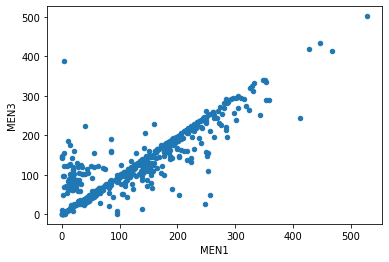

In [15]:
#Suspiciously correlated
df[['MEN1', 'MEN3']].plot.scatter(x='MEN1', y='MEN3')
print(slaves_charac['MEN1'], "vs", slaves_charac['MEN3'])

Men embarked at first port of purchase vs Women disembarked at first place of landing


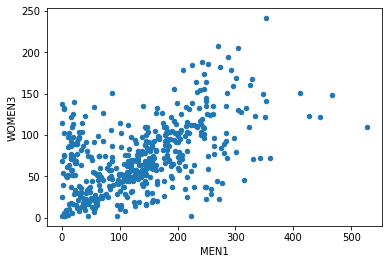

In [16]:
df[['MEN1', 'WOMEN3']].plot.scatter(x='MEN1', y='WOMEN3')
print(slaves_charac['MEN1'], "vs", slaves_charac['WOMEN3'])

Men embarked at first port of purchase vs Total slaves embarked with age and gender identified


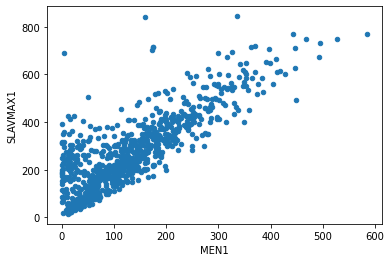

In [17]:
df[['MEN1', 'SLAVMAX1']].plot.scatter(x='MEN1', y='SLAVMAX1')
print(slaves_charac['MEN1'], "vs", slaves_charac['SLAVMAX1'])

Men embarked at first port of purchase vs Total slaves embarked with age identified


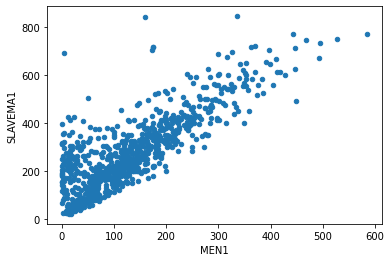

In [18]:
df[['MEN1', 'SLAVEMA1']].plot.scatter(x='MEN1', y='SLAVEMA1')
print(slaves_charac['MEN1'], "vs", slaves_charac['SLAVEMA1'])

Men embarked at first port of purchase vs Total slaves embarked with gender identified


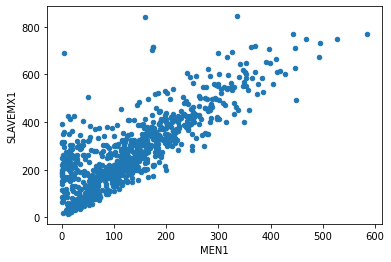

In [19]:
df[['MEN1', 'SLAVEMX1']].plot.scatter(x='MEN1', y='SLAVEMX1')
print(slaves_charac['MEN1'], "vs", slaves_charac['SLAVEMX1'])

Men embarked at first port of purchase vs Derived number of men at departure or arrival


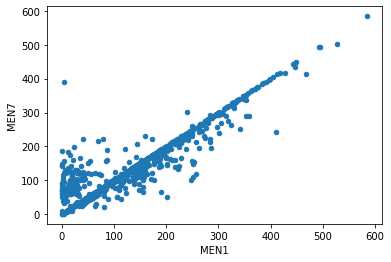

In [20]:
df[['MEN1', 'MEN7']].plot.scatter(x='MEN1', y='MEN7')
print(slaves_charac['MEN1'], "vs", slaves_charac['MEN7'])

Men embarked at first port of purchase vs Derived number of slaves embarked for mortality calculation


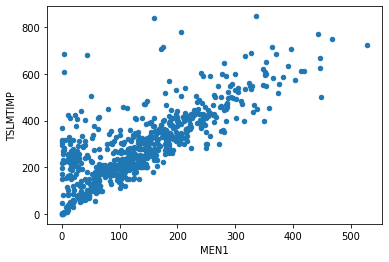

In [21]:
df[['MEN1', 'TSLMTIMP']].plot.scatter(x='MEN1', y='TSLMTIMP')
print(slaves_charac['MEN1'], "vs", slaves_charac['TSLMTIMP'])

Boys embarked at first port of purchase vs Girls embarked at first port of purchase


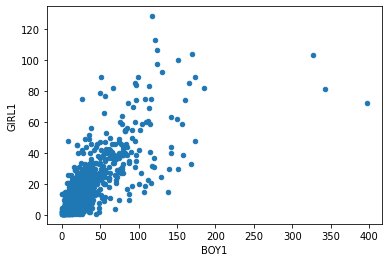

In [22]:
df[['BOY1', 'GIRL1']].plot.scatter(x='BOY1', y='GIRL1')
print(slaves_charac['BOY1'], "vs", slaves_charac['GIRL1'])

/Users/jessickmon/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


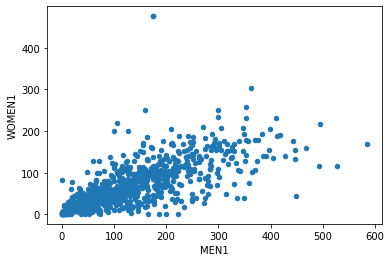

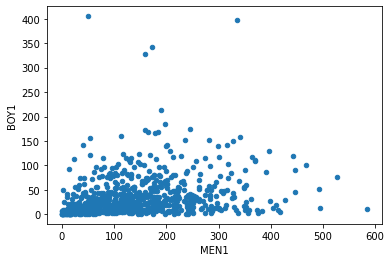

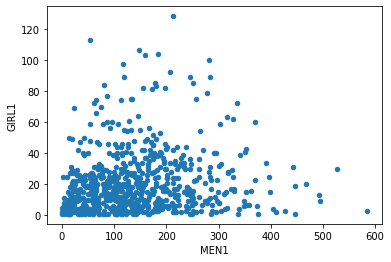

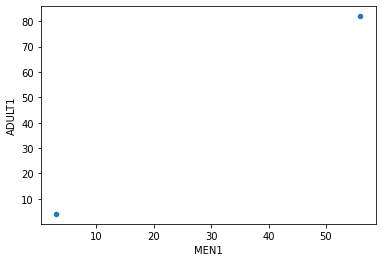

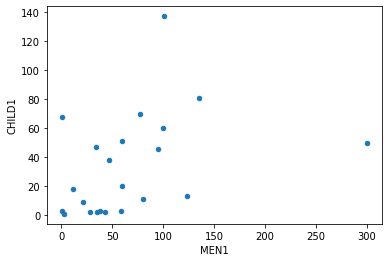

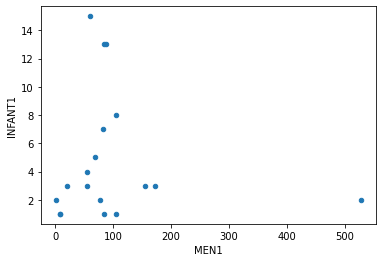

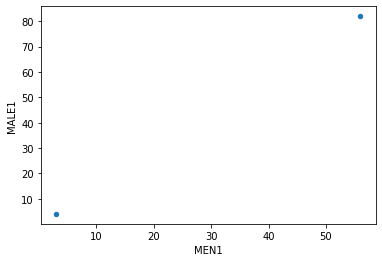

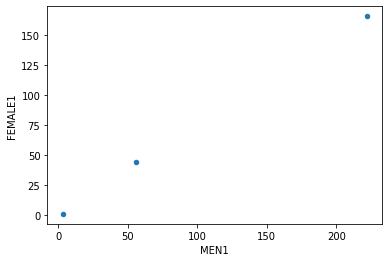

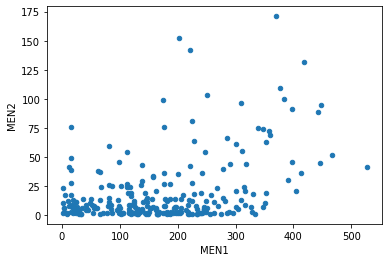

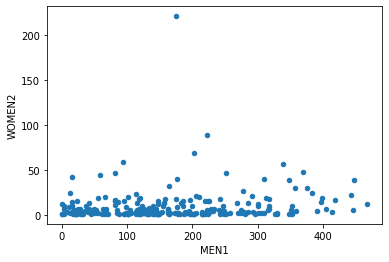

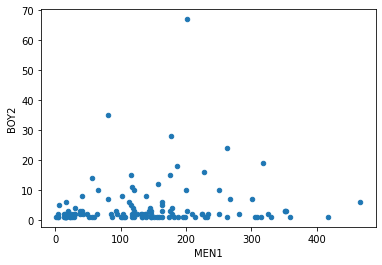

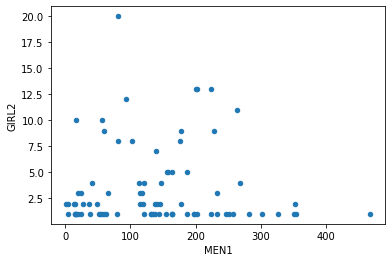

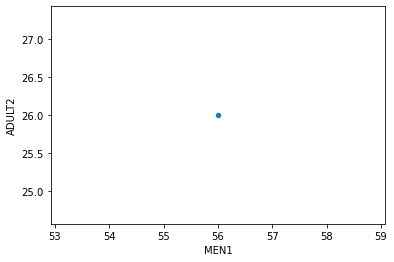

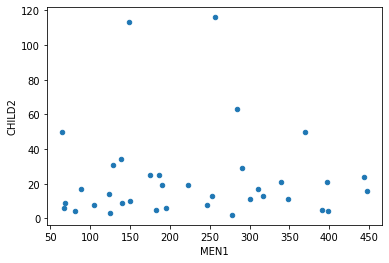

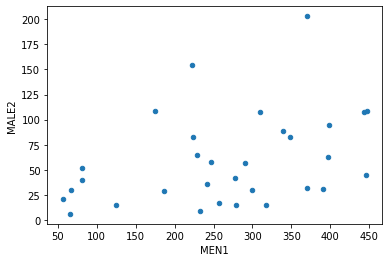

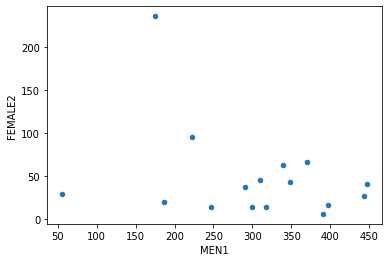

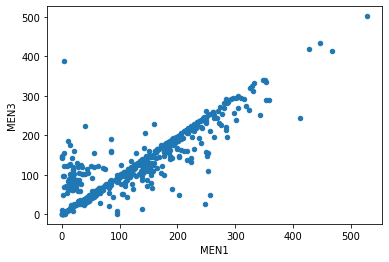

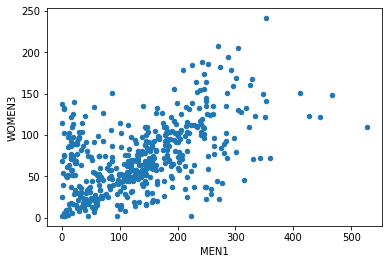

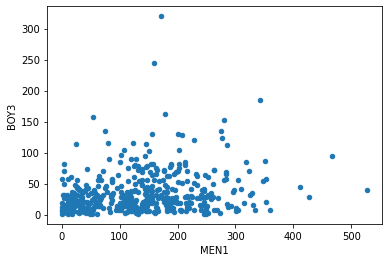

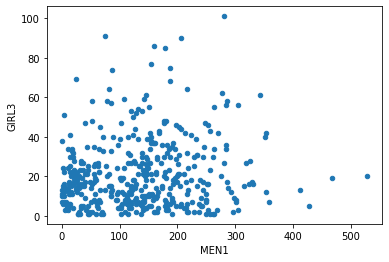

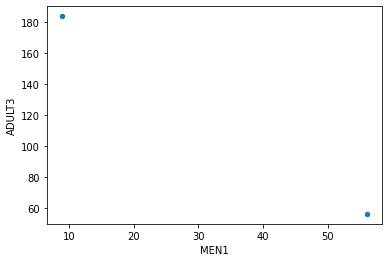

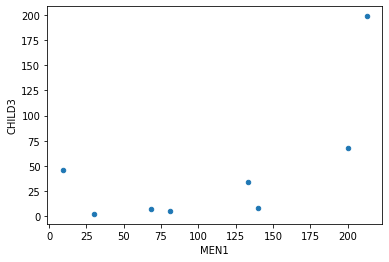

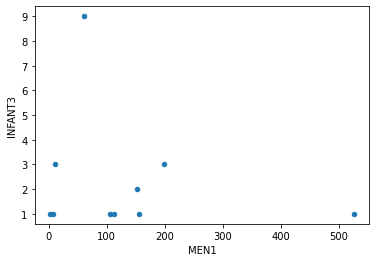

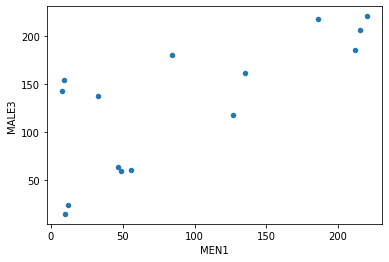

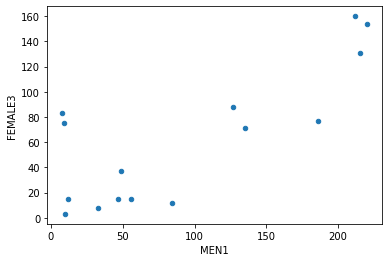

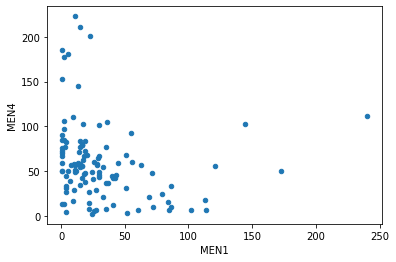

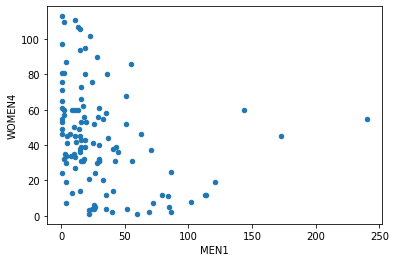

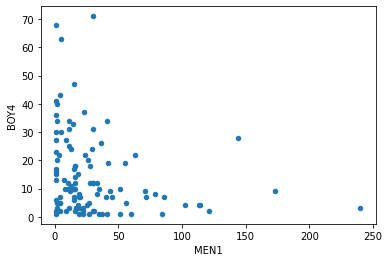

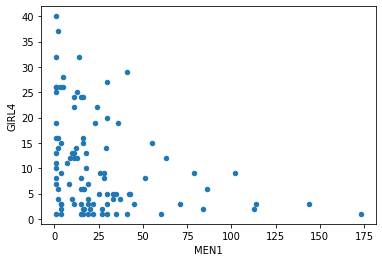

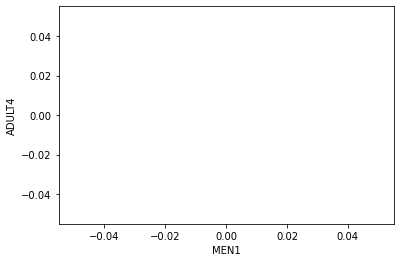

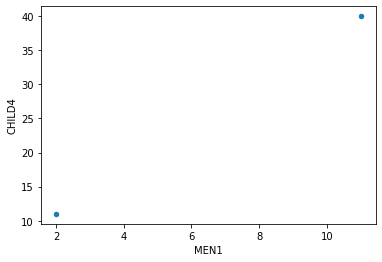

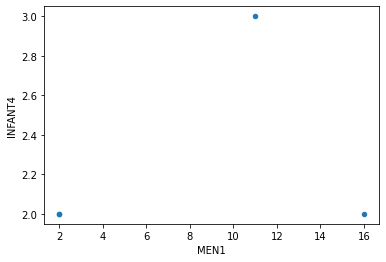

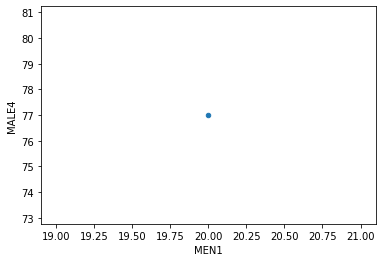

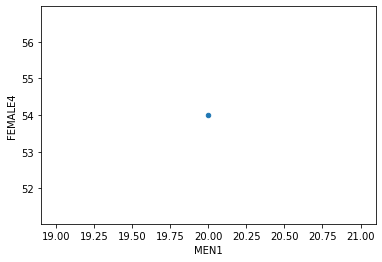

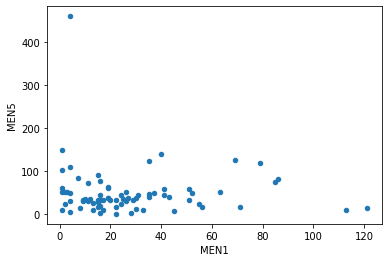

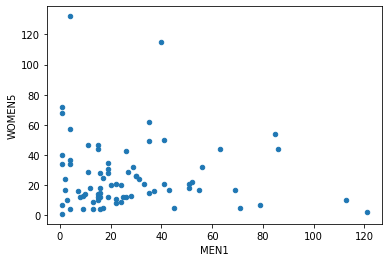

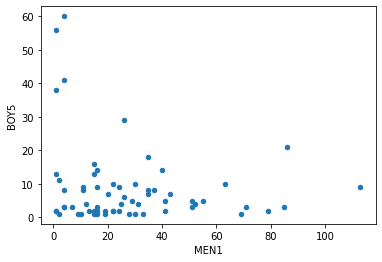

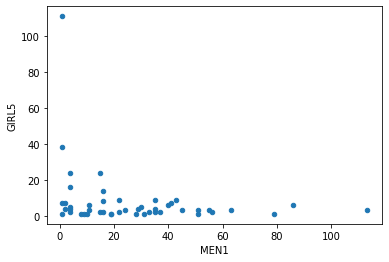

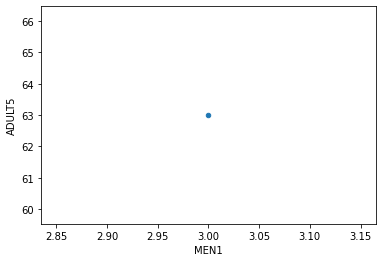

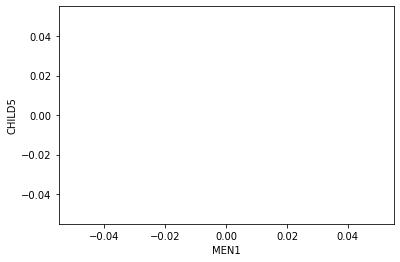

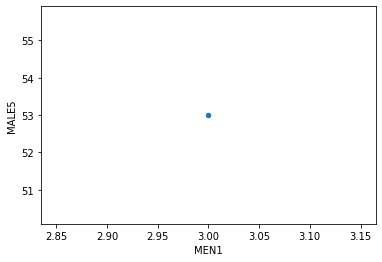

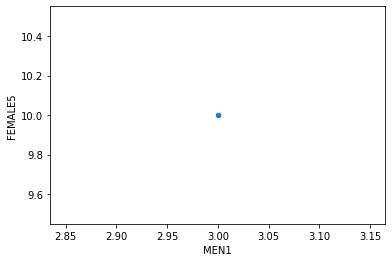

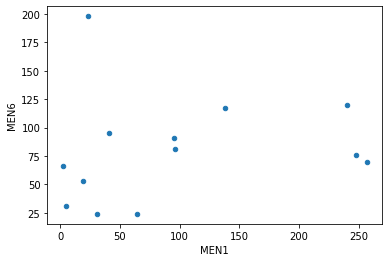

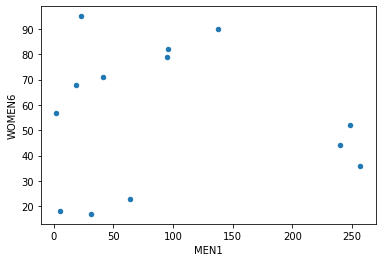

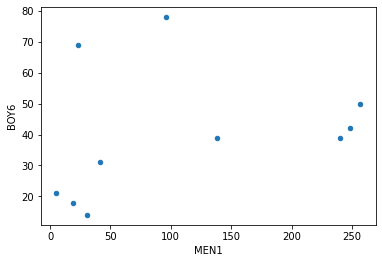

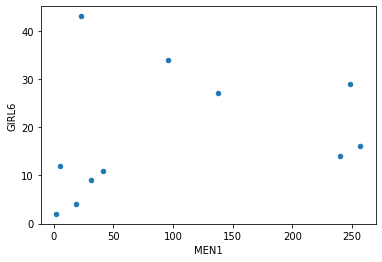

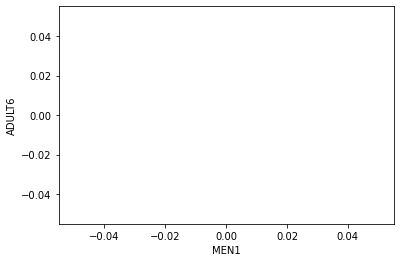

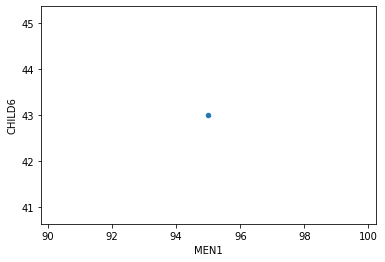

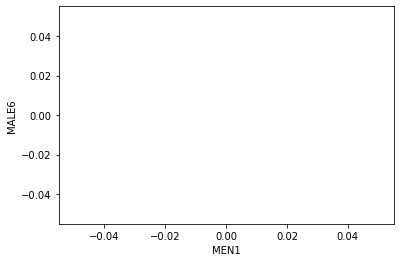

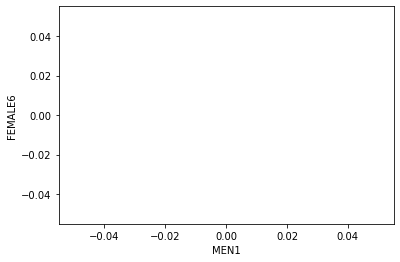

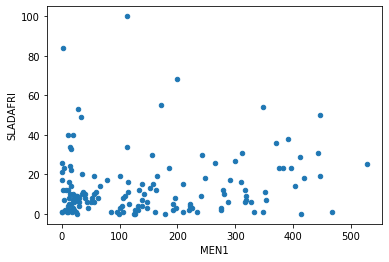

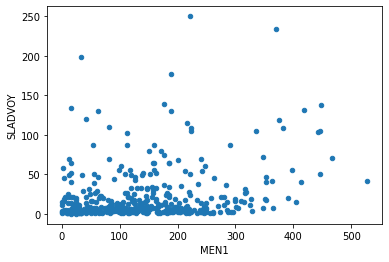

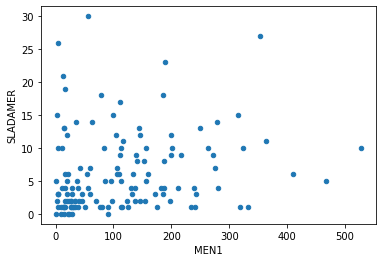

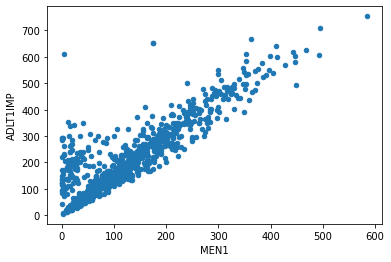

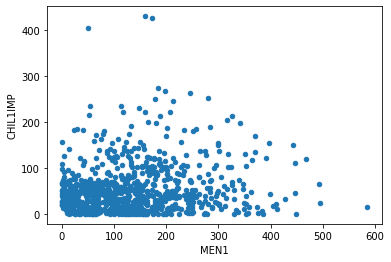

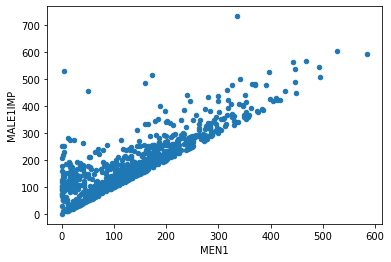

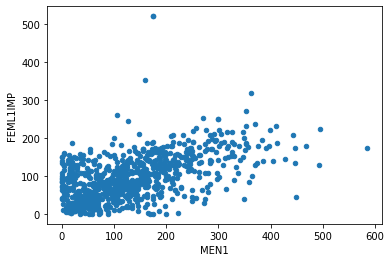

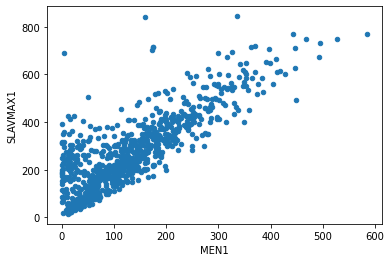

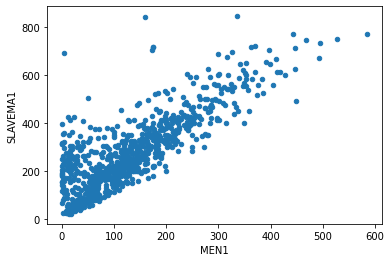

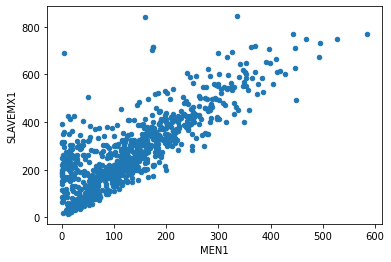

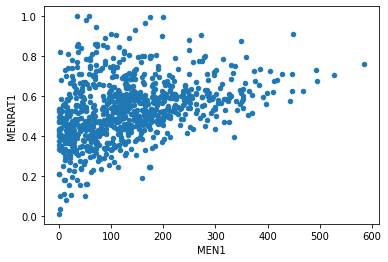

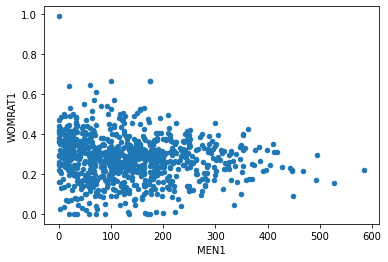

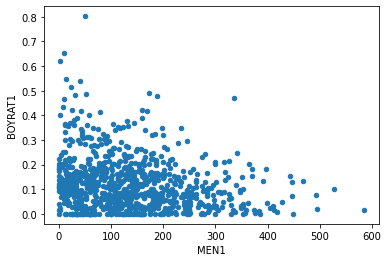

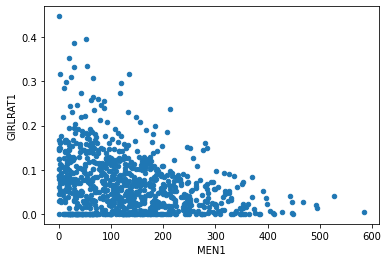

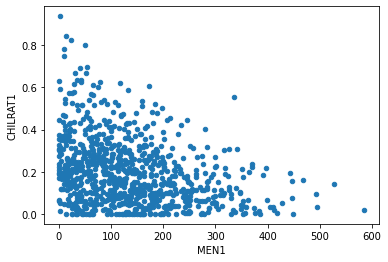

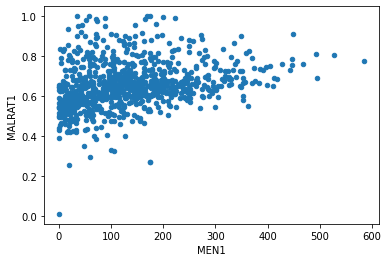

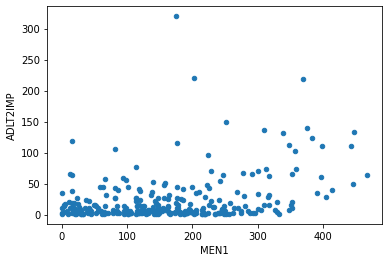

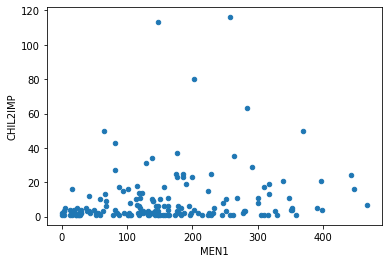

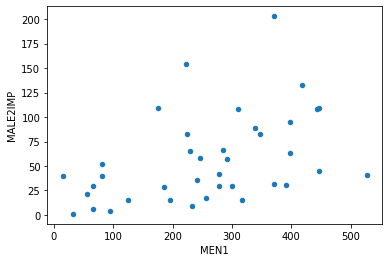

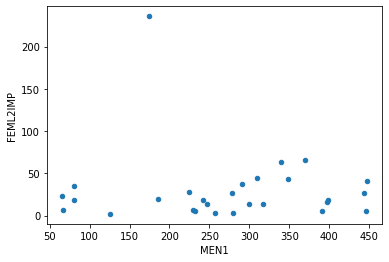

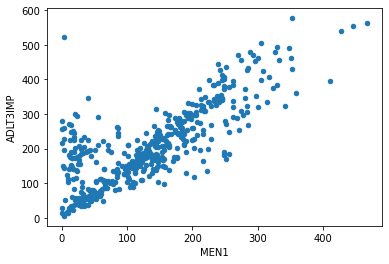

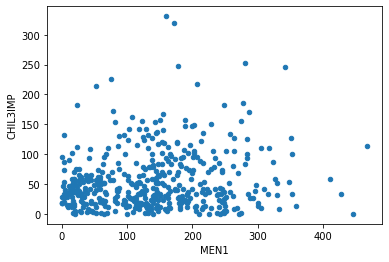

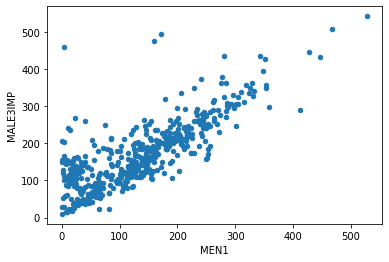

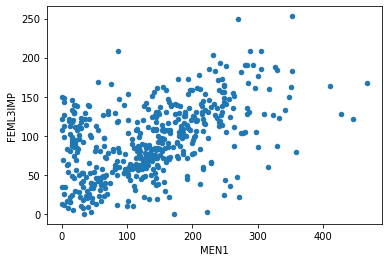

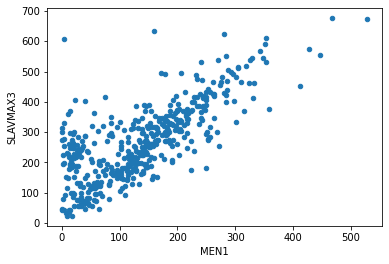

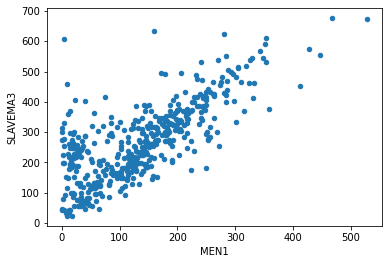

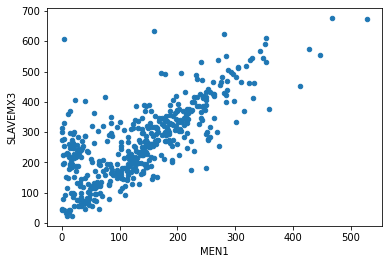

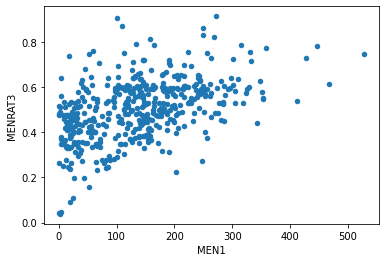

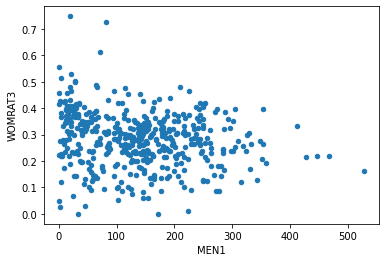

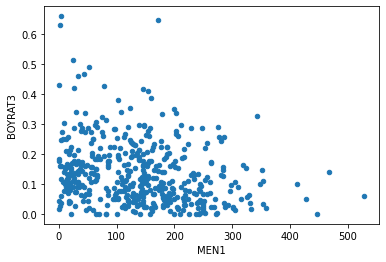

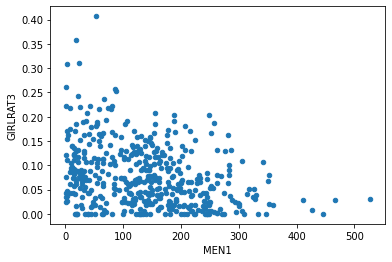

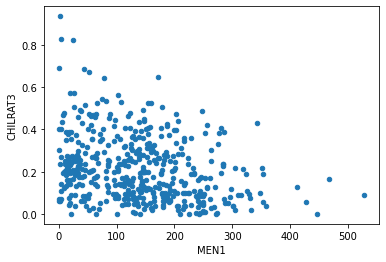

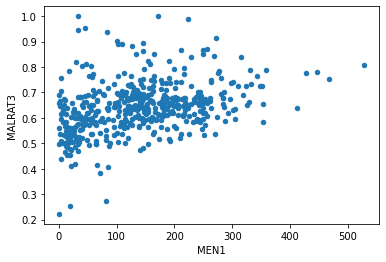

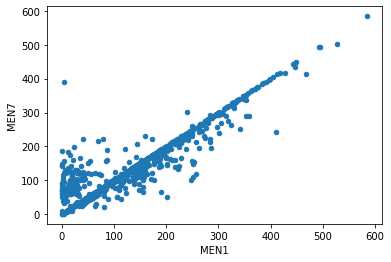

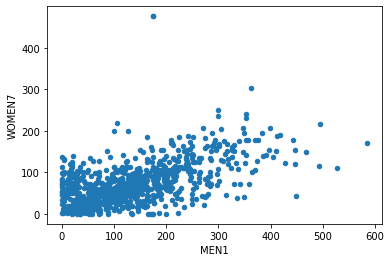

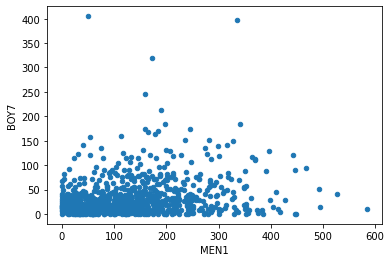

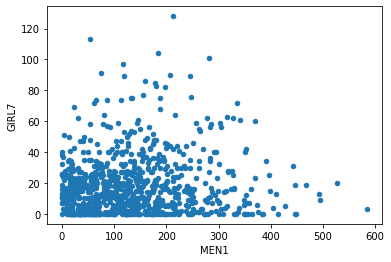

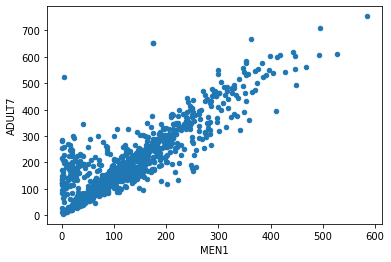

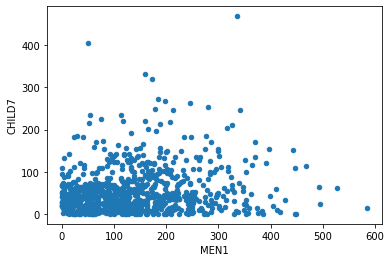

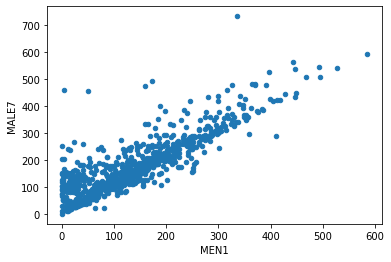

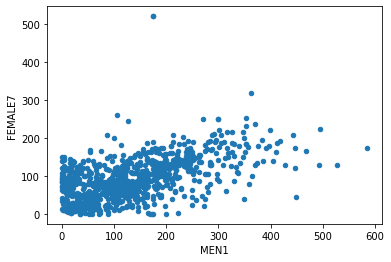

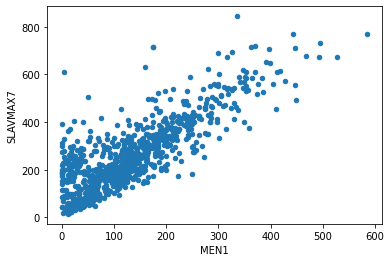

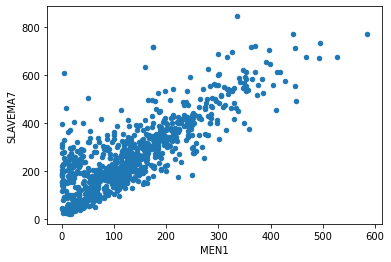

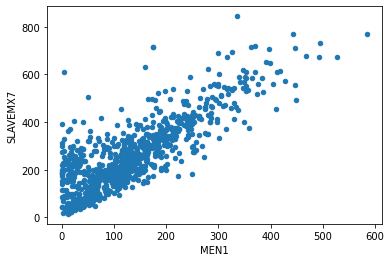

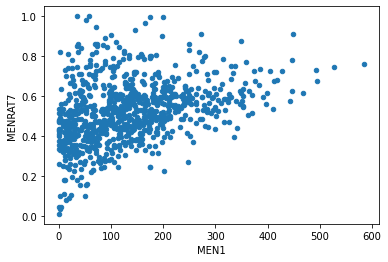

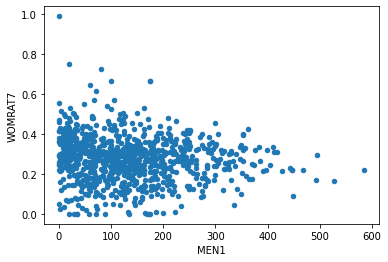

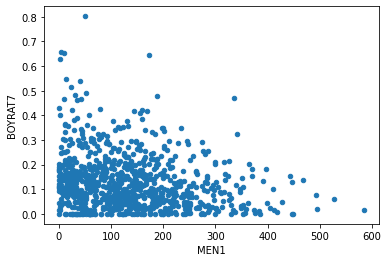

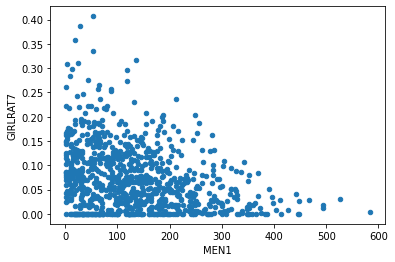

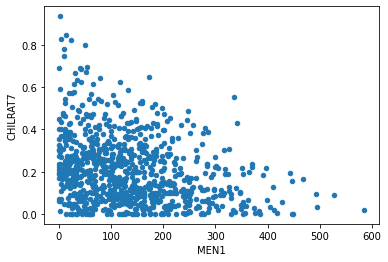

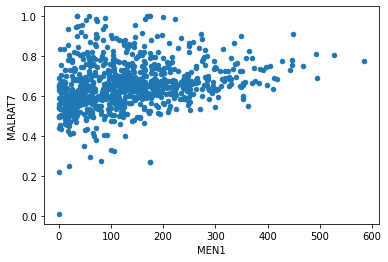

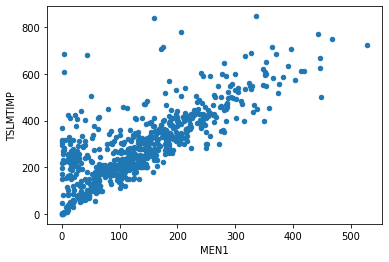

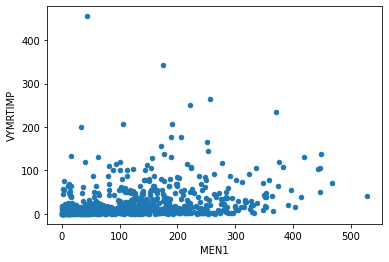

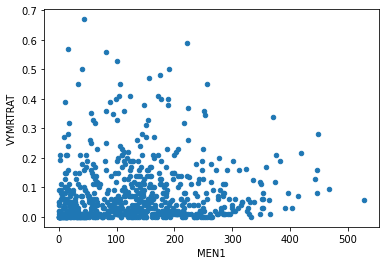

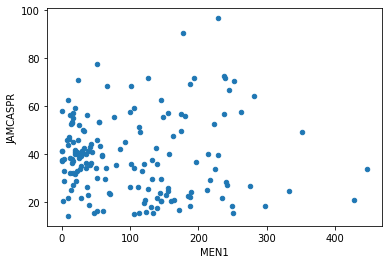

In [23]:
for s1 in slaves_charac:
    if s1 != "MEN1":
        df[["MEN1", s1 ]].plot.scatter(x="MEN1", y=s1)

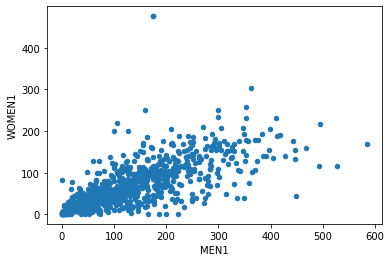

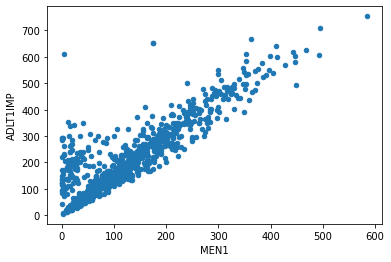

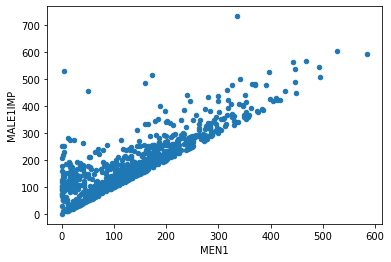

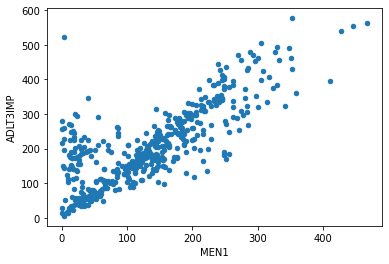

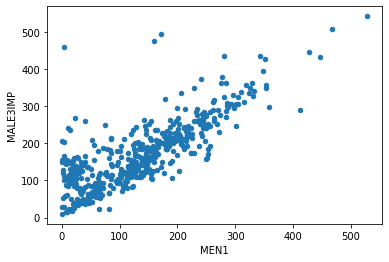

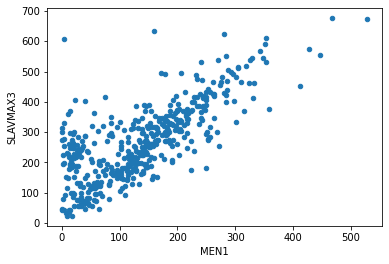

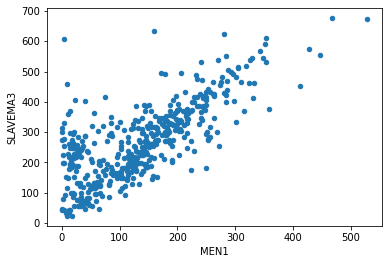

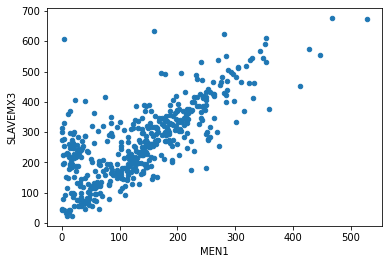

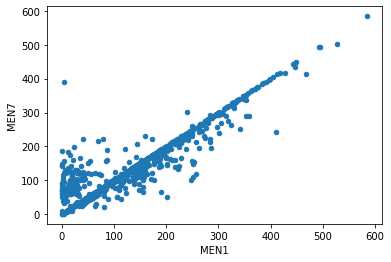

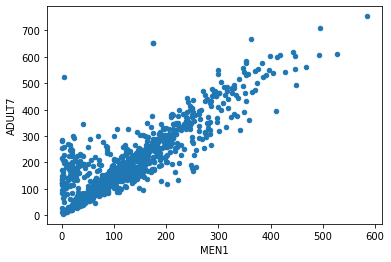

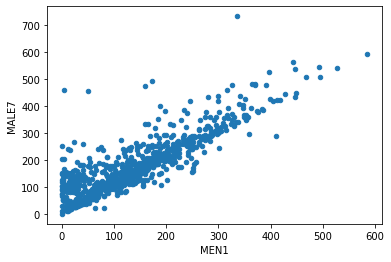

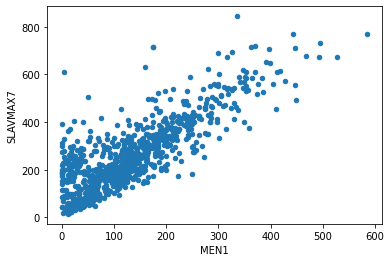

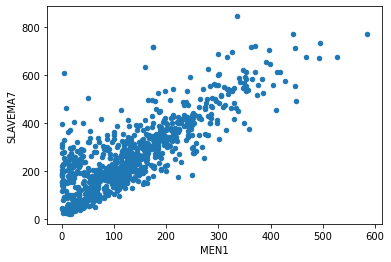

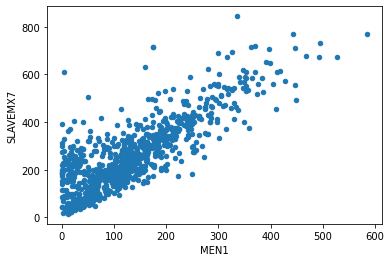

In [359]:
strange_corr_men1 = ["WOMEN1", "ADLT1IMP", "MALE1IMP", "ADLT3IMP", "MALE3IMP", "SLAVMAX3", "SLAVEMA3", "SLAVEMX3", 
"MEN7", "ADULT7", "MALE7", "SLAVMAX7", "SLAVEMA7", "SLAVEMX7"]

for category in strange_corr_men1:
    df[['MEN1', category]].plot.scatter(x='MEN1', y=category)

In [25]:
broad_regions = {"10000": "Europe",
"20000": "Mainland North America",
"30000": "Caribbean",
"40000": "Spanish American Mainland",
"50000": "Brazil",
"60000": "Africa",
"80000": "Other"
}

specific_regions = {"10100": "Spain",
"10200": "Portugal",
"10300": "Great Britain",
"10400": "England",
"10500": "Scotland",
"10600": "Ireland",
"10700": "France",
"10800": "Netherlands",
"10900": "Denmark",
"11000": "Northern Germany",
"11100": "Belgium",
"11200": "Norway",
"11300": "Sweden",
"11400": "Italy",
"11500": "Russia",
"11600": "Mediterranean",
"11700": "Latvia",
"20100": "Rhode Island",
"20200": "Maine",
"20300": "New Hampshire",
"20400": "Massachusetts",
"20500": "Connecticut",
"20600": "New York",
"20700": "Delaware",
"20800": "New Jersey",
"20900": "Pennsylvania",
"21000": "Maryland",
"21100": "Virginia",
"21200": "North Carolina",
"21300": "South Carolina",
"21400": "Georgia",
"21500": "Florida", 
"21600": "Gulf coast",
"21700": "Canada",
"21800": "Kentucky",
"21900": "Other North America",
"22000": "Tennessee",
"22100": "Texas",
"31100": "Hispaniola",
"31200": "Puerto Rico",
"31300": "Cuba",
"31400": "Other Spanish Caribbean",
"32100": "Dutch Caribbean",
"32200": "Dutch Guianas",
"32300": "Other Dutch Americas",
"33200": "Tortola",
"33300": "Anguilla",
"33400": "Antigua",
"33500": "St. Kitts",
"33600": "Nevis",
"33700": "Montserrat",
"33800": "Dominica",
"34100": "St. Lucia",
"34200": "Barbados",
"34300": "St. Vincent",
"34400": "Grenada",
"34500": "Trinidad",
"34600": "Tobago",
"35100": "Jamaica",
"35200": "Bahamas",
"35300": "British Guiana",
"35400": "British Honduras",
"35500": "Other British Caribbean",
"36100": "Martinique",
"36200": "Guadeloupe",
"36300": "French Guiana",
"36400": "Saint-Domingue",
"36500": "Other French Caribbean",
"37000": "Danish West Indies",
"38100": "St. Barth lemy (Sweden)",
"39000": "Other Caribbean",
"41200": "Spanish Circum-Caribbean",
"42000": "Rio de la Plata",
"43000": "Peru",
"44000": "Chile",
"45000": "Ecuador",
"50100": "Amazonia",
"50200": "Bahia",
"50300": "Pernambuco",
"50400": "Southeast Brazil",
"50500": "Other Brazil",
"60100": "Senegambia and off shore Atlantic",
"60200": "Sierra Leone",
"60300": "Windward Coast",
"60400": "Gold Coast",
"60500": "Bight of Benin",
"60600": "Bight of Biafra and Gulf of Guinea islands",
"60700": "West Central Africa and St. Helena",
"60800": "Southeast Africa and Indian Ocean islands",
"60900": "Other Africa",
"80100": "East Indies",
"80200": "Americas",
"80300": "Asia e Africa",
"80400": "Spanish Americas",
"80500": "British Americas",
"80600": "India",
"80700": "Non-geographical"
}

In [369]:
missing = {}
for v in df:
    missing[v] = df[v].isna().sum() / df.shape[0]

In [371]:
sorted_missing = dict(sorted(missing.items(), key=lambda item: item[1]))

for v in sorted_missing:
    print(v, sorted_missing[v])

VOYAGEID 0.0
EVGREEN 0.0
FATE 0.0
FATE2 0.0
FATE3 0.0
FATE4 0.0
YEAR5 0.0
YEAR10 0.0
YEAR25 0.0
YEAR100 0.0
YEARAF 0.0
YEARAM 0.0
YEARDEP 0.0
SOURCEA 0.000387725711753628
XMIMPFLAG 0.003295668549905838
filter_$ 0.00750526199180237
SLAXIMP 0.045170045419297665
SHIPNAME 0.045308518887781105
MAJBYIMP 0.04672094826631217
MAJBYIMP1 0.04672094826631217
MJBYPTIMP 0.04672094826631217
SLAMIMP 0.05333998005982054
NATINIMP 0.06059598980835272
CAPTAINA 0.11235737232746205
MJSELIMP1 0.11814556331006978
MJSLPTIMP 0.11814556331006978
MJSELIMP 0.11817325800376648
DEPTREGIMP 0.12390605959898084
DEPTREGIMP1 0.12393375429267753
PTDEPIMP 0.12393375429267753
PORTDEP 0.19247812119197963
NATIONAL 0.26415198847900745
DATEDEPC 0.266672205605406
SLA1PORT 0.2876370887337986
REGDIS1 0.2876647834274953
MAJSELPT 0.288135593220339
DATARR34 0.32519109338650715
DATEDEPB 0.33469037332447105
RIG 0.3438019275506813
SOURCEB 0.347374543037554
DATEDEPA 0.36626232413869503
DATEDEP 0.3667885233189321
REGEM1 0.3886396366456187

In [28]:
corr = dython_correlation(df, itinerary, None, 50)

In [29]:
corr

PORTDEP   EMBPORT  EMBPORT2    EMBREG   EMBREG2   ARRPORT  \
PORTDEP      1.000000  0.054922  0.091869  0.108499  0.417530  0.588704   
EMBPORT      0.054922  1.000000  0.162390  0.989880  0.824777  0.087350   
EMBPORT2     0.091869  0.162390  1.000000  0.146535  0.985871  0.052580   
EMBREG       0.108499  0.989880  0.146535  1.000000  0.771625  0.144171   
EMBREG2      0.417530  0.824777  0.985871  0.771625  1.000000  0.270143   
ARRPORT      0.588704  0.087350  0.052580  0.144171  0.270143  1.000000   
ARRPORT2     0.609050 -0.090604       NaN -0.038185       NaN  0.619309   
REGARR       0.635349  0.087738  0.054531  0.150754  0.274568  0.942439   
REGARR2      0.604409 -0.095296       NaN -0.038038       NaN  0.614160   
NPPRETRA    -0.174425  0.102541  0.054331  0.098139  0.041556 -0.124971   
PLAC1TRA     0.214274  0.211740  0.163630  0.252204  0.852344  0.098688   
PLAC2TRA     0.112343  0.230645  0.728307  0.252260  0.737403  0.405038   
PLAC3TRA     0.246364  0.553017       NaN  0.528779       NaN  0.504816   
REGEM1       0.232618  0.213048  0.169200  0.258820  0.866076  0.099501   
REGEM2       0.106492  0.229746  0.713962  0.252461  0.729199  0.392434   
REGEM3       0.256100  0.584907       NaN  0.560313       NaN  0.498758   
NPAFTTRA     0.024157  0.124011  0.811482  0.122399  0.842410  0.029437   
NPPRIOR     -0.018561  0.051466       NaN  0.068660       NaN  0.109921   
SLA1PORT     0.650892  0.018572  0.048941  0.063305  0.283037  0.699364   
ADPSALE1     0.239366  0.117422       NaN  0.138174       NaN  0.558361   
ADPSALE2     0.231560       NaN       NaN       NaN       NaN       NaN   
REGDIS1      0.649701  0.019012  0.048601  0.064069  0.282096  0.700646   
REGDIS2      0.239706  0.125872       NaN  0.146909       NaN  0.556394   
REGDIS3      0.231544       NaN       NaN       NaN       NaN       NaN   
PORTRET      0.398580  0.004110  0.052088  0.011940  0.049331 -0.030272   
RETRNREG     0.397335  0.010591  0.047463  0.021980  0.049151 -0.040000   
RETRNREG1    0.407611 -0.000402  0.018520  0.002975  0.016291 -0.020188   
DEPTREGIMP   0.999975  0.056640  0.091757  0.104651  0.416348  0.603706   
DEPTREGIMP1  0.998636  0.055447  0.091184  0.103721  0.415582  0.610838   
MAJBUYPT     0.225305  0.212755  0.163115  0.252411  0.825961  0.301257   
MAJSELPT     0.642759  0.017702  0.048960  0.061859  0.280527  0.699287   

             ARRPORT2    REGARR   REGARR2  NPPRETRA  PLAC1TRA  PLAC2TRA  \
PORTDEP      0.609050  0.635349  0.604409 -0.174425  0.214274  0.112343   
EMBPORT     -0.090604  0.087738 -0.095296  0.102541  0.211740  0.230645   
EMBPORT2          NaN  0.054531       NaN  0.054331  0.163630  0.728307   
EMBREG      -0.038185  0.150754 -0.038038  0.098139  0.252204  0.252260   
EMBREG2           NaN  0.274568       NaN  0.041556  0.852344  0.737403   
ARRPORT      0.619309  0.942439  0.614160 -0.124971  0.098688  0.405038   
ARRPORT2     1.000000  0.617399  0.999989       NaN -0.120896       NaN   
REGARR       0.617399  1.000000  0.612223 -0.133250  0.105199  0.434514   
REGARR2      0.999989  0.612223  1.000000       NaN -0.114286       NaN   
NPPRETRA          NaN -0.133250       NaN  1.000000  0.190621  0.239006   
PLAC1TRA    -0.120896  0.105199 -0.114286  0.190621  1.000000  0.087779   
PLAC2TRA          NaN  0.434514       NaN  0.239006  0.087779  1.000000   
PLAC3TRA          NaN  0.508388       NaN  0.150469  0.579456  0.200023   
REGEM1      -0.132138  0.105827 -0.125814  0.190639  0.996224  0.086793   
REGEM2            NaN  0.422914       NaN  0.238043  0.089051  0.997865   
REGEM3            NaN  0.501391       NaN  0.172449  0.591882  0.211304   
NPAFTTRA          NaN  0.028878       NaN  0.240616  0.436607  0.411043   
NPPRIOR           NaN  0.109796       NaN  0.031481 -0.013506 -0.075942   
SLA1PORT     0.401460  0.720418  0.398568 -0.078057  0.114376  0.069715   
ADPSALE1          NaN  0.562255       NaN  0.077520  0.137027  0.155271   
ADPSALE2          NaN       NaN       

In [30]:
missing = df[list(itinerary.keys())].isnull()

corr = dython_correlation(missing, itinerary, None, 0)

In [31]:
corr

PORTDEP   EMBPORT  EMBPORT2    EMBREG   EMBREG2   ARRPORT  \
PORTDEP      1.000000  0.280099  0.074582  0.280894  0.074444  0.053920   
EMBPORT      0.280099  1.000000  0.180476  0.996287  0.180162  0.291531   
EMBPORT2     0.074582  0.180476  1.000000  0.180470  0.998424  0.119014   
EMBREG       0.280894  0.996287  0.180470  1.000000  0.180498  0.291969   
EMBREG2      0.074444  0.180162  0.998424  0.180498  1.000000  0.118763   
ARRPORT      0.053920  0.291531  0.119014  0.291969  0.118763  1.000000   
ARRPORT2     0.008237  0.048814  0.030941  0.048214  0.031020  0.100089   
REGARR       0.054410  0.291050  0.119073  0.292593  0.119199  0.997434   
REGARR2      0.007873  0.049022  0.028652  0.049277  0.028728  0.100342   
NPPRETRA     0.138034  0.109768  0.043881  0.110607  0.044113  0.039017   
PLAC1TRA     0.029136 -0.098941  0.026441 -0.096682  0.026422  0.020904   
PLAC2TRA     0.085505 -0.068978  0.016192 -0.069022  0.015725 -0.020502   
PLAC3TRA     0.047090 -0.056149 -0.004123 -0.055730 -0.004065 -0.015938   
REGEM1       0.028960 -0.098688  0.026404 -0.096542  0.026386  0.021012   
REGEM2       0.085585 -0.068997  0.016931 -0.069043  0.016464 -0.020648   
REGEM3       0.047227 -0.055536 -0.002803 -0.055116 -0.002744 -0.015201   
NPAFTTRA     0.065916  0.019263  0.021358  0.020063  0.021503  0.033255   
NPPRIOR      0.113666 -0.050546 -0.034082 -0.049874 -0.033976 -0.062885   
SLA1PORT    -0.048896 -0.259144 -0.027651 -0.256971 -0.027641 -0.172247   
ADPSALE1     0.025178 -0.033694 -0.011103 -0.033599 -0.011923  0.000120   
ADPSALE2     0.006800 -0.005559  0.005708 -0.006525  0.002259  0.002425   
REGDIS1     -0.048769 -0.259206 -0.027640 -0.256910 -0.027630 -0.171528   
REGDIS2      0.025425 -0.033756 -0.011062 -0.033663 -0.011883 -0.000665   
REGDIS3      0.006800 -0.005559  0.005708 -0.006525  0.002259  0.002425   
PORTRET      0.277211 -0.089452 -0.052773 -0.088265 -0.052892 -0.140105   
RETRNREG     0.273732 -0.088977 -0.052659 -0.086842 -0.052408 -0.140641   
RETRNREG1    0.276127 -0.090496 -0.053154 -0.088338 -0.052901 -0.139849   
DEPTREGIMP   0.769869  0.213942  0.057606  0.215073  0.057499  0.076385   
DEPTREGIMP1  0.769754  0.213995  0.057614  0.215126  0.057507  0.076431   
MAJBUYPT     0.032152 -0.098204  0.025377 -0.095970  0.025354  0.022070   
MAJSELPT    -0.048167 -0.258784 -0.028206 -0.256616 -0.028197 -0.172268   

             ARRPORT2    REGARR   REGARR2  NPPRETRA  PLAC1TRA  PLAC2TRA  \
PORTDEP      0.008237  0.054410  0.007873  0.138034  0.029136  0.085505   
EMBPORT      0.048814  0.291050  0.049022  0.109768 -0.098941 -0.068978   
EMBPORT2     0.030941  0.119073  0.028652  0.043881  0.026441  0.016192   
EMBREG       0.048214  0.292593  0.049277  0.110607 -0.096682 -0.069022   
EMBREG2      0.031020  0.119199  0.028728  0.044113  0.026422  0.015725   
ARRPORT      0.100089  0.997434  0.100342  0.039017  0.020904 -0.020502   
ARRPORT2     1.000000  0.095612  0.980330  0.016134 -0.000987  0.016076   
REGARR       0.095612  1.000000  0.095834  0.039692  0.020868 -0.020871   
REGARR2      0.980330  0.095834  1.000000  0.016518 -0.001676  0.016429   
NPPRETRA     0.016134  0.039692  0.016518  1.000000  0.070677  0.078008   
PLAC1TRA    -0.000987  0.020868 -0.001676  0.070677  1.000000  0.223966   
PLAC2TRA     0.016076 -0.020871  0.016429  0.078008  0.223966  1.000000   
PLAC3TRA     0.012628 -0.016208  0.012817  0.045880  0.098903  0.428886   
REGEM1      -0.001002  0.020976 -0.001691  0.070606  0.999767  0.223912   
REGEM2       0.016123 -0.021018  0.016476  0.078241  0.223311  0.998251   
REGEM3       0.012576 -0.015469  0.012765  0.045652  0.098162  0.427149   
NPAFTTRA     0.009733  0.033718  0.009985  0.182438  0.150666  0.107308   
NPPRIOR      0.001201 -0.063217 -0.000057  0.033281  0.130043  0.084338   
SLA1PORT    -0.002539 -0.172433 -0.003099  0.004291  0.419886  0.112391   
ADPSALE1     0.086111 -0.001115  0.084578  0.012054  0.068410  0.042010   
ADPSALE2     0.083466  0.001275  0.084

In [32]:
ctb = pd.crosstab(df['PORTDEP'].astype('Int64'), df['ARRPORT'].astype('Int64'))
print(itinerary['PORTDEP'], "vs", itinerary['ARRPORT'])

Port of departure vs First intended port of disembarkation


In [33]:
ctb

ARRPORT  10104  10199  10203  10299  20103  20199  20301  20404  20699  20902  \
PORTDEP                                                                         
10102        0      0      0      0      0      0      0      0      0      0   
10103        0      0      0      0      0      0      0      0      0      0   
10104        0      0      0      0      0      0      0      0      0      0   
10107        0      0      0      0      0      0      0      0      0      0   
10110        0      0      0      0      0      0      0      0      0      0   
10111        0      0      0      0      0      0      0      0      0      0   
10112        0      1      0      0      0      0      0      0      0      0   
10113        0      0      0      0      0      0      0      0      0      0   
10199        0      0      0      0      0      0      0      0      0      0   
10203        0      0      5      0      0      0      0      0      0      0   
10204        0      0      0      0      0      0      0      0      0      0   
10205        0      0      0      0      0      0      0      0      0      0   
10299        0      0      0      0      0      0      0      0      0      0   
10399        0      0      0      0      0      0      0      0      0      0   
10404        0      0      0      0      0      0      0      0      0      0   
10412        0      0      0      0      0      0      0      0      0      0   
10420        0      0      0      0      0      0      0      0      0      0   
10422        0      0      0      0      0      0      0      0      0      0   
10430        0      0      0      0      0      0      0      0      0      0   
10432        0      0      1      1      0      0      0      0      0      0   
10433        1      0      4      1      0      0      0      0      2      0   
10434        0      0      1      0      0      0      0      0      0      0   
10439        0      0      0      0      0      0      0      0      0      0   
10447        0      0      0      0      0      0      0      0      0      0   
10448        0      0      0      0      0      0      0      0      0      0   
10450        0      0      0      0      0      0      0      0      0      0   
10474        0      0      0      0      0      0      0      0      0      0   
10504        0      0      0      0      0      0      0      0      0      0   
10505        0      0      0      0      0      0      0      0      0      0   
10506        0      0      0      0      0      0      0      0      0      0   
10508        0      0      0      0      0      0      0      0      0      0   
10702        0      0      0      0      0      0      0      0      0      0   
10703        0      0      0      0      0      0      0      0      0      0   
10704        0      0      0      0      0      0      0      0      0      0   
10709        0      0      0      0      0      0      0      0      0      0   
10710        0      0      0      0      0      0      0      0      0      0   
10712        0      0      0      0      0      0      0      0      0      0   
10713        0      0      0      0      0      0      0      0      0      0   
10714        0      0      0      0      0      0      0      0      0      0   
10715        0      0      0      0      0      0      0      0      0      0   
10716        0      0      0      0      0      0      0      0      0      0   
10717        0      0      0      0      0      0      0      0      0      0   
10720        0      0      0      0      0      0      0      0      0      0   
10722        0      0      0      0      0      0      0      0      0      0   
10724        0      0      0      0      0      0      0      0      0      0   
10726        0      0      0      0      0      0      0      0      0      0   
10799        0      0      0      0      0      0      0      0      0      0   
10810        0      0      0   

In [34]:
max_cols = ctb.max()
idx_rows = ctb.index.to_numpy()
idx_columns = ctb.columns.to_numpy()
values = {}

for i in range(idx_rows.shape[0]):
    values[(idx_columns[i]),idx_rows[i]] = max_cols.iloc[i]

In [35]:
#Very sparse, mostly Brazil-Brazil
sorted_values = dict(sorted(values.items(), key=lambda item: item[1], reverse=True))

for v in sorted_values:
    print(v, sorted_values[v])

(50299, 50428) 1921
(50422, 60142) 869
(50399, 50599) 504
(31312, 10716) 269
(35199, 20699) 257
(39002, 35114) 190
(32110, 10830) 175
(50102, 50416) 153
(34299, 20105) 132
(41201, 35508) 123
(32240, 10899) 88
(50103, 50419) 78
(31399, 10821) 68
(41207, 37020) 65
(42001, 50102) 49
(21199, 10420) 40
(21999, 10504) 40
(36403, 31323) 39
(80200, 80602) 39
(21399, 10432) 37
(33499, 11004) 34
(80299, 80604) 31
(33699, 11301) 28
(31323, 10799) 26
(33599, 11101) 25
(33899, 20101) 23
(34499, 20199) 23
(32230, 10851) 22
(36199, 31303) 19
(41299, 42002) 19
(21099, 10204) 18
(21302, 10430) 18
(20199, 10111) 16
(35599, 31299) 14
(37020, 34299) 13
(34399, 20107) 12
(31299, 10703) 11
(32150, 10840) 11
(41203, 36199) 11
(36499, 33599) 10
(20699, 10199) 9
(31499, 10829) 9
(50424, 60299) 9
(31316, 10722) 8
(36409, 31399) 8
(50428, 60499) 8
(32250, 10999) 7
(35110, 20416) 7
(41206, 36299) 7
(32399, 11002) 6
(34699, 20302) 6
(36301, 31316) 6
(36599, 33699) 6
(41212, 38101) 6
(10203, 10104) 5
(21109, 10399)

In [36]:
ctb = pd.crosstab(df['PORTDEP'].astype('Int64'), df['REGARR'].astype('Int64'))
print(itinerary['PORTDEP'], "vs", itinerary['REGARR'])

Port of departure vs First intended region of slave landing


In [37]:
ctb

REGARR   10100  10200  20100  20300  20400  20600  20900  21000  21100  21200  \
PORTDEP                                                                         
10102        0      0      0      0      0      0      0      0      0      0   
10103        0      0      0      0      0      0      0      0      0      0   
10104        0      0      0      0      0      0      0      0      0      0   
10107        0      0      0      0      0      0      0      0      0      0   
10110        0      0      0      0      0      0      0      0      0      0   
10111        0      0      0      0      0      0      0      0      0      0   
10112        1      0      0      0      0      0      0      0      0      0   
10113        0      0      0      0      0      0      0      0      0      0   
10199        0      0      0      0      0      0      0      0      0      0   
10203        0      5      0      0      0      0      0      0      0      0   
10204        0      0      0      0      0      0      0      0      0      0   
10205        0      0      0      0      0      0      0      0      0      0   
10299        0      0      0      0      0      0      0      0      0      0   
10399        0      0      0      0      0      0      0      0      0      0   
10404        0      0      0      0      0      0      0      0     10      0   
10412        0      0      0      0      0      0      0      0      0      0   
10420        0      0      0      0      0      0      0      0      0      0   
10422        0      0      0      0      0      0      0      0      0      0   
10430        0      0      0      0      0      0      0      0      0      0   
10432        0      2      0      0      0      0      0      4     35      1   
10433        1      5      0      0      0      1      0     18     41      2   
10434        0      1      0      0      0      0      0      0      0      0   
10439        0      0      0      0      0      0      0      0      0      0   
10447        0      0      0      0      0      0      0      0      0      0   
10448        0      0      0      0      0      0      0      0      0      0   
10450        0      0      0      0      0      0      0      0      0      0   
10474        0      0      0      0      0      0      0      0      3      0   
10504        0      0      0      0      0      0      0      0      1      0   
10505        0      0      0      0      0      0      0      0      1      0   
10506        0      0      0      0      0      0      0      0      0      0   
10508        0      0      0      0      0      0      0      0      0      0   
10702        0      0      0      0      0      0      0      0      0      0   
10703        0      0      0      0      0      0      0      0      0      0   
10704        0      0      0      0      0      0      0      0      0      0   
10709        0      0      0      0      0      0      0      0      0      0   
10710        0      0      0      0      0      0      0      0      0      0   
10712        0      0      0      0      0      0      0      0      0      0   
10713        0      0      0      0      0      0      0      0      0      0   
10714        0      0      0      0      0      0      0      0      0      0   
10715        0      0      0      0      0      0      0      0      0      0   
10716        0      0      0      0      0      0      0      0      0      0   
10717        0      0      0      0      0      0      0      0      0      0   
10720        0      0      0      0      0      0      0      0      0      0   
10722        0      0      0      0      0      0      0      0      0      0   
10724        0      0      0      0      0      0      0      0      0      0   
10726        0      0      0      0      0      0      0      0      0      0   
10799        0      0      0      0      0      0      0      0      0      0   
10810        0      0      0   

In [38]:
idx_rows = ctb.index.to_numpy()
idx_cols = ctb.columns.to_numpy()
values = {}

for i in range(ctb.shape[0]):
    idx_max = ctb.iloc[i].idxmax()
    values[(idx_rows[i], idx_max)] = ctb.iloc[i][idx_max]

In [39]:
sorted_values = dict(sorted(values.items(), key=lambda item: item[1], reverse=True))

for v in sorted_values:
    print(v, sorted_values[v])

(50299, 50200) 1922
(50422, 50400) 900
(50399, 50300) 504
(31312, 31300) 354
(10404, 35100) 257
(10433, 35100) 236
(10203, 50100) 231
(10112, 41200) 216
(10432, 39000) 190
(10829, 32100) 186
(10851, 32200) 105
(10104, 41200) 90
(10111, 41200) 72
(10713, 36400) 58
(10840, 32200) 49
(31323, 31300) 39
(10720, 31300) 35
(34299, 34200) 35
(60142, 41200) 25
(20199, 34200) 23
(20699, 31300) 20
(21302, 21300) 20
(60141, 41200) 20
(31316, 31300) 19
(10474, 35100) 18
(10830, 32200) 18
(10834, 32200) 18
(31399, 31300) 18
(33499, 33400) 18
(10110, 31300) 16
(20101, 21300) 16
(20103, 21300) 13
(31299, 31200) 11
(10447, 39000) 9
(10703, 36400) 9
(20404, 34200) 9
(50428, 50400) 8
(50599, 50500) 8
(10199, 41200) 7
(10716, 36400) 7
(21601, 31300) 7
(35199, 35100) 7
(10102, 31300) 6
(10712, 36400) 6
(10810, 32200) 6
(50102, 50100) 6
(50306, 50300) 6
(10399, 35500) 5
(31306, 31300) 5
(50416, 50400) 5
(50419, 50500) 5
(10899, 32100) 4
(20107, 21300) 4
(33599, 33500) 4
(34499, 34400) 4
(36199, 36100) 4
(36

In [40]:
ctb = pd.crosstab(df['EMBPORT'].astype('Int64'), df['EMBREG'].astype('Int64'))
print(itinerary['EMBPORT'], "vs", itinerary['EMBREG'])

First intended port of embarkation vs First intended region of purchase of slaves


In [41]:
ctb

EMBREG   31200  35100  36100  41200  50400  60100  60200  60300  60400  60500  \
EMBPORT                                                                         
31299        1      0      0      0      0      0      0      0      0      0   
35199        0      1      0      0      0      0      0      0      0      0   
36199        0      0      1      0      0      0      0      0      0      0   
41201        0      0      0      1      0      0      0      0      0      0   
41207        0      0      0      2      0      0      0      0      0      0   
50422        0      0      0      0      1      0      0      0      0      0   
60101        0      0      0      0      0      6      0      0      0      0   
60103        0      0      0      0      0      1      0      0      0      0   
60104        0      0      0      0      0    125      0      0      0      0   
60105        0      0      0      0      0    106      0      0      0      0   
60106        0      0      0      0      0      2      0      0      0      0   
60107        0      0      0      0      0      4      0      0      0      0   
60108        0      0      0      0      0    280      0      0      0      0   
60109        0      0      0      0      0     61      0      0      0      0   
60113        0      0      0      0      0      1      0      0      0      0   
60114        0      0      0      0      0     52      0      0      0      0   
60115        0      0      0      0      0      1      0      0      0      0   
60116        0      0      0      0      0      1      0      0      0      0   
60117        0      0      0      0      0      2      0      0      0      0   
60118        0      0      0      0      0    249      0      0      0      0   
60126        0      0      0      0      0    375      0      0      0      0   
60127        0      0      0      0      0      2      0      0      0      0   
60128        0      0      0      0      0      5      0      0      0      0   
60141        0      0      0      0      0      2      0      0      0      0   
60142        0      0      0      0      0      1      0      0      0      0   
60199        0      0      0      0      0    130      0      0      0      0   
60201        0      0      0      0      0      5      0      0      0      0   
60202        0      0      0      0      0      7      0      0      0      0   
60205        0      0      0      0      0      1      0      0      0      0   
60208        0      0      0      0      0     71      0      0      0      0   
60210        0      0      0      0      0     75      2      0      0      0   
60212        0      0      0      0      0      7      0      0      0      0   
60213        0      0      0      0      0     30      0      0      0      0   
60214        0      0      0      0      0      2      0      0      0      0   
60217        0      0      0      0      0     33      0      0      0      0   
60220        0      0      0      0      0      1      0      0      0      0   
60299        0      0      0      0      0    127      3      0      0      0   
60302        0      0      0      0      0      5      0      0      0      0   
60305        0      0      0      0      0      1      0      0      0      0   
60306        0      0      0      0      0     21      0      0      0      0   
60307        0      0      0      0      0      1      0      0      0      0   
60309        0      0      0      0      0     16      0      0      0      0   
60311        0      0      0      0      0      1      0      0      0      0   
60312        0      0      0      0      0      1      0      0      0      0   
60315        0      0      0      0      0      4      0      0      0      0   
60316        0      0      0      0      0      1      0      0      0      0   
60321        0      0      0      0      0      3      0      0      0      0   
60326        0      0      0   

In [42]:
idx_rows = ctb.index.to_numpy()
idx_cols = ctb.columns.to_numpy()
values = {}

for i in range(ctb.shape[0]):
    idx_max = ctb.iloc[i].idxmax()
    values[(idx_rows[i], idx_max)] = ctb.iloc[i][idx_max]

In [43]:
sorted_values = dict(sorted(values.items(), key=lambda item: item[1], reverse=True))

for v in sorted_values:
    print(v, sorted_values[v])

(60502, 60500) 2288
(60799, 60700) 1747
(60734, 60700) 1502
(60999, 60900) 1223
(60707, 60700) 710
(60605, 60600) 548
(60711, 60700) 529
(60399, 60100) 499
(60608, 60600) 495
(60673, 60600) 459
(60499, 60400) 394
(60126, 60100) 375
(60515, 60500) 354
(60820, 60800) 294
(60108, 60100) 280
(60118, 60100) 249
(60725, 60700) 207
(60506, 60500) 205
(60716, 60700) 203
(60917, 60900) 187
(60916, 60900) 160
(60408, 60100) 150
(60703, 60700) 146
(60199, 60100) 130
(60299, 60100) 127
(60104, 60100) 125
(60105, 60100) 106
(60822, 60800) 105
(60609, 60600) 104
(60501, 60500) 101
(60717, 60700) 101
(60599, 60500) 99
(60517, 60500) 92
(60415, 60100) 85
(60724, 60700) 78
(60620, 60600) 76
(60210, 60100) 75
(60208, 60100) 71
(60412, 60100) 67
(60668, 60600) 66
(60109, 60100) 61
(60114, 60100) 52
(60510, 60500) 40
(60699, 60600) 39
(60912, 60900) 38
(60217, 60100) 33
(60213, 60100) 30
(60671, 60600) 27
(60811, 60800) 26
(60404, 60100) 25
(60417, 60100) 22
(60306, 60100) 21
(60507, 60500) 21
(60309, 601

In [152]:
df

VOYAGEID  ADLT1IMP  ADLT2IMP  ADLT3IMP  ADPSALE1  ADPSALE2  ADULT1  \
0             1       NaN       1.0       NaN       NaN       NaN     NaN   
1             2       NaN       NaN       NaN       NaN       NaN     NaN   
2             3       NaN       NaN       NaN       NaN       NaN     NaN   
3             4       NaN       NaN       NaN       NaN       NaN     NaN   
4             5       NaN       NaN       NaN       NaN       NaN     NaN   
...         ...       ...       ...       ...       ...       ...     ...   
36103    900233       NaN       NaN       NaN       NaN       NaN     NaN   
36104    900234       NaN       NaN       NaN       NaN       NaN     NaN   
36105    900235       NaN       NaN       NaN       NaN       NaN     NaN   
36106    900236       NaN       NaN       NaN       NaN       NaN     NaN   
36107    900237       NaN       NaN       NaN       NaN       NaN     NaN   

       ADULT2  ADULT3  ADULT4  ...  YEAR5  YEAR10  YEAR25  YEAR100  YEARAF  \
0         NaN     NaN     NaN  ...     64      32      13     1800    1816   
1         NaN     NaN     NaN  ...     64      32      13     1800    1817   
2         NaN     NaN     NaN  ...     64      32      13     1800    1817   
3         NaN     NaN     NaN  ...     64      32      13     1800    1817   
4         NaN     NaN     NaN  ...     64      32      13     1800    1817   
...       ...     ...     ...  ...    ...     ...     ...      ...     ...   
36103     NaN     NaN     NaN  ...     70      35      14     1800    1849   
36104     NaN     NaN     NaN  ...     70      35      14     1800    1850   
36105     NaN     NaN     NaN  ...     71      36      15     1800    1851   
36106     NaN     NaN     NaN  ...     71      36      15     1800    1851   
36107     NaN     NaN     NaN  ...     71      36      15     1800    1851   

       YEARAM  YEARDEP  YRCONS  YRREG  filter_$  
0        1817     1816     NaN    NaN       0.0  
1        1817     1816     NaN    NaN       0.0  
2        1817     1816     NaN    NaN       0.0  
3        1817     1816     NaN    NaN       0.0  
4        1817     1817     NaN    NaN       0.0  
...       ...      ...     ...    ...       ...  
36103    1849     1849     NaN    NaN       0.0  
36104    1850     1850     NaN    NaN       0.0  
36105    1851     1851     NaN    NaN       0.0  
36106    1851     1851     NaN    NaN       0.0  
36107    1851     1851     NaN    NaN       0.0  

[36108 rows x 274 columns]

In [151]:
missing = df.isna().astype(bool)
missing

VOYAGEID  ADLT1IMP  ADLT2IMP  ADLT3IMP  ADPSALE1  ADPSALE2  ADULT1  \
0         False      True     False      True      True      True    True   
1         False      True      True      True      True      True    True   
2         False      True      True      True      True      True    True   
3         False      True      True      True      True      True    True   
4         False      True      True      True      True      True    True   
...         ...       ...       ...       ...       ...       ...     ...   
36103     False      True      True      True      True      True    True   
36104     False      True      True      True      True      True    True   
36105     False      True      True      True      True      True    True   
36106     False      True      True      True      True      True    True   
36107     False      True      True      True      True      True    True   

       ADULT2  ADULT3  ADULT4  ...  YEAR5  YEAR10  YEAR25  YEAR100  YEARAF  \
0        True    True    True  ...  False   False   False    False   False   
1        True    True    True  ...  False   False   False    False   False   
2        True    True    True  ...  False   False   False    False   False   
3        True    True    True  ...  False   False   False    False   False   
4        True    True    True  ...  False   False   False    False   False   
...       ...     ...     ...  ...    ...     ...     ...      ...     ...   
36103    True    True    True  ...  False   False   False    False   False   
36104    True    True    True  ...  False   False   False    False   False   
36105    True    True    True  ...  False   False   False    False   False   
36106    True    True    True  ...  False   False   False    False   False   
36107    True    True    True  ...  False   False   False    False   False   

       YEARAM  YEARDEP  YRCONS  YRREG  filter_$  
0       False    False    True   True     False  
1       False    False    True   True     False  
2       False    False    True   True     False  
3       False    False    True   True     False  
4       False    False    True   True     False  
...       ...      ...     ...    ...       ...  
36103   False    False    True   True     False  
36104   False    False    True   True     False  
36105   False    False    True   True     False  
36106   False    False    True   True     False  
36107   False    False    True   True     False  

[36108 rows x 274 columns]

In [165]:
for i in range(len(df)):
    print(i, missing.loc[i, "YEARDEP"])

0 False
1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 False
12 False
13 False
14 False
15 False
16 False
17 False
18 False
19 False
20 False
21 False
22 False
23 False
24 False
25 False
26 False
27 False
28 False
29 False
30 False
31 False
32 False
33 False
34 False
35 False
36 False
37 False
38 False
39 False
40 False
41 False
42 False
43 False
44 False
45 False
46 False
47 False
48 False
49 False
50 False
51 False
52 False
53 False
54 False
55 False
56 False
57 False
58 False
59 False
60 False
61 False
62 False
63 False
64 False
65 False
66 False
67 False
68 False
69 False
70 False
71 False
72 False
73 False
74 False
75 False
76 False
77 False
78 False
79 False
80 False
81 False
82 False
83 False
84 False
85 False
86 False
87 False
88 False
89 False
90 False
91 False
92 False
93 False
94 False
95 False
96 False
97 False
98 False
99 False
100 False
101 False
102 False
103 False
104 False
105 False
106 False
107 False
108 False
109 False
110 False


In [99]:
df.shape

(36108, 274)

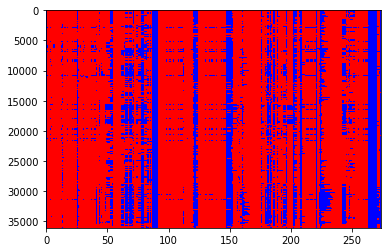

In [129]:
plt.imshow(missing, cmap='bwr', aspect='auto', interpolation='none')

/Users/jessickmon/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


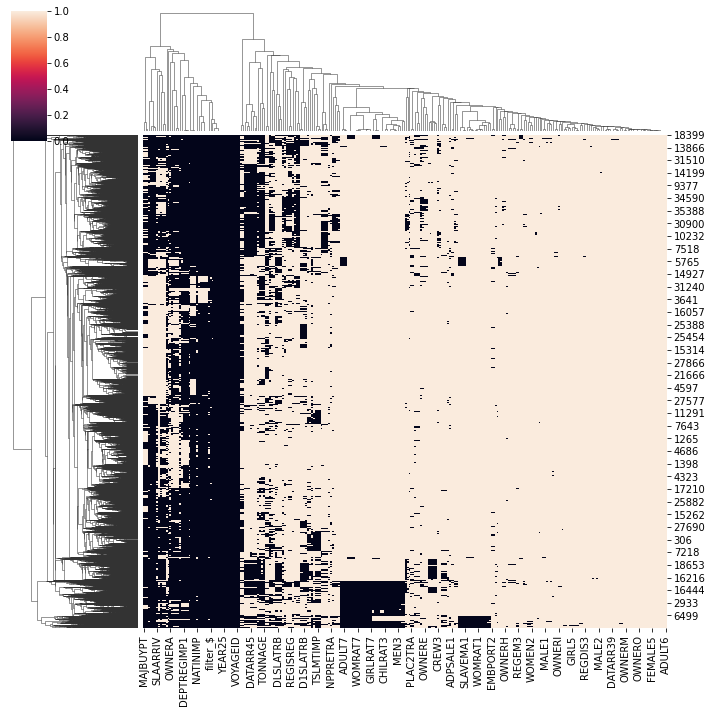

In [7]:
sns.clustermap(missing)

<font size="6">Functions for correlation and Jaccard similarity analysis and preparing plots</font>

In [8]:
def dython_nom_to_nom_correlation(nominal_1, nominal_2, desired_corr):
    """
    Finds the Cramer's V for categorical-categorical cases

    Input: nominal_1 - the first nominal category/column
           nominal_2 - the second nominal category/column
           desired_corr - the desired correlation value 

    Output: a list of tuples where the tuples represent two categories when their correlation value is greater than or equal to
    desired correlation input 
    """

    corr = []
    visited = []

    for idx1 in nominal_1:
        for idx2 in nominal_2:        
            if idx1 == idx2:
                continue

            else:
                val = cramers_v(df[idx1], df[idx2])
                if val >= desired_corr and (idx1, idx2) not in visited:
                    corr.append((idx1, idx2, val))
                    visited.append((idx1,idx2))
                    visited.append((idx2,idx1))
    
    return corr  

In [9]:
def dython_nom_to_num_correlation(nominal, numerical, desired_corr):
    """
    Finds the Correlation Ratio for categorical-continuous cases

    Input: nominal - the nominal category/column
           numerical - the numerical category/column
           desired_corr - the desired correlation value 

    Output: a list of tuples where the tuples represent two categories when their correlation value is greater than or equal to
    desired correlation input 
    """

    corr = [] 
    visited = []

    for idx1 in nominal:
        for idx2 in numerical:            
            val = correlation_ratio(df[idx1], df[idx2])
            if val >= desired_corr and (idx1, idx2) not in visited:
                corr.append((idx1, idx2, val))
                visited.append((idx1,idx2))
                visited.append((idx2,idx1))
    
    return corr  

In [10]:
def dython_num_to_num_correlation(numerical_1, numerical_2, desired_corr):
    """
    Finds the Pearson's R for continuous-continuous cases (from pandas.corr())

    Input: numerical_1 - the first nominal category/column
           numerical_2 - the second nominal category/column
           desired_corr - the desired correlation value 

    Output: a list of tuples where the tuples represent two categories when their correlation value is greater than or equal to
    desired correlation input 
    """

    corr = [] 
    visited = []

    for idx1 in numerical_1:
        for idx2 in numerical_2:  
            if idx1 == idx2:
                continue    
            else:       
                val = df[idx1].corr(df[idx2])
                if val >= desired_corr and (idx1, idx2) not in visited:
                    corr.append((idx1, idx2, val))
                    visited.append((idx1,idx2))
                    visited.append((idx2,idx1))
    
    return corr  

In [21]:
def calc_jaccard_sim(col_1, col_2):
    """
    Calculates the one minus the jaccard similiarity by taking columns and observing if certain rows are missing for the two input columns 

    Input: col_1 - a column from a dataframe 
           col_2 - another column from a dataframe 

    Output: a tuple with (col_1, col_2, jac_sim) where jac_sim is the jaccard similiarity of the two columns with respect to what rows are missing 
    """

    if col_1 == col_2:
       return 1

    missing_df = df.isna().astype(bool)
    missing_col_1 = set()
    missing_col_2 = set()
    
    for i in range(len(missing_df)):
       if missing_df.loc[i, col_1]:
          missing_col_1.add(i)

       if missing_df.loc[i, col_2]:
          missing_col_2.add(i)

    jac_sim_num = len(missing_col_1.intersection(missing_col_2))
    jac_sim_denom = len(missing_col_1.union(missing_col_2))
    
    if jac_sim_denom == 0:
       return 0
       
    return 1 - (jac_sim_num / jac_sim_denom)

# take a column; take the rows that are missing for two columns and then just compute jaccard similarity for those two sets. union 
# is just the number of True and the interseciton is the AND

In [22]:
def prep_jac_to_corr_plot(corr_lst):
    """
    Prepares a the correlation list and jaccard simliarity list to be plotted into a scatter plot where the x-axis is the jaccard similiariy and the y-axis is the correlation value 

    Input: corr_lst - a list of tuples where the first two elements in the tuple are the categories and the third element is the correlation value 

    Output: a pair of lists where the first represents the list of correlation values picked out of the corr_list and the second represents the jaccard similiarity value of the two categories as 
    determined by the calc_jaccard_sim function 
    """

    corr_val = [item[2] for item in corr_lst] 

    jac_sim = [calc_jaccard_sim(item2[0], item2[1]) for item2 in corr_lst] 
    
    return (corr_val, jac_sim)



In [390]:
def find_preferred_jac_corr(pref_jac_score, corr_lst):
    """
    Finds the columns that correspond to the preffered correlation and jaccard similiarity value that we input 

    Input: pref_jac_score - the preffered jaccard similiarity score 
           corr_lst - the correlation list that contains tuples with three elements where the first two are the columns and the third element is the correlation value 

    Output: a list of tuples where the first two elements are the columns, the third element is the correlation value, and the fourth/last value is the jaccard similiarity if it is greater than or 
    equal to our preffered jaccard similiarity score 
    """
    lst = []

    for item in corr_lst: 
        jac_sim = calc_jaccard_sim(item[0], item[1])
        if jac_sim >= pref_jac_score:
            # (column1, column2, corr_val, jaccard_sim)
            lst.append((item[0], item[1], item[2], jac_sim))

    return lst 

<font size="6">1) Correlation with ship_nation_owners_nom</font>

In [24]:
corr_nom_1 = dython_nom_to_nom_correlation(ship_nation_owners_nom, all_nominal, 0)
corr_nom_1

[('NATIONAL', 'XMIMPFLAG', 0.43470275712139594),
 ('NATIONAL', 'TONTYPE', 0.5421051565358548),
 ('NATIONAL', 'RIG', 0.2573709688981979),
 ('NATIONAL', 'YRCONS', 0.15186843964187566),
 ('NATIONAL', 'PLACCONS', 0.1943027777435303),
 ('NATIONAL', 'CONSTREG', 0.17574773017025197),
 ('NATIONAL', 'YRREG', 0.10952181352437927),
 ('NATIONAL', 'PLACREG', 0.2806467628051083),
 ('NATIONAL', 'REGISREG', 0.27829047081134806),
 ('NATIONAL', 'OWNERA', 0.36435647721106806),
 ('NATIONAL', 'OWNERB', 0.1449022363545251),
 ('NATIONAL', 'OWNERC', 0.0),
 ('NATIONAL', 'OWNERD', 0.0),
 ('NATIONAL', 'OWNERE', 0.0),
 ('NATIONAL', 'OWNERF', 0.0),
 ('NATIONAL', 'OWNERG', 0.0),
 ('NATIONAL', 'OWNERH', 0.0),
 ('NATIONAL', 'OWNERI', 0.0),
 ('NATIONAL', 'OWNERJ', 0.0),
 ('NATIONAL', 'OWNERK', 0.0),
 ('NATIONAL', 'OWNERL', 0.0),
 ('NATIONAL', 'OWNERM', 0.0),
 ('NATIONAL', 'OWNERN', 0.0),
 ('NATIONAL', 'OWNERO', 0.0),
 ('NATIONAL', 'OWNERP', 0.0),
 ('NATIONAL', 'FATE', 0.22958493405447641),
 ('NATIONAL', 'FATE2', 0.189

In [25]:
corr_num_1 = dython_nom_to_num_correlation(ship_nation_owners_nom, all_numerical, 0)
corr_num_1

/Users/jessickmon/dython/dython/nominal.py:269: RuntimeWarning: Rounded eta = 1.0000000000000002 to 1. This is probably due to floating point precision issues.
  warnings.warn(f'Rounded eta = {eta} to 1. This is probably due to floating point precision issues.',


[('NATIONAL', 'TONNAGE', 0.5401297422230773),
 ('NATIONAL', 'GUNS', 0.37745483517871975),
 ('NATIONAL', 'NPPRETRA', 0.14548086485343914),
 ('NATIONAL', 'NPPRIOR', 0.2828568516310128),
 ('NATIONAL', 'VOYAGE', 0.24527654047755962),
 ('NATIONAL', 'VOY1IMP', 0.3577453390841939),
 ('NATIONAL', 'VOY2IMP', 0.3160011793312706),
 ('NATIONAL', 'CREW1', 0.48198362562139213),
 ('NATIONAL', 'CREW2', 0.07939512386752594),
 ('NATIONAL', 'CREW3', 0.2933827863877375),
 ('NATIONAL', 'CREW4', 0.27387201819497575),
 ('NATIONAL', 'CREW5', 0.11043443063653217),
 ('NATIONAL', 'CREW', 0.03322451500203789),
 ('NATIONAL', 'SAILD1', 0.13388416028640718),
 ('NATIONAL', 'SAILD2', 0.39943576880951026),
 ('NATIONAL', 'SAILD3', 0.34281289905488443),
 ('NATIONAL', 'SAILD4', 0.31175726811792137),
 ('NATIONAL', 'SAILD5', 0.23371707267291192),
 ('NATIONAL', 'CREWDIED', 0.3666799938672516),
 ('NATIONAL', 'NDESERT', 0.20039715394546911),
 ('NATIONAL', 'SLINTEND', 0.511475530559276),
 ('NATIONAL', 'SLINTEN2', 0.053196122890

In [26]:
prep_nom_1 = prep_jac_to_corr_plot(corr_nom_1)

In [27]:
prep_num_1 = prep_jac_to_corr_plot(corr_num_1)

In [802]:
prep_nom_1

([0.43470275712139594,
  0.5421051565358548,
  0.2573709688981979,
  0.15186843964187566,
  0.1943027777435303,
  0.17574773017025197,
  0.10952181352437927,
  0.2806467628051083,
  0.27829047081134806,
  0.36435647721106806,
  0.1449022363545251,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.22958493405447641,
  0.18921314225484803,
  0.1087043283145462,
  0.19204204852705617,
  0.04504532938148309,
  0.5110122920907676,
  0.21940383298762314,
  0.04038873411731794,
  0.1429118051212314,
  0.06448290945864653,
  0.22592975477539226,
  0.0,
  0.2222890227086541,
  0.0,
  0.26059696374527735,
  0.11969874032131485,
  0.04898235803631432,
  0.19731094998592022,
  0.10017956999164358,
  0.07264385576324478,
  0.22975182133639055,
  0.42836973478945983,
  0.09515132541656501,
  0.0,
  0.35743879456056254,
  0.09720393918650805,
  0.0,
  0.26275815156328847,
  0.2615865218453717,
  0.27508648114923695,
  0.5535429291819116,
  0.4562595

In [389]:
prep_num_1

([0.5401297422230773,
  0.511475530559276,
  0.556674837801944,
  0.7337988538680801,
  0.5424158436061826,
  0.5978095422379405,
  0.7772682198269155,
  0.5460361028536389,
  0.5582758604973209,
  0.5725990749590557,
  0.5000068145892917,
  0.6222265811928566,
  0.5256157107768836,
  0.5563359952209057,
  0.5044494162610498,
  0.7835071617726155,
  0.6566629353732619,
  0.6813500253411664,
  0.5900992891967002,
  0.7202677857613546,
  0.6349027705370646,
  0.7009921905430785,
  0.773516911473462,
  0.6850051649852447,
  0.6762497249428662,
  0.6554820467180723,
  0.6654480945087109,
  0.7306221618012888,
  0.7537592388981544,
  0.6219480747044851,
  0.662488850672504,
  0.7166170199862357,
  0.6251420244872431,
  0.7989154068550589,
  0.7131121796456042,
  0.5242640520128999,
  0.6248685568336089,
  0.5903304823057984,
  0.5792458828456902,
  0.551347190347771,
  0.5051642200221623,
  0.7070969892947101,
  0.5730440214073771,
  0.5780696898865028,
  0.574219262462847,
  0.569792908679

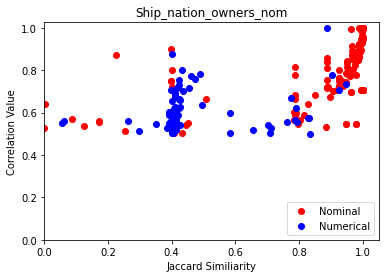

In [238]:
plt.scatter(prep_nom_1[1], prep_nom_1[0], c="red", label = "Nominal")
plt.scatter(prep_num_1[1], prep_num_1[0], c="blue", label = "Numerical")
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.xlabel("Jaccard Similiarity")
plt.ylabel("Correlation Value")
plt.legend(loc="lower right")
plt.title("Ship_nation_owners_nom")
plt.show()

<font size="6">2) Correlation with ship_nation_owners_num</font>

In [28]:
corr_nom_2 = dython_nom_to_num_correlation(all_nominal, ship_nation_owners_num, 0)
corr_nom_2

[('XMIMPFLAG', 'TONNAGE', 0.6363795332750406),
 ('XMIMPFLAG', 'GUNS', 0.49709459993787874),
 ('NATIONAL', 'TONNAGE', 0.5401297422230773),
 ('NATIONAL', 'GUNS', 0.37745483517871975),
 ('TONTYPE', 'TONNAGE', 0.7337988538680801),
 ('TONTYPE', 'GUNS', 0.4762902142706966),
 ('RIG', 'TONNAGE', 0.48286702271207144),
 ('RIG', 'GUNS', 0.3494491140935042),
 ('YRCONS', 'TONNAGE', 0.3777076624980546),
 ('YRCONS', 'GUNS', 0.37167466611035604),
 ('PLACCONS', 'TONNAGE', 0.40737318457580785),
 ('PLACCONS', 'GUNS', 0.5000068145892917),
 ('CONSTREG', 'TONNAGE', 0.3743395465685645),
 ('CONSTREG', 'GUNS', 0.4240107463986253),
 ('YRREG', 'TONNAGE', 0.24809615242562513),
 ('YRREG', 'GUNS', 0.3822812189222696),
 ('PLACREG', 'TONNAGE', 0.22485725899863346),
 ('PLACREG', 'GUNS', 0.33756637173373305),
 ('REGISREG', 'TONNAGE', 0.20935424807661696),
 ('REGISREG', 'GUNS', 0.3244019598202274),
 ('OWNERA', 'TONNAGE', 0.7835071617726155),
 ('OWNERA', 'GUNS', 0.6566629353732619),
 ('OWNERB', 'TONNAGE', 0.5052227747724

In [29]:
corr_num_2 = dython_num_to_num_correlation(ship_nation_owners_num, all_numerical, 0)
corr_num_2

/Users/jessickmon/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/jessickmon/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


[('TONNAGE', 'GUNS', 0.5055079989510385),
 ('TONNAGE', 'NPPRETRA', 0.15278287192663706),
 ('TONNAGE', 'NPPRIOR', 0.055485143312645445),
 ('TONNAGE', 'VOYAGE', 0.0772081139349672),
 ('TONNAGE', 'VOY2IMP', 0.03140332066679846),
 ('TONNAGE', 'CREW1', 0.5911735997749509),
 ('TONNAGE', 'CREW2', 0.5673997188616262),
 ('TONNAGE', 'CREW3', 0.5859347892127587),
 ('TONNAGE', 'CREW4', 0.5413796187669495),
 ('TONNAGE', 'CREW5', 0.47518172856347285),
 ('TONNAGE', 'CREW', 0.7436911367845337),
 ('TONNAGE', 'SAILD1', 0.0065206406922737195),
 ('TONNAGE', 'SAILD2', 0.10475117959112029),
 ('TONNAGE', 'SAILD3', 0.07537726504134132),
 ('TONNAGE', 'SAILD4', 0.08227815756328749),
 ('TONNAGE', 'SAILD5', 0.020127077610337232),
 ('TONNAGE', 'CREWDIED', 0.1318614603041928),
 ('TONNAGE', 'NDESERT', 0.12287740811315193),
 ('TONNAGE', 'SLINTEND', 0.6038807658219575),
 ('TONNAGE', 'SLINTEN2', 0.5286342495478497),
 ('TONNAGE', 'NCAR13', 0.4356176225674325),
 ('TONNAGE', 'NCAR15', 0.06757241480011458),
 ('TONNAGE', 'T

In [30]:
prep_nom_2 = prep_jac_to_corr_plot(corr_nom_2)

In [31]:
prep_num_2 = prep_jac_to_corr_plot(corr_num_2)

In [384]:
prep_nom_2

([0.6363795332750406,
  0.5401297422230773,
  0.7337988538680801,
  0.5000068145892917,
  0.7835071617726155,
  0.6566629353732619,
  0.5052227747724689,
  0.5859032325621315,
  0.5435782427784581,
  0.5077823654098557,
  0.5011486715560779,
  0.5553327558796988,
  0.5421935639742331,
  0.5102702890974041,
  0.5064617086539789,
  0.5047945317341133,
  0.5868260741740206,
  0.5630993257362167,
  0.5277630531038766],
 [0.0038948393378773127,
  0.4268883561993166,
  0.9465119860376777,
  0.834883120237634,
  0.48878822197055494,
  0.42679278061963133,
  0.5846450695643343,
  0.3032029565753003,
  0.3347379144285979,
  0.33472241515025236,
  0.6368291224398266,
  0.2060743236130119,
  0.335200444403296,
  0.3915026523226414,
  0.6270221350729666,
  0.07898728880054402,
  0.2061269607327087,
  0.09765530577713319,
  0.09765058493667214])

In [385]:
prep_num_2

([0.5055079989510385,
  0.5911735997749509,
  0.5673997188616262,
  0.5859347892127587,
  0.5413796187669495,
  0.7436911367845337,
  0.6038807658219575,
  0.5286342495478497,
  0.569002431239089,
  0.5395441244847021,
  0.5263858754992249,
  0.5060623870679701,
  0.8999340771700751,
  0.5390537228798621,
  0.6809211191288569,
  0.610221702035031,
  0.5677356594284729,
  0.6571547120733245,
  0.777121660303193,
  0.5545930576510233,
  1.0,
  1.0,
  0.5419389400991067,
  0.5380098556460534,
  0.5696700216024143,
  0.6167399613673494,
  0.6171757454326243,
  0.6129413501581741,
  0.5910667304812507,
  0.5413777481174181,
  0.6243690996719617,
  0.5440255386331738,
  0.5198235259781567,
  0.5914826023271268,
  0.5910192422764645,
  0.5890317411271365,
  0.8688944100055618,
  0.5033118668716134,
  0.5786094825515766,
  0.651035885394421,
  0.5182674376046913,
  0.5716687801333188,
  0.5164227793617947,
  0.5427831484782704,
  0.5380129931434494,
  0.6131349678061734,
  0.8012296357140164,


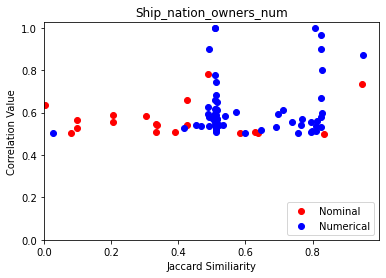

In [244]:
plt.scatter(prep_nom_2[1], prep_nom_2[0], c="red", label = "Nominal")
plt.scatter(prep_num_2[1], prep_num_2[0], c="blue", label = "Numerical")
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.xlabel("Jaccard Similiarity")
plt.ylabel("Correlation Value")
plt.legend(loc="lower right")
plt.title("Ship_nation_owners_num")
plt.show()

<font size="6">3) Correlation with voyage_outcome_nom</font>

In [32]:
corr_nom_3 = dython_nom_to_nom_correlation(all_nominal, voyage_outcome_nom, 0)
corr_nom_3

[('XMIMPFLAG', 'FATE', 0.1201596874474677),
 ('XMIMPFLAG', 'FATE2', 0.32463881636273556),
 ('XMIMPFLAG', 'FATE3', 0.22242942497064225),
 ('XMIMPFLAG', 'FATE4', 0.3601322656579762),
 ('XMIMPFLAG', 'RESISTANCE', 0.06383135953518354),
 ('NATIONAL', 'FATE', 0.22958493405447641),
 ('NATIONAL', 'FATE2', 0.18921314225484803),
 ('NATIONAL', 'FATE3', 0.1087043283145462),
 ('NATIONAL', 'FATE4', 0.19204204852705617),
 ('NATIONAL', 'RESISTANCE', 0.04504532938148309),
 ('TONTYPE', 'FATE', 0.35618592895769546),
 ('TONTYPE', 'FATE2', 0.2576302693215087),
 ('TONTYPE', 'FATE3', 0.1695299839241901),
 ('TONTYPE', 'FATE4', 0.27819295582221437),
 ('TONTYPE', 'RESISTANCE', 0.04868803115741193),
 ('RIG', 'FATE', 0.1049859643388327),
 ('RIG', 'FATE2', 0.22648287839095682),
 ('RIG', 'FATE3', 0.13910463513582536),
 ('RIG', 'FATE4', 0.24890838627259437),
 ('RIG', 'RESISTANCE', 0.04661240129889707),
 ('YRCONS', 'FATE', 0.06550017954130771),
 ('YRCONS', 'FATE2', 0.10152513646249997),
 ('YRCONS', 'FATE3', 0.0987844

In [33]:
corr_num_3 = dython_nom_to_num_correlation(voyage_outcome_nom, all_numerical, 0)
corr_num_3

[('FATE', 'TONNAGE', 0.36164738730410984),
 ('FATE', 'GUNS', 0.21123579413840657),
 ('FATE', 'NPPRETRA', 0.12120450521467115),
 ('FATE', 'NPPRIOR', 0.2316269872168039),
 ('FATE', 'VOYAGE', 0.21260108513689294),
 ('FATE', 'VOY1IMP', 0.4401630917524151),
 ('FATE', 'VOY2IMP', 0.29236539384841737),
 ('FATE', 'CREW1', 0.372585224679973),
 ('FATE', 'CREW2', 0.08326994791766361),
 ('FATE', 'CREW3', 0.1907275078862572),
 ('FATE', 'CREW4', 0.18834395296932904),
 ('FATE', 'CREW5', 0.09431997814462195),
 ('FATE', 'CREW', 0.022150885796586528),
 ('FATE', 'SAILD1', 0.07557571498442511),
 ('FATE', 'SAILD2', 0.17830323558963534),
 ('FATE', 'SAILD3', 0.14438817638362111),
 ('FATE', 'SAILD4', 0.11938904955412476),
 ('FATE', 'SAILD5', 0.09657420763641611),
 ('FATE', 'CREWDIED', 0.24800443422560572),
 ('FATE', 'NDESERT', 0.17289943500435445),
 ('FATE', 'SLINTEND', 0.2934296901502979),
 ('FATE', 'SLINTEN2', 0.0729161700623819),
 ('FATE', 'NCAR13', 0.15875563111481233),
 ('FATE', 'NCAR15', 0.06619425549491

In [34]:
prep_nom_3 = prep_jac_to_corr_plot(corr_nom_3)

In [35]:
prep_num_3 = prep_jac_to_corr_plot(corr_num_3)

In [380]:
prep_nom_3

([0.9138336575348791,
  0.994351548532347,
  0.990637541906927,
  0.5493405699685059,
  0.748116408895644,
  0.8834611214444654,
  0.5328807044703658,
  0.5293172994120948,
  0.5343971186266402,
  0.5979015884052342,
  0.6753309565962947,
  0.5393138350193236,
  0.5263104295103558,
  0.50157924722941],
 [0, 0, 0, 0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [381]:
prep_num_3

([], [])

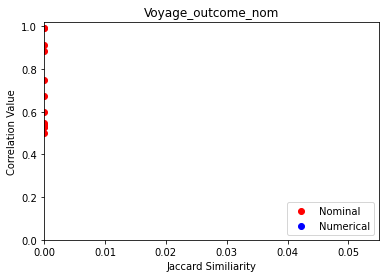

In [267]:
plt.scatter(prep_nom_3[1], prep_nom_3[0], c="red", label = "Nominal")
plt.scatter(prep_num_3[1], prep_num_3[0], c="blue", label = "Numerical")
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.xlabel("Jaccard Similiarity")
plt.ylabel("Correlation Value")
plt.legend(loc="lower right")
plt.title("Voyage_outcome_nom")
plt.show()

<font size="6">4) Correlation with itinerary_nom</font>

In [36]:
corr_nom_4 = dython_nom_to_nom_correlation(all_nominal, itinerary_nom, 0)
corr_nom_4

[('XMIMPFLAG', 'PORTDEP', 0.22241089235430525),
 ('XMIMPFLAG', 'EMBPORT', 0.15207236336873253),
 ('XMIMPFLAG', 'EMBPORT2', 0.07313508394396415),
 ('XMIMPFLAG', 'EMBREG', 0.2689037693077364),
 ('XMIMPFLAG', 'EMBREG2', 0.14974964475299424),
 ('XMIMPFLAG', 'ARRPORT', 0.15417973386896808),
 ('XMIMPFLAG', 'ARRPORT2', 0.08496164759671508),
 ('XMIMPFLAG', 'REGARR', 0.1961327149035159),
 ('XMIMPFLAG', 'REGARR2', 0.09383829545506552),
 ('XMIMPFLAG', 'PLAC1TRA', 0.1906587513867825),
 ('XMIMPFLAG', 'PLAC2TRA', 0.08821222641608387),
 ('XMIMPFLAG', 'PLAC3TRA', 0.05387223172034292),
 ('XMIMPFLAG', 'REGEM1', 0.45665855734802313),
 ('XMIMPFLAG', 'REGEM2', 0.23741393378764522),
 ('XMIMPFLAG', 'REGEM3', 0.13683682603528405),
 ('XMIMPFLAG', 'NPAFTTRA', 0.08477201228683923),
 ('XMIMPFLAG', 'SLA1PORT', 0.20666056767218777),
 ('XMIMPFLAG', 'ADPSALE1', 0.047862114188093496),
 ('XMIMPFLAG', 'ADPSALE2', 0.0),
 ('XMIMPFLAG', 'REGDIS1', 0.2478222748301532),
 ('XMIMPFLAG', 'REGDIS2', 0.07183237438256074),
 ('XMIM

In [37]:
corr_num_4 = dython_nom_to_num_correlation(itinerary_nom, all_numerical, 0)
corr_num_4

[('PORTDEP', 'TONNAGE', 0.5859032325621315),
 ('PORTDEP', 'GUNS', 0.46967004096503634),
 ('PORTDEP', 'NPPRETRA', 0.30585203306110403),
 ('PORTDEP', 'NPPRIOR', 0.34677605819389745),
 ('PORTDEP', 'VOYAGE', 0.35203358906911736),
 ('PORTDEP', 'VOY1IMP', 0.4328669013198211),
 ('PORTDEP', 'VOY2IMP', 0.41236748239667126),
 ('PORTDEP', 'CREW1', 0.616266695271019),
 ('PORTDEP', 'CREW2', 0.12317430643268448),
 ('PORTDEP', 'CREW3', 0.4278829603052108),
 ('PORTDEP', 'CREW4', 0.4044788002721336),
 ('PORTDEP', 'CREW5', 0.2705293752876875),
 ('PORTDEP', 'CREW', 0.08992551476238754),
 ('PORTDEP', 'SAILD1', 0.1768351281631554),
 ('PORTDEP', 'SAILD2', 0.4606665394186166),
 ('PORTDEP', 'SAILD3', 0.40496339717385355),
 ('PORTDEP', 'SAILD4', 0.38699094655661503),
 ('PORTDEP', 'SAILD5', 0.29273584926079615),
 ('PORTDEP', 'CREWDIED', 0.503423114164661),
 ('PORTDEP', 'NDESERT', 0.3253392712479965),
 ('PORTDEP', 'SLINTEND', 0.6569025322713218),
 ('PORTDEP', 'SLINTEN2', 0.11654873885849741),
 ('PORTDEP', 'NCAR1

In [38]:
prep_nom_4 = prep_jac_to_corr_plot(corr_nom_4)

In [39]:
prep_num_4 = prep_jac_to_corr_plot(corr_num_4)

In [376]:
prep_nom_4

([0.5165747964178908,
  0.5110122920907676,
  0.5535429291819116,
  0.5351091925828154,
  0.5832300826022658,
  0.5645675380701684,
  0.6034160965202379,
  0.5340137535694606,
  0.5328807044703658,
  0.5293172994120948,
  0.5343971186266402,
  0.974686975392911,
  0.9537123133840485,
  0.9132505526214492,
  0.9917915130646414,
  0.9777872402926895,
  0.9858006630343424,
  0.9970643872424756,
  0.8365036622894717,
  0.9965101549500637,
  0.9925506968503445,
  0.87814328817692,
  0.9863752943804304,
  0.9226149917395103,
  0.992351456463818,
  0.9997644042513123,
  0.916333284749208,
  0.9629289702094432,
  0.9952101161208977,
  0.9860351677001228,
  0.9918578117724282,
  0.6521163463394211,
  0.6792018270251479,
  0.5348208266203955,
  0.6168788990631608,
  0.5324717414562492,
  0.5488707296429997,
  0.5266359244222504,
  0.5501538716382152,
  0.731083093910639,
  0.6055717187354114,
  0.5794875941058032,
  0.7376344767537173,
  0.6039197149905577,
  0.9881689510397748,
  0.995815549831

In [377]:
prep_num_4

([0.5859032325621315,
  0.616266695271019,
  0.503423114164661,
  0.6569025322713218,
  0.6086759588122349,
  0.5160859214365083,
  0.6723520429640204,
  0.5225889624174265,
  0.5135499884052951,
  0.6019983944429415,
  0.5213432052528374,
  0.5683464796199463,
  0.5292397795970495,
  0.6231355610457533,
  0.5435782427784581,
  0.5787366891563466,
  0.5054274171800173,
  0.5037845195529643,
  0.6615077776215135,
  0.5077608032319525,
  0.5178472296030453,
  0.5071045769876619,
  0.5146139827831371,
  0.5188588420440532,
  0.5584334313781082,
  0.6536657454208673,
  0.5635609014297747,
  0.5750219577049918,
  0.6204350506960346,
  0.5832346853236521,
  0.5077823654098557,
  0.5334274080395077,
  0.6174662377353541,
  0.6141234708628673,
  0.5011486715560779,
  0.5989785620784507,
  0.5205981651464454,
  0.568549558568142,
  0.5034232911714362,
  0.7070969892947101,
  0.5159276605127552,
  0.5449304340533114,
  0.5265807993585166,
  0.5553327558796988,
  0.5160791794707011,
  0.543955064

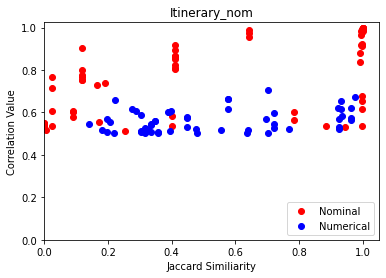

In [266]:
plt.scatter(prep_nom_4[1], prep_nom_4[0], c="red", label = "Nominal")
plt.scatter(prep_num_4[1], prep_num_4[0], c="blue", label = "Numerical")
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.xlabel("Jaccard Similiarity")
plt.ylabel("Correlation Value")
plt.legend(loc="lower right")
plt.title("Itinerary_nom")
plt.show()

<font size="6">5) Correlation with itinerary_num</font>

In [40]:
corr_nom_5 = dython_nom_to_num_correlation(all_nominal, itinerary_num, 0)
corr_nom_5

[('XMIMPFLAG', 'NPPRETRA', 0.4644206323105426),
 ('XMIMPFLAG', 'NPPRIOR', 0.3597781659320662),
 ('NATIONAL', 'NPPRETRA', 0.14548086485343914),
 ('NATIONAL', 'NPPRIOR', 0.2828568516310128),
 ('TONTYPE', 'NPPRETRA', 0.14903199426737257),
 ('TONTYPE', 'NPPRIOR', 0.33809141420596267),
 ('RIG', 'NPPRETRA', 0.10659423246076662),
 ('RIG', 'NPPRIOR', 0.29728756197781653),
 ('YRCONS', 'NPPRETRA', 0.07308112320844656),
 ('YRCONS', 'NPPRIOR', 0.3268926915289242),
 ('PLACCONS', 'NPPRETRA', 0.08305179228199666),
 ('PLACCONS', 'NPPRIOR', 0.34338349845599764),
 ('CONSTREG', 'NPPRETRA', 0.04528501005010892),
 ('CONSTREG', 'NPPRIOR', 0.31572828562863126),
 ('YRREG', 'NPPRETRA', 0.07001732639758584),
 ('YRREG', 'NPPRIOR', 0.25195431192294443),
 ('PLACREG', 'NPPRETRA', 0.13274106891238724),
 ('PLACREG', 'NPPRIOR', 0.21298828523623334),
 ('REGISREG', 'NPPRETRA', 0.05512051430226287),
 ('REGISREG', 'NPPRIOR', 0.20260815491072973),
 ('OWNERA', 'NPPRETRA', 0.6813500253411664),
 ('OWNERA', 'NPPRIOR', 0.590099

In [41]:
corr_num_5 = dython_num_to_num_correlation(itinerary_num, all_numerical, 0)
corr_num_5

/Users/jessickmon/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/jessickmon/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


[('NPPRETRA', 'TONNAGE', 0.15278287192663706),
 ('NPPRETRA', 'GUNS', 0.06692381005132177),
 ('NPPRETRA', 'NPPRIOR', 0.03148087350936807),
 ('NPPRETRA', 'VOYAGE', 0.02283189055642991),
 ('NPPRETRA', 'VOY1IMP', 0.3123807234261367),
 ('NPPRETRA', 'VOY2IMP', 0.1366000482859383),
 ('NPPRETRA', 'CREW1', 0.09540147066228546),
 ('NPPRETRA', 'CREW2', 0.1749168371787043),
 ('NPPRETRA', 'CREW3', 0.09448209450493882),
 ('NPPRETRA', 'CREW4', 0.18015074746454782),
 ('NPPRETRA', 'CREW5', 0.458543497574819),
 ('NPPRETRA', 'SAILD1', 0.281748909338536),
 ('NPPRETRA', 'SAILD2', 0.013057806165107738),
 ('NPPRETRA', 'SAILD5', 0.02593000835863153),
 ('NPPRETRA', 'CREWDIED', 0.07211151166316795),
 ('NPPRETRA', 'NDESERT', 0.04991091043607849),
 ('NPPRETRA', 'SLINTEND', 0.06909044624099034),
 ('NPPRETRA', 'SLINTEN2', 0.424289867034288),
 ('NPPRETRA', 'NCAR13', 0.029308818308003446),
 ('NPPRETRA', 'NCAR15', 0.07558977521046245),
 ('NPPRETRA', 'NCAR17', 0.008507020422730832),
 ('NPPRETRA', 'TSLAVESP', 0.07649233

In [42]:
prep_nom_5 = prep_jac_to_corr_plot(corr_nom_5)

In [43]:
prep_num_5 = prep_jac_to_corr_plot(corr_num_5)

In [372]:
prep_nom_5

([0.6813500253411664, 0.5900992891967002],
 [0.40904191616766467, 0.42146110511806306])

In [373]:
prep_num_5

([0.7300045620578569], [0.8997562461913468])

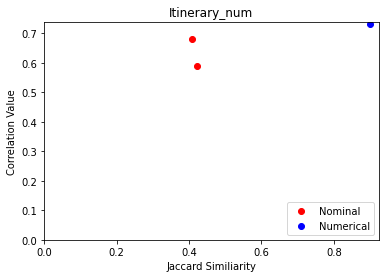

In [265]:
plt.scatter(prep_nom_5[1], prep_nom_5[0], c="red", label = "Nominal")
plt.scatter(prep_num_5[1], prep_num_5[0], c="blue", label = "Numerical")
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.xlabel("Jaccard Similiarity")
plt.ylabel("Correlation Value")
plt.legend(loc="lower right")
plt.title("Itinerary_num")
plt.show()

<font size="6">6) Correlation with voyage_dates_nom</font>

In [44]:
corr_nom_6 = dython_nom_to_nom_correlation(all_nominal, voyage_dates_nom, 0)
corr_nom_6

[('XMIMPFLAG', 'DATEDEPA', 0.08925573540921265),
 ('XMIMPFLAG', 'DATEDEPB', 0.14872590819557124),
 ('XMIMPFLAG', 'DATEDEPC', 0.22456956798520186),
 ('XMIMPFLAG', 'D1SLATRA', 0.08155559104799696),
 ('XMIMPFLAG', 'D1SLATRB', 0.1441030098813539),
 ('XMIMPFLAG', 'D1SLATRC', 0.1445374934138821),
 ('XMIMPFLAG', 'DLSLATRA', 0.06549391669829613),
 ('XMIMPFLAG', 'DLSLATRB', 0.1139485216927885),
 ('XMIMPFLAG', 'DLSLATRC', 0.15946172539993672),
 ('XMIMPFLAG', 'DATARR32', 0.06357809208543465),
 ('XMIMPFLAG', 'DATARR33', 0.11128474148416675),
 ('XMIMPFLAG', 'DATARR34', 0.23301137722603454),
 ('XMIMPFLAG', 'DATARR36', 0.0),
 ('XMIMPFLAG', 'DATARR37', 0.0249011257633587),
 ('XMIMPFLAG', 'DATARR38', 0.034924885246514714),
 ('XMIMPFLAG', 'DATARR39', 0.010270568952502815),
 ('XMIMPFLAG', 'DATARR40', 0.02603402814216233),
 ('XMIMPFLAG', 'DATARR41', 0.024529632862643917),
 ('XMIMPFLAG', 'DDEPAM', 0.07232518949767662),
 ('XMIMPFLAG', 'DDEPAMB', 0.13087818958245387),
 ('XMIMPFLAG', 'DDEPAMC', 0.114306832624

In [45]:
corr_num_6 = dython_nom_to_num_correlation(voyage_dates_nom, all_numerical, 0)
corr_num_6

[('DATEDEPA', 'TONNAGE', 0.3229722031872235),
 ('DATEDEPA', 'GUNS', 0.19183388445468727),
 ('DATEDEPA', 'NPPRETRA', 0.09608464245863776),
 ('DATEDEPA', 'NPPRIOR', 0.1691946285524992),
 ('DATEDEPA', 'VOYAGE', 0.08354691646080077),
 ('DATEDEPA', 'VOY1IMP', 0.4982485259022617),
 ('DATEDEPA', 'VOY2IMP', 0.14774765086628236),
 ('DATEDEPA', 'CREW1', 0.3884486018659385),
 ('DATEDEPA', 'CREW2', 0.05953756321169516),
 ('DATEDEPA', 'CREW3', 0.13702135915596567),
 ('DATEDEPA', 'CREW4', 0.14279474402464726),
 ('DATEDEPA', 'CREW5', 0.07624352908371189),
 ('DATEDEPA', 'CREW', 0.03905009334710954),
 ('DATEDEPA', 'SAILD1', 0.05755435058054124),
 ('DATEDEPA', 'SAILD2', 0.11868508416329451),
 ('DATEDEPA', 'SAILD3', 0.10196769992943465),
 ('DATEDEPA', 'SAILD4', 0.08406469169784973),
 ('DATEDEPA', 'SAILD5', 0.07692738324826218),
 ('DATEDEPA', 'CREWDIED', 0.1952897157455838),
 ('DATEDEPA', 'NDESERT', 0.1374748241086873),
 ('DATEDEPA', 'SLINTEND', 0.2453936970002696),
 ('DATEDEPA', 'SLINTEN2', 0.04708499988

In [46]:
prep_nom_6 = prep_jac_to_corr_plot(corr_nom_6)

In [47]:
prep_num_6 = prep_jac_to_corr_plot(corr_num_6)

In [368]:
prep_nom_6

([0.7218492912296982,
  0.8358447998873192,
  0.527211308351237,
  0.5488707296429997,
  0.6521163463394211,
  0.6792018270251478,
  0.6168788990631608,
  0.5266359244222503,
  0.5348208266203954,
  0.5324717414562492,
  0.5501538716382152,
  0.743917030826933,
  0.7696710683728496,
  0.7799011713325579,
  0.817246055708309,
  0.5292718444546063,
  0.5303369215055325,
  0.5495021830767756,
  0.780324697141555,
  0.7771370829533526,
  0.7707771336574526,
  0.7848385687406688,
  0.5632896140752929,
  0.5964040222412426,
  0.8063029111910978,
  0.9126786776528903,
  0.9290906651397957,
  0.5466816031278345,
  0.9995008734403308,
  0.999210061200907,
  0.9990578322512584,
  0.9474228682843685,
  0.9995567375668745,
  0.9998476507037314,
  0.5089755217924768,
  0.5937777928269634,
  0.5666498134157758,
  0.8244498629802333,
  0.616154068283982,
  0.9527632921058895,
  0.9726140997951708,
  0.9842116404410839,
  0.9862377384198479,
  0.6341637971863681,
  0.5621672902908547,
  0.744797278118

In [369]:
prep_num_6

([0.5102702890974041,
  0.5568299871895029,
  0.517454661841375,
  0.5476488592502956,
  0.5045475226420814,
  0.6461768616036427,
  0.5517194552364043,
  0.5308603211531105,
  0.5793744301812848,
  0.6305858836847572,
  0.5527254730496264,
  0.5494384538389575,
  0.6648334806189998,
  0.5809736290147833,
  0.5052202583912466,
  0.508420186828268,
  0.5064617086539789,
  0.5267926653292514,
  0.5240776834254733],
 [0.3915026523226414,
  0.8217371679133351,
  0.7946992006731174,
  0.7451133443913227,
  0.7026920031670626,
  0.7730013447273674,
  0.6505140774803696,
  0.6859040362438221,
  0.509175306928116,
  0.6248278142046394,
  0.9371956339210747,
  0.937731196054254,
  0.937731196054254,
  0.8515660985720866,
  0.8285064486411792,
  0.7214398595259,
  0.6270221350729666,
  0.6990812720848056,
  0.6288911044643847])

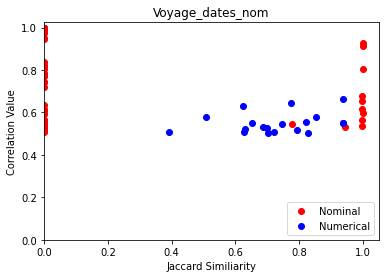

In [264]:
plt.scatter(prep_nom_6[1], prep_nom_6[0], c="red", label = "Nominal")
plt.scatter(prep_num_6[1], prep_num_6[0], c="blue", label = "Numerical")
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.xlabel("Jaccard Similiarity")
plt.ylabel("Correlation Value")
plt.legend(loc="lower right")
plt.title("Voyage_dates_nom")
plt.show()

<font size="6">7) Correlation with voyage_dates_num</font>

In [48]:
corr_nom_7 = dython_nom_to_num_correlation(all_nominal, voyage_dates_num, 0)
corr_nom_7

[('XMIMPFLAG', 'VOYAGE', 0.3868267644314085),
 ('XMIMPFLAG', 'VOY1IMP', 0.43234094269472256),
 ('XMIMPFLAG', 'VOY2IMP', 0.42021651596499277),
 ('NATIONAL', 'VOYAGE', 0.24527654047755962),
 ('NATIONAL', 'VOY1IMP', 0.3577453390841939),
 ('NATIONAL', 'VOY2IMP', 0.3160011793312706),
 ('TONTYPE', 'VOYAGE', 0.24807328868310438),
 ('TONTYPE', 'VOY1IMP', 0.37306761457072035),
 ('TONTYPE', 'VOY2IMP', 0.3364678668303048),
 ('RIG', 'VOYAGE', 0.20199095514458842),
 ('RIG', 'VOY1IMP', 0.24147340163135014),
 ('RIG', 'VOY2IMP', 0.17216711112341773),
 ('YRCONS', 'VOYAGE', 0.12599310671120353),
 ('YRCONS', 'VOY1IMP', 0.2193441161930215),
 ('YRCONS', 'VOY2IMP', 0.09646937718704858),
 ('PLACCONS', 'VOYAGE', 0.16703046026222382),
 ('PLACCONS', 'VOY1IMP', 0.23517625995362457),
 ('PLACCONS', 'VOY2IMP', 0.1326081279886828),
 ('CONSTREG', 'VOYAGE', 0.14446274617207744),
 ('CONSTREG', 'VOY1IMP', 0.20354608480406966),
 ('CONSTREG', 'VOY2IMP', 0.10229353598197832),
 ('YRREG', 'VOYAGE', 0.12242687896221359),
 ('Y

In [49]:
corr_num_7 = dython_num_to_num_correlation(voyage_dates_num, all_numerical, 0)
corr_num_7

/Users/jessickmon/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/jessickmon/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


[('VOYAGE', 'TONNAGE', 0.0772081139349672),
 ('VOYAGE', 'GUNS', 0.44082841113035504),
 ('VOYAGE', 'NPPRETRA', 0.022831890556429917),
 ('VOYAGE', 'NPPRIOR', 0.10753894407502748),
 ('VOYAGE', 'VOY1IMP', 0.42861320422645455),
 ('VOYAGE', 'VOY2IMP', 0.9496579669416225),
 ('VOYAGE', 'CREW1', 0.1809470015218283),
 ('VOYAGE', 'CREW3', 0.014837016112386931),
 ('VOYAGE', 'CREW4', 0.1333039369336786),
 ('VOYAGE', 'CREW', 0.4798689939774685),
 ('VOYAGE', 'SAILD1', 0.02151439581131561),
 ('VOYAGE', 'SAILD3', 0.18998053379025442),
 ('VOYAGE', 'CREWDIED', 0.08547281266287432),
 ('VOYAGE', 'SLINTEN2', 0.850914221626386),
 ('VOYAGE', 'NCAR13', 0.05015816066981415),
 ('VOYAGE', 'TSLAVESP', 0.10613395259409444),
 ('VOYAGE', 'SLAS32', 0.022412625282241843),
 ('VOYAGE', 'MEN1', 0.20825330045168594),
 ('VOYAGE', 'WOMEN1', 0.32628694171366635),
 ('VOYAGE', 'CHILD1', 0.08091154596264812),
 ('VOYAGE', 'MALE1', 0.21306923420033766),
 ('VOYAGE', 'FEMALE1', 0.3836576823658561),
 ('VOYAGE', 'MEN2', 0.475422259192

In [50]:
prep_nom_7 = prep_jac_to_corr_plot(corr_nom_7)

In [51]:
prep_num_7 = prep_jac_to_corr_plot(corr_num_7)

In [364]:
prep_nom_7

([0.7202677857613546,
  0.6349027705370646,
  0.7009921905430785,
  0.5787366891563466,
  0.5054274171800173,
  0.5334274080395077,
  0.5755752625818874,
  0.5066192727843891,
  0.5568299871895029,
  0.517454661841375,
  0.5476488592502956,
  0.6461768616036427,
  0.5517194552364043,
  0.5793744301812848,
  0.5259902579149089],
 [0.42076953638336234,
  0.4965453891928591,
  0.43684350485307805,
  0.44902912621359226,
  0.35807860262008734,
  0.44900966497637934,
  0.4493067590987868,
  0.3586082617133352,
  0.8217371679133351,
  0.7946992006731174,
  0.7451133443913227,
  0.7730013447273674,
  0.6505140774803696,
  0.509175306928116,
  0.18490238611713666])

In [365]:
prep_num_7

([0.9496579669416225,
  0.850914221626386,
  0.611102361050634,
  0.5321751832980512,
  0.5226276951785844,
  0.9999999999999999,
  0.9999999999999999,
  0.8962581595302717],
 [0.8970482810211016,
  0.8866821782726719,
  0.8868698060941829,
  0.8864631240649415,
  0.6386764216827403,
  0.638121087907827,
  0.6382041765911483,
  0.7975626644509071])

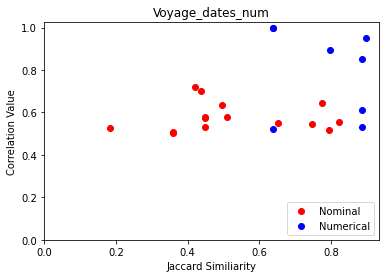

In [271]:
plt.scatter(prep_nom_7[1], prep_nom_7[0], c="red", label = "Nominal")
plt.scatter(prep_num_7[1], prep_num_7[0], c="blue", label = "Numerical")
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.xlabel("Jaccard Similiarity")
plt.ylabel("Correlation Value")
plt.legend(loc="lower right")
plt.title("Voyage_dates_num")
plt.show()

<font size="6">8) Correlation with captain_and_crew_num</font>

In [52]:
corr_nom_8 = dython_nom_to_num_correlation(all_nominal, captain_and_crew_num, 0)
corr_nom_8

[('XMIMPFLAG', 'CREW1', 0.5785877462683561),
 ('XMIMPFLAG', 'CREW2', 0.19426885363419594),
 ('XMIMPFLAG', 'CREW3', 0.3744431220186235),
 ('XMIMPFLAG', 'CREW4', 0.4009449681907717),
 ('XMIMPFLAG', 'CREW5', 0.22804489210140158),
 ('XMIMPFLAG', 'CREW', 0.10576870037861531),
 ('XMIMPFLAG', 'SAILD1', 0.14603035842207365),
 ('XMIMPFLAG', 'SAILD2', 0.39190136563057437),
 ('XMIMPFLAG', 'SAILD3', 0.3875003569985809),
 ('XMIMPFLAG', 'SAILD4', 0.31336521085788077),
 ('XMIMPFLAG', 'SAILD5', 0.2556868521803894),
 ('XMIMPFLAG', 'CREWDIED', 0.4494384447073899),
 ('XMIMPFLAG', 'NDESERT', 0.4022270601435018),
 ('NATIONAL', 'CREW1', 0.48198362562139213),
 ('NATIONAL', 'CREW2', 0.07939512386752594),
 ('NATIONAL', 'CREW3', 0.2933827863877375),
 ('NATIONAL', 'CREW4', 0.27387201819497575),
 ('NATIONAL', 'CREW5', 0.11043443063653217),
 ('NATIONAL', 'CREW', 0.03322451500203789),
 ('NATIONAL', 'SAILD1', 0.13388416028640718),
 ('NATIONAL', 'SAILD2', 0.39943576880951026),
 ('NATIONAL', 'SAILD3', 0.34281289905488

In [53]:
corr_num_8 = dython_num_to_num_correlation(captain_and_crew_num, all_numerical, 0)
corr_num_8

[('CREW1', 'TONNAGE', 0.591173599774951),
 ('CREW1', 'GUNS', 0.6131349678061734),
 ('CREW1', 'NPPRETRA', 0.09540147066228546),
 ('CREW1', 'NPPRIOR', 0.05712223091803214),
 ('CREW1', 'VOYAGE', 0.1809470015218283),
 ('CREW1', 'VOY1IMP', 0.038580299662860675),
 ('CREW1', 'VOY2IMP', 0.16285239430612186),
 ('CREW1', 'CREW2', 0.6833753578208598),
 ('CREW1', 'CREW3', 0.7673499548911229),
 ('CREW1', 'CREW4', 0.6010409945592433),
 ('CREW1', 'CREW5', 0.6091934835237964),
 ('CREW1', 'CREW', 0.6664531761988789),
 ('CREW1', 'SAILD1', 0.05220986643572841),
 ('CREW1', 'SAILD2', 0.2133098124887707),
 ('CREW1', 'SAILD3', 0.22924473827538144),
 ('CREW1', 'SAILD4', 0.43926970523537845),
 ('CREW1', 'SAILD5', 0.23476161663516562),
 ('CREW1', 'CREWDIED', 0.48349957375377156),
 ('CREW1', 'NDESERT', 0.2059386852596236),
 ('CREW1', 'SLINTEND', 0.7093699521120225),
 ('CREW1', 'SLINTEN2', 0.8922161155178805),
 ('CREW1', 'NCAR13', 0.4344484098746947),
 ('CREW1', 'NCAR15', 0.15892384984138438),
 ('CREW1', 'NCAR17'

In [54]:
prep_nom_8 = prep_jac_to_corr_plot(corr_nom_8)

In [55]:
prep_num_8 = prep_jac_to_corr_plot(corr_num_8)

In [360]:
prep_nom_8

([0.5785877462683561,
  0.5424158436061826,
  0.773516911473462,
  0.6850051649852447,
  0.6762497249428662,
  0.6554820467180723,
  0.6654480945087109,
  0.7306221618012888,
  0.7537592388981544,
  0.6219480747044851,
  0.662488850672504,
  0.7166170199862357,
  0.6251420244872431,
  0.5189302518703137,
  0.5536779097051663,
  0.5632741330759735,
  0.616266695271019,
  0.503423114164661,
  0.5989785620784507,
  0.5205981651464454,
  0.5449304340533114,
  0.5265807993585166,
  0.5160791794707011,
  0.5809736290147833,
  0.5052202583912466,
  0.508420186828268,
  0.5267926653292514,
  0.6165165278080399,
  0.5032963058692375],
 [0.003630926954293037,
  0.7019578253445058,
  0.4594803289448284,
  0.4117733110974575,
  0.41207825510703894,
  0.4016519239891732,
  0.4216592557921835,
  0.42301368254154675,
  0.42209067198077543,
  0.4224211298606016,
  0.4222476458681686,
  0.45431303853801724,
  0.4266098484848485,
  0.6550676432020981,
  0.7630228887134964,
  0.7865252507832485,
  0.2746

In [361]:
prep_num_8

([0.591173599774951,
  0.6131349678061734,
  0.6833753578208598,
  0.7673499548911229,
  0.6010409945592433,
  0.6091934835237964,
  0.6664531761988789,
  0.7093699521120225,
  0.8922161155178805,
  0.5916358718409208,
  0.5071230053602259,
  0.503010007418961,
  0.540451057089761,
  0.5038788978340597,
  0.5264512054778405,
  0.5629427938348365,
  0.5222329678670935,
  0.7551132428717375,
  0.5214181760154376,
  0.5273785475802226,
  0.9999565177939942,
  1.0,
  0.576746978025216,
  0.5145956834247462,
  0.5233286221012025,
  0.5567571300426161,
  0.5581278968502026,
  0.5502416415324229,
  0.5422667429755919,
  0.5328475427529978,
  0.5584234397192381,
  0.5333695765077306,
  0.5344573084004528,
  0.6798053254123079,
  0.5154888581050293,
  0.5667299280120067,
  0.5184971934113549,
  0.5673997188616264,
  0.7897263821731256,
  0.6703054875315324,
  0.621495712224713,
  0.7872885999120988,
  0.5437657109274056,
  0.5691971091811138,
  1.0,
  0.8319479070496522,
  0.9558002612810257,
 

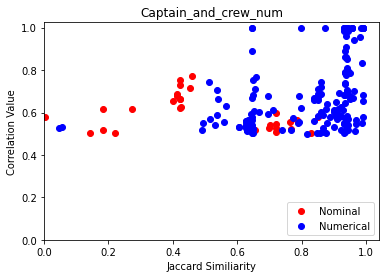

In [275]:
plt.scatter(prep_nom_8[1], prep_nom_8[0], c="red", label = "Nominal")
plt.scatter(prep_num_8[1], prep_num_8[0], c="blue", label = "Numerical")
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.xlabel("Jaccard Similiarity")
plt.ylabel("Correlation Value")
plt.legend(loc="lower right")
plt.title("Captain_and_crew_num")
plt.show()

<font size="6">9) Correlation with slaves_numbers</font>

In [56]:
corr_nom_9 = dython_nom_to_num_correlation(all_nominal, slaves_numbers, 0)
corr_nom_9

[('XMIMPFLAG', 'SLINTEND', 0.6714789125738925),
 ('XMIMPFLAG', 'SLINTEN2', 0.2501815688407237),
 ('XMIMPFLAG', 'NCAR13', 0.4422414590738585),
 ('XMIMPFLAG', 'NCAR15', 0.22906781417936334),
 ('XMIMPFLAG', 'NCAR17', 0.18941514536877616),
 ('XMIMPFLAG', 'TSLAVESP', 0.40596879334917013),
 ('XMIMPFLAG', 'TSLAVESD', 0.4247250324762686),
 ('XMIMPFLAG', 'SLAARRIV', 0.45368268232024817),
 ('XMIMPFLAG', 'SLAS32', 0.3231833742345427),
 ('XMIMPFLAG', 'SLAS36', 0.11621891426738873),
 ('XMIMPFLAG', 'SLAS39', 0.06374517035550245),
 ('NATIONAL', 'SLINTEND', 0.511475530559276),
 ('NATIONAL', 'SLINTEN2', 0.05319612289065697),
 ('NATIONAL', 'NCAR13', 0.3772280406668693),
 ('NATIONAL', 'NCAR15', 0.12407703203954205),
 ('NATIONAL', 'NCAR17', 0.1261668995542871),
 ('NATIONAL', 'TSLAVESP', 0.3158407961061982),
 ('NATIONAL', 'TSLAVESD', 0.2060013888339236),
 ('NATIONAL', 'SLAARRIV', 0.16149706188525945),
 ('NATIONAL', 'SLAS32', 0.2333962908849557),
 ('NATIONAL', 'SLAS36', 0.062101628387645096),
 ('NATIONAL', 

In [391]:
corr_num_9 = dython_num_to_num_correlation(slaves_numbers, all_numerical, 0.5)
corr_num_9

/Users/jessickmon/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/jessickmon/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


[('SLINTEND', 'TONNAGE', 0.6038807658219575),
 ('SLINTEND', 'CREW1', 0.7093699521120225),
 ('SLINTEND', 'CREW2', 0.6214957122247132),
 ('SLINTEND', 'CREW3', 0.5723969147137842),
 ('SLINTEND', 'CREW4', 0.5551549974826073),
 ('SLINTEND', 'CREW5', 0.6764794089966768),
 ('SLINTEND', 'CREW', 1.0),
 ('SLINTEND', 'TSLAVESP', 0.7350901038265428),
 ('SLINTEND', 'TSLAVESD', 0.8251241786977412),
 ('SLINTEND', 'SLAARRIV', 0.8100717408487588),
 ('SLINTEND', 'SLAS32', 0.6319530193213582),
 ('SLINTEND', 'MEN1', 0.7880839016861126),
 ('SLINTEND', 'WOMEN1', 0.7330504650976996),
 ('SLINTEND', 'ADULT1', 0.8810732176998181),
 ('SLINTEND', 'MALE1', 0.8104377941246019),
 ('SLINTEND', 'FEMALE1', 0.6993455664829978),
 ('SLINTEND', 'CHILD2', 0.6648614024993627),
 ('SLINTEND', 'MALE2', 0.9999999999999999),
 ('SLINTEND', 'MEN3', 0.669937731702947),
 ('SLINTEND', 'WOMEN3', 0.6398009118873916),
 ('SLINTEND', 'ADULT3', 0.7093237846824625),
 ('SLINTEND', 'MALE3', 0.7391706362458975),
 ('SLINTEND', 'FEMALE3', 0.78275

In [58]:
prep_nom_9 = prep_jac_to_corr_plot(corr_nom_9)


In [59]:
prep_num_9 = prep_jac_to_corr_plot(corr_num_9)

In [356]:
prep_nom_9

([0.6714789125738925,
  0.511475530559276,
  0.5978095422379405,
  0.5460361028536389,
  0.5725990749590557,
  0.6222265811928566,
  0.5563359952209057,
  0.7989154068550589,
  0.7131121796456042,
  0.5242640520128999,
  0.6248685568336089,
  0.5903304823057984,
  0.5792458828456902,
  0.551347190347771,
  0.669511247483932,
  0.5762899710822464,
  0.6569025322713218,
  0.5160859214365083,
  0.6723520429640204,
  0.5225889624174265,
  0.5037845195529643,
  0.6615077776215135,
  0.6536657454208673,
  0.5832346853236521,
  0.6174662377353541,
  0.6141234708628673,
  0.568549558568142,
  0.5034232911714362,
  0.5439550644100607,
  0.5044964653417418,
  0.5068852806618979,
  0.6621068513940932,
  0.5308603211531105,
  0.6305858836847572,
  0.5527254730496264,
  0.5494384538389575,
  0.6648334806189998,
  0.6579579876733898,
  0.504168123084879,
  0.5155177360819507],
 [0.0033990011098779136,
  0.2961873859257757,
  0.5824103807588964,
  0.3524375041007808,
  0.8321464267866067,
  0.7913451

In [357]:
prep_num_9

([0.6038807658219575,
  0.7093699521120225,
  0.6214957122247132,
  0.5723969147137842,
  0.5551549974826073,
  0.6764794089966768,
  1.0,
  0.7350901038265428,
  0.8251241786977412,
  0.8100717408487588,
  0.6319530193213582,
  0.7880839016861126,
  0.7330504650976996,
  0.8810732176998181,
  0.8104377941246019,
  0.6993455664829978,
  0.6648614024993627,
  0.9999999999999999,
  0.669937731702947,
  0.6398009118873916,
  0.7093237846824625,
  0.7391706362458975,
  0.7827557774887803,
  0.5977453606561748,
  0.8164942115343806,
  0.5626312255732111,
  0.8437676645432086,
  0.8300701345563616,
  0.8618078729151154,
  0.767975983735622,
  0.7642032415498388,
  0.7945786275269323,
  0.6690531062582273,
  0.6364435697258186,
  0.7177624791990712,
  0.7303772455199604,
  0.7185062663352215,
  0.7669051041596934,
  0.7677520826203978,
  0.7921078542590508,
  0.7241271677936757,
  0.5955177551012403,
  0.6339793708454863,
  0.8286641168218364,
  0.7120992580375558,
  0.8014222612021541,
  0.7

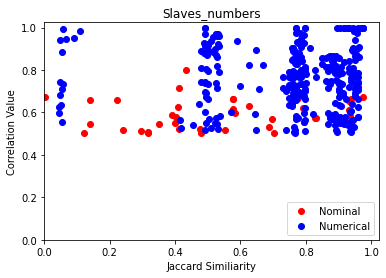

In [279]:
plt.scatter(prep_nom_9[1], prep_nom_9[0], c="red", label = "Nominal")
plt.scatter(prep_num_9[1], prep_num_9[0], c="blue", label = "Numerical")
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.xlabel("Jaccard Similiarity")
plt.ylabel("Correlation Value")
plt.legend(loc="lower right")
plt.title("Slaves_numbers")
plt.show()

<font size="6">10) Correlation with slaves_charac</font>

In [60]:
corr_nom_10 = dython_nom_to_num_correlation(all_nominal, slaves_charac, 0)
corr_nom_10

/Users/jessickmon/dython/dython/nominal.py:269: RuntimeWarning: Rounded eta = 1.0000000000000002 to 1. This is probably due to floating point precision issues.
  warnings.warn(f'Rounded eta = {eta} to 1. This is probably due to floating point precision issues.',


[('XMIMPFLAG', 'MEN1', 0.23746692381683823),
 ('XMIMPFLAG', 'WOMEN1', 0.2379026431443976),
 ('XMIMPFLAG', 'BOY1', 0.1870749805969613),
 ('XMIMPFLAG', 'GIRL1', 0.18369284724765822),
 ('XMIMPFLAG', 'ADULT1', 0.36454221376095974),
 ('XMIMPFLAG', 'CHILD1', 0.2871108663537992),
 ('XMIMPFLAG', 'INFANT1', 0.20275385340816615),
 ('XMIMPFLAG', 'MALE1', 0.15842704954946413),
 ('XMIMPFLAG', 'FEMALE1', 0.15879449136218654),
 ('XMIMPFLAG', 'MEN2', 0.1928718218370468),
 ('XMIMPFLAG', 'WOMEN2', 0.1265198744216395),
 ('XMIMPFLAG', 'BOY2', 0.09248324445340118),
 ('XMIMPFLAG', 'GIRL2', 0.11255452184137156),
 ('XMIMPFLAG', 'ADULT2', 0.08655235276012974),
 ('XMIMPFLAG', 'CHILD2', 0.1331753554703702),
 ('XMIMPFLAG', 'MALE2', 0.15559432378177343),
 ('XMIMPFLAG', 'FEMALE2', 0.08825868201537636),
 ('XMIMPFLAG', 'MEN3', 0.364886948608518),
 ('XMIMPFLAG', 'WOMEN3', 0.3897070273505061),
 ('XMIMPFLAG', 'BOY3', 0.3047352688520301),
 ('XMIMPFLAG', 'GIRL3', 0.30161133589608013),
 ('XMIMPFLAG', 'ADULT3', 0.0817977829

In [61]:
corr_num_10 = dython_num_to_num_correlation(slaves_charac, all_numerical, 0)
corr_num_10

[('MEN1', 'TONNAGE', 0.50606238706797),
 ('MEN1', 'GUNS', 0.5576832381665204),
 ('MEN1', 'VOYAGE', 0.20825330045168594),
 ('MEN1', 'VOY2IMP', 0.06171206527725389),
 ('MEN1', 'CREW1', 0.5071230053602259),
 ('MEN1', 'CREW2', 0.3965180543067354),
 ('MEN1', 'CREW3', 0.34780780788706833),
 ('MEN1', 'CREW4', 0.1970086291871342),
 ('MEN1', 'CREW5', 0.04643151251144717),
 ('MEN1', 'SAILD3', 0.0461058604947412),
 ('MEN1', 'SAILD4', 0.19246169293524604),
 ('MEN1', 'SAILD5', 0.015075646962627883),
 ('MEN1', 'CREWDIED', 0.164484071727793),
 ('MEN1', 'NDESERT', 0.1296981151707212),
 ('MEN1', 'SLINTEND', 0.7880839016861126),
 ('MEN1', 'NCAR13', 0.7634972744666985),
 ('MEN1', 'TSLAVESP', 0.7692341850526625),
 ('MEN1', 'TSLAVESD', 0.7688314201247034),
 ('MEN1', 'SLAARRIV', 0.7932494312693843),
 ('MEN1', 'SLAS32', 0.6832136328139308),
 ('MEN1', 'SLAS39', 0.03790462674985852),
 ('MEN1', 'WOMEN1', 0.7060610938932246),
 ('MEN1', 'BOY1', 0.2749177580015341),
 ('MEN1', 'GIRL1', 0.13955956923460824),
 ('MEN1

In [62]:
prep_nom_10 = prep_jac_to_corr_plot(corr_nom_10)

In [63]:
prep_num_10 = prep_jac_to_corr_plot(corr_num_10)

In [352]:
prep_nom_10

([0.5051642200221623,
  0.7070969892947101,
  0.5730440214073771,
  0.5780696898865028,
  0.574219262462847,
  0.5697929086793933,
  0.5589363938031374,
  0.5058789410117789,
  0.8775815302540528,
  0.5407078912370442,
  0.5232647060366236,
  0.5054994341599145,
  0.5771915979235666,
  0.60867106724296,
  0.5276837320625424,
  0.5261402832105398,
  0.5883697663082873,
  0.5767719438495544,
  0.5811490513338834,
  0.6045977914118766,
  0.6161027253140584,
  0.6109316269440315,
  0.6048390251286693,
  0.6168595996887732,
  0.6069956404881038,
  0.5595385338959299,
  0.5734521542877808,
  0.5456491424935355,
  0.5573318310135056,
  0.5493574469843187,
  0.5572967551395046,
  0.5713511997927093,
  0.5765912934263394,
  0.568164440746876,
  0.5979582077885415,
  0.6202319053263778,
  0.5962198950353407,
  0.595932711047189,
  0.6030587311479362,
  0.6026377806132823,
  0.5356216328632616,
  0.615315843203162,
  1.0,
  0.70709698929471,
  0.5135499884052951,
  0.6019983944429415,
  0.5213432

In [353]:
prep_num_10

([0.50606238706797,
  0.5576832381665204,
  0.5071230053602259,
  0.7880839016861126,
  0.7634972744666985,
  0.7692341850526625,
  0.7688314201247034,
  0.7932494312693843,
  0.6832136328139308,
  0.7060610938932246,
  1.0,
  1.0,
  0.9998032436944194,
  0.848701899695737,
  0.5097870841325718,
  0.6532160618707781,
  0.7434679376561896,
  0.7942988494696849,
  1.0,
  0.8175317850839069,
  0.8162628502406865,
  0.8174390666716738,
  0.7504667265845785,
  0.7440573971754275,
  0.7533961632641761,
  0.9160045830058356,
  0.5644856943856524,
  0.8602830999776573,
  0.8577654576445374,
  0.5386703391274884,
  0.8197376918482502,
  0.8153647026775875,
  0.8189905096976194,
  0.7788265971378567,
  0.7795444075419146,
  0.8710558495164938,
  0.7798342043001245,
  0.8665129465102019,
  0.7981050664927526,
  0.530942792411277,
  0.775319102074477,
  0.5437657109274057,
  0.7330504650976993,
  1.0,
  0.5580252661160603,
  0.7401579392795684,
  0.680310034466805,
  0.6631187998546816,
  0.631663

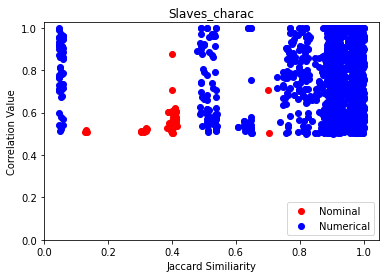

In [283]:
plt.scatter(prep_nom_10[1], prep_nom_10[0], c="red", label = "Nominal")
plt.scatter(prep_num_10[1], prep_num_10[0], c="blue", label = "Numerical")
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.xlabel("Jaccard Similiarity")
plt.ylabel("Correlation Value")
plt.legend(loc="lower right")
plt.title("Slaves_charac")
plt.show()

<font size="6">11) Correlation with ship_nation_owners_imp_nom</font>

In [64]:
corr_nom_11 = dython_nom_to_nom_correlation(all_nominal, ship_nation_owners_imp_nom, 0)
corr_nom_11

[('XMIMPFLAG', 'NATINIMP', 0.716072356396437),
 ('NATIONAL', 'NATINIMP', 0.8723195829776846),
 ('TONTYPE', 'NATINIMP', 0.5703875291464373),
 ('RIG', 'NATINIMP', 0.4300473632051368),
 ('YRCONS', 'NATINIMP', 0.2207166073857379),
 ('PLACCONS', 'NATINIMP', 0.28048339429570235),
 ('CONSTREG', 'NATINIMP', 0.26732579792169864),
 ('YRREG', 'NATINIMP', 0.21704936934602323),
 ('PLACREG', 'NATINIMP', 0.3921335342220888),
 ('REGISREG', 'NATINIMP', 0.38930797389752686),
 ('OWNERA', 'NATINIMP', 0.535684653683274),
 ('OWNERB', 'NATINIMP', 0.2832224223108511),
 ('OWNERC', 'NATINIMP', 0.08828124365851742),
 ('OWNERD', 'NATINIMP', 0.0),
 ('OWNERE', 'NATINIMP', 0.0),
 ('OWNERF', 'NATINIMP', 0.0),
 ('OWNERG', 'NATINIMP', 0.0),
 ('OWNERH', 'NATINIMP', 0.0),
 ('OWNERI', 'NATINIMP', 0.0),
 ('OWNERJ', 'NATINIMP', 0.0),
 ('OWNERK', 'NATINIMP', 0.01026385681458898),
 ('OWNERL', 'NATINIMP', 0.008290698270525438),
 ('OWNERM', 'NATINIMP', 0.010499881995530123),
 ('OWNERN', 'NATINIMP', 0.025908854122585867),
 ('OWN

In [65]:
corr_num_11 = dython_nom_to_num_correlation(ship_nation_owners_imp_nom, all_numerical, 0)
corr_num_11

[('NATINIMP', 'TONNAGE', 0.5047945317341133),
 ('NATINIMP', 'GUNS', 0.3657803165129258),
 ('NATINIMP', 'NPPRETRA', 0.14723874966287312),
 ('NATINIMP', 'NPPRIOR', 0.27319995454215984),
 ('NATINIMP', 'VOYAGE', 0.250301325626733),
 ('NATINIMP', 'VOY1IMP', 0.319065427864247),
 ('NATINIMP', 'VOY2IMP', 0.3097755274901444),
 ('NATINIMP', 'CREW1', 0.45208560577671436),
 ('NATINIMP', 'CREW2', 0.07539641421742457),
 ('NATINIMP', 'CREW3', 0.27684343735063477),
 ('NATINIMP', 'CREW4', 0.2600092640065479),
 ('NATINIMP', 'CREW5', 0.10040896938707651),
 ('NATINIMP', 'CREW', 0.030976116032961926),
 ('NATINIMP', 'SAILD1', 0.13159573413293763),
 ('NATINIMP', 'SAILD2', 0.3935029988404647),
 ('NATINIMP', 'SAILD3', 0.3374752499344153),
 ('NATINIMP', 'SAILD4', 0.30736672307274215),
 ('NATINIMP', 'SAILD5', 0.22996841401452608),
 ('NATINIMP', 'CREWDIED', 0.3586313930576996),
 ('NATINIMP', 'NDESERT', 0.19192961096331934),
 ('NATINIMP', 'SLINTEND', 0.4875148502325803),
 ('NATINIMP', 'SLINTEN2', 0.050640525975700

In [66]:
prep_nom_11 = prep_jac_to_corr_plot(corr_nom_11)

In [67]:
prep_num_11 = prep_jac_to_corr_plot(corr_num_11)

In [348]:
prep_nom_11

([0.716072356396437,
  0.8723195829776846,
  0.5703875291464373,
  0.535684653683274,
  0.7310830939106389,
  0.6055717187354114,
  0.5794875941058032,
  0.7376344767537173,
  0.6039197149905577,
  0.742238674466848,
  0.6473654654937095,
  0.622147296341111],
 [0.006544502617801047,
  0.22592786199686357,
  0.08911338962605549,
  0.12484766418415708,
  0.16585863740750192,
  0.09120888657467674,
  0.09101162588929378,
  0.19006788138620936,
  0.09106663200762499,
  0.19003393463118415,
  0.09038688967731036,
  0.09037162162162163])

In [349]:
prep_num_11

([0.5047945317341133, 0.5105915490942159],
 [0.07898728880054402, 0.0752988047808765])

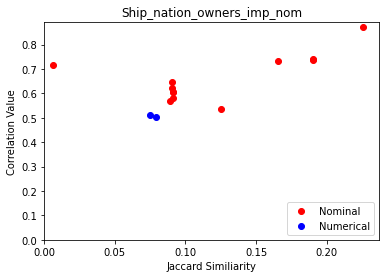

In [ ]:
plt.scatter(prep_nom_11[1], prep_nom_11[0], c="red", label = "Nominal")
plt.scatter(prep_num_11[1], prep_num_11[0], c="blue", label = "Numerical")
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.xlabel("Jaccard Similiarity")
plt.ylabel("Correlation Value")
plt.legend(loc="lower right")
plt.title("Ship_nation_owners_imp_nom")
plt.show()

<font size="6">12) Correlation with ship_nation_owners_imp_num</font>

In [68]:
corr_nom_12 = dython_nom_to_num_correlation(all_nominal, ship_nation_owners_imp_num, 0)
corr_nom_12

[('XMIMPFLAG', 'TONMOD', 0.6610164014886659),
 ('NATIONAL', 'TONMOD', 0.556674837801944),
 ('TONTYPE', 'TONMOD', 0.7772682198269155),
 ('RIG', 'TONMOD', 0.5582758604973209),
 ('YRCONS', 'TONMOD', 0.4246542254012359),
 ('PLACCONS', 'TONMOD', 0.5256157107768836),
 ('CONSTREG', 'TONMOD', 0.5044494162610498),
 ('YRREG', 'TONMOD', 0.3186155055798127),
 ('PLACREG', 'TONMOD', 0.36279701256880365),
 ('REGISREG', 'TONMOD', 0.3507507130801484),
 ('OWNERA', 'TONMOD', 0.7597426173536951),
 ('OWNERB', 'TONMOD', 0.4936230279931635),
 ('OWNERC', 'TONMOD', 0.3536199289535731),
 ('OWNERD', 'TONMOD', 0.2774353328230086),
 ('OWNERE', 'TONMOD', 0.22886578849463404),
 ('OWNERF', 'TONMOD', 0.1899268105246763),
 ('OWNERG', 'TONMOD', 0.14945781256141774),
 ('OWNERH', 'TONMOD', 0.1127948011926619),
 ('OWNERI', 'TONMOD', 0.08204723924221757),
 ('OWNERJ', 'TONMOD', 0.061425970099284466),
 ('OWNERK', 'TONMOD', 0.037394578773553115),
 ('OWNERL', 'TONMOD', 0.02410060370225487),
 ('OWNERM', 'TONMOD', 0.0214669908064

In [69]:
corr_num_12 = dython_num_to_num_correlation(ship_nation_owners_imp_num, all_numerical, 0)
corr_num_12

/Users/jessickmon/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/jessickmon/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


[('TONMOD', 'TONNAGE', 0.8688944100055618),
 ('TONMOD', 'GUNS', 0.46747833784040504),
 ('TONMOD', 'NPPRETRA', 0.08624253502455864),
 ('TONMOD', 'NPPRIOR', 0.03390907009578839),
 ('TONMOD', 'VOYAGE', 0.2000555646505867),
 ('TONMOD', 'VOY1IMP', 0.01506547410711686),
 ('TONMOD', 'VOY2IMP', 0.13857525052882483),
 ('TONMOD', 'CREW1', 0.679805325412308),
 ('TONMOD', 'CREW2', 0.4970971729595245),
 ('TONMOD', 'CREW3', 0.629592318672039),
 ('TONMOD', 'CREW4', 0.5557363445924077),
 ('TONMOD', 'CREW5', 0.6624144249817941),
 ('TONMOD', 'CREW', 0.7043652227950836),
 ('TONMOD', 'SAILD1', 0.02316407999236251),
 ('TONMOD', 'SAILD2', 0.13965197233375642),
 ('TONMOD', 'SAILD3', 0.16125565799299754),
 ('TONMOD', 'SAILD4', 0.3116400766926019),
 ('TONMOD', 'SAILD5', 0.17488735773218553),
 ('TONMOD', 'CREWDIED', 0.2655798428378466),
 ('TONMOD', 'NDESERT', 0.1956786559882296),
 ('TONMOD', 'SLINTEND', 0.7241271677936757),
 ('TONMOD', 'SLINTEN2', 0.5847974854286974),
 ('TONMOD', 'NCAR13', 0.4372813314535994),


In [70]:
prep_nom_12 = prep_jac_to_corr_plot(corr_nom_12)


In [71]:
prep_num_12 = prep_jac_to_corr_plot(corr_num_12)

In [344]:
prep_nom_12

([0.6610164014886659,
  0.556674837801944,
  0.7772682198269155,
  0.5582758604973209,
  0.5256157107768836,
  0.5044494162610498,
  0.7597426173536951,
  0.6086759588122349,
  0.5188588420440532,
  0.5159276605127552,
  0.5674957874961643,
  0.5060742670263524,
  0.5168911154167264,
  0.5240776834254733,
  0.5105915490942159,
  0.6099298086637761,
  0.5480326407448176,
  0.515432762306716],
 [0.0038564376799670916,
  0.4074110095312196,
  0.9020250440226961,
  0.263471389429377,
  0.712241653418124,
  0.7100824863750184,
  0.4722778309687527,
  0.28927156205665083,
  0.3267123897746504,
  0.6381802876697288,
  0.1962326536746656,
  0.19634268537074148,
  0.3271593944790739,
  0.6288911044643847,
  0.0752988047808765,
  0.19628275136516207,
  0.09837587006960556,
  0.09837130527585727])

In [345]:
prep_num_12

([0.8688944100055618,
  0.679805325412308,
  0.629592318672039,
  0.5557363445924077,
  0.6624144249817941,
  0.7043652227950836,
  0.7241271677936757,
  0.5847974854286974,
  0.521207321554353,
  0.6394281254063995,
  0.5628586630488132,
  0.6751307765788701,
  0.6199493631219055,
  0.5218260576310931,
  0.5248312957414643,
  0.7048639013243431,
  0.5383953262313055,
  0.5907696840453036,
  0.5697147483083954,
  0.5803381743352752,
  1.0,
  1.0,
  0.5168846264170578,
  0.5841852563719714,
  0.5866205868588039,
  0.5921757607012792,
  0.5471439538570089,
  0.5188293526769107,
  0.5135609335887648,
  0.5545655954965836,
  0.5557907420133921,
  0.5694035282820011,
  0.5273342392998338,
  0.5189781373180424,
  0.5811534198327168,
  0.5422372309969707,
  0.5032106225754509,
  0.540620732437704,
  0.626461729674214],
 [0.9502679859822717,
  0.6951301660260728,
  0.5659861143798541,
  0.5604983235056076,
  0.541547997989613,
  0.5379411683162827,
  0.5977929480381761,
  0.5379537953795379,
 

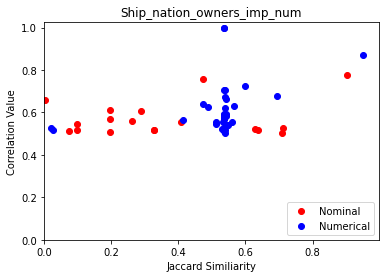

In [ ]:
plt.scatter(prep_nom_12[1], prep_nom_12[0], c="red", label = "Nominal")
plt.scatter(prep_num_12[1], prep_num_12[0], c="blue", label = "Numerical")
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.xlabel("Jaccard Similiarity")
plt.ylabel("Correlation Value")
plt.legend(loc="lower right")
plt.title("Ship_nation_owners_imp_num")
plt.show()

<font size="6">13) Correlation with itinerary_imp</font>

In [72]:
corr_nom_13 = dython_nom_to_nom_correlation(all_nominal, itinerary_imp, 0)
corr_nom_13

[('XMIMPFLAG', 'PTDEPIMP', 0.22596771670831384),
 ('XMIMPFLAG', 'MJBYPTIMP', 0.2148365543502372),
 ('XMIMPFLAG', 'MAJBYIMP', 0.5178345784500198),
 ('XMIMPFLAG', 'MAJBYIMP1', 0.268250383351046),
 ('XMIMPFLAG', 'MJSLPTIMP', 0.2163119927172416),
 ('XMIMPFLAG', 'MJSELIMP', 0.2635193769827995),
 ('XMIMPFLAG', 'MJSELIMP1', 0.48332294884320154),
 ('XMIMPFLAG', 'DEPTREGIMP', 0.2738825033308325),
 ('XMIMPFLAG', 'DEPTREGIMP1', 0.5165747964178908),
 ('NATIONAL', 'PTDEPIMP', 0.5611424638849366),
 ('NATIONAL', 'MJBYPTIMP', 0.2756774857080004),
 ('NATIONAL', 'MAJBYIMP', 0.19770248874562407),
 ('NATIONAL', 'MAJBYIMP1', 0.07550685170742301),
 ('NATIONAL', 'MJSLPTIMP', 0.4578913699968039),
 ('NATIONAL', 'MJSELIMP', 0.3691061538520015),
 ('NATIONAL', 'MJSELIMP1', 0.3236708569234503),
 ('NATIONAL', 'DEPTREGIMP', 0.5535429291819116),
 ('NATIONAL', 'DEPTREGIMP1', 0.4562595714113776),
 ('TONTYPE', 'PTDEPIMP', 0.4849035498517856),
 ('TONTYPE', 'MJBYPTIMP', 0.2619894901790526),
 ('TONTYPE', 'MAJBYIMP', 0.2059

In [73]:
corr_num_13 = dython_nom_to_num_correlation(itinerary_imp, all_numerical, 0)
corr_num_13

[('PTDEPIMP', 'TONNAGE', 0.5868260741740206),
 ('PTDEPIMP', 'GUNS', 0.47342981810987356),
 ('PTDEPIMP', 'NPPRETRA', 0.2990603432396564),
 ('PTDEPIMP', 'NPPRIOR', 0.34803451559331766),
 ('PTDEPIMP', 'VOYAGE', 0.3578442589896396),
 ('PTDEPIMP', 'VOY1IMP', 0.42547065394087596),
 ('PTDEPIMP', 'VOY2IMP', 0.4127725430844477),
 ('PTDEPIMP', 'CREW1', 0.6165165278080399),
 ('PTDEPIMP', 'CREW2', 0.12365247051779041),
 ('PTDEPIMP', 'CREW3', 0.4278248495885056),
 ('PTDEPIMP', 'CREW4', 0.4040704830531626),
 ('PTDEPIMP', 'CREW5', 0.27026863698641485),
 ('PTDEPIMP', 'CREW', 0.0905846809859942),
 ('PTDEPIMP', 'SAILD1', 0.17682204501038257),
 ('PTDEPIMP', 'SAILD2', 0.46054145671127705),
 ('PTDEPIMP', 'SAILD3', 0.4048962331892901),
 ('PTDEPIMP', 'SAILD4', 0.3869771054286795),
 ('PTDEPIMP', 'SAILD5', 0.29270536853020224),
 ('PTDEPIMP', 'CREWDIED', 0.5032963058692375),
 ('PTDEPIMP', 'NDESERT', 0.32516408083563103),
 ('PTDEPIMP', 'SLINTEND', 0.6579579876733898),
 ('PTDEPIMP', 'SLINTEN2', 0.1161605505976254

In [74]:
prep_nom_13 = prep_jac_to_corr_plot(corr_nom_13)


In [75]:
prep_num_13 = prep_jac_to_corr_plot(corr_num_13)

In [340]:
prep_nom_13

([0.5178345784500198,
  0.5165747964178908,
  0.5611424638849366,
  0.5535429291819116,
  0.5979015884052342,
  0.6753309565962946,
  0.5393138350193236,
  0.5263104295103558,
  0.50157924722941,
  0.9881689510397749,
  0.974686975392911,
  0.9537123133840485,
  0.6073911313135316,
  0.7659661835767566,
  0.5374121328909378,
  0.7131428897360583,
  0.7666073924367103,
  0.752086502639792,
  0.7786195272958272,
  0.7509356455580591,
  0.8679732638561064,
  0.8510711391232411,
  0.8067948062949499,
  0.8670965393116729,
  0.8599302821994855,
  0.8101338167142118,
  0.995815549831224,
  0.9918578117724282,
  0.9961455095123527,
  0.9034803465551693,
  0.799724110517843,
  0.9169429129804327,
  0.8943665337636131,
  0.8215167943906113,
  0.508975521792477,
  0.5937777928269634,
  0.5666498134157758,
  0.742238674466848,
  0.6473654654937095,
  0.6221472963411109,
  0.7376344767537173,
  0.9976424546659277,
  0.9975319217509094,
  0.9998892058828277,
  0.9960887601610116,
  0.99630897765069

In [341]:
prep_num_13

([0.5868260741740206,
  0.6165165278080399,
  0.5032963058692375,
  0.6579579876733898,
  0.6099298086637761,
  0.5468582566160758,
  0.5517452839366778,
  0.509839392843265,
  0.5150749475561903,
  0.5630993257362167,
  0.5259902579149089,
  0.504168123084879,
  0.5155177360819507,
  0.5076378475953025,
  0.5181962481605941,
  0.507378231738217,
  0.5132870933432186,
  0.5480326407448176,
  0.5247779302982014,
  0.5516047431551098,
  0.5277630531038766,
  0.515432762306716,
  0.516316378459514,
  0.5553327558796988,
  0.5160791794707011,
  0.5439550644100607,
  0.5674957874961643,
  0.5060742670263524],
 [0.2061269607327087,
  0.18198022323133728,
  0.14116940960924915,
  0.1405564692982456,
  0.19628275136516207,
  0.9079930994824612,
  0.7771765863256271,
  0.9079930994824612,
  0.7771765863256271,
  0.09765530577713319,
  0.18490238611713666,
  0.12205298687201058,
  0.23974994368100924,
  0.12916717177839737,
  0.1304201474953334,
  0.13332706649119508,
  0.1320924740538189,
  0.0

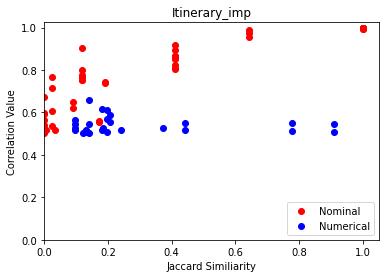

In [295]:
plt.scatter(prep_nom_13[1], prep_nom_13[0], c="red", label = "Nominal")
plt.scatter(prep_num_13[1], prep_num_13[0], c="blue", label = "Numerical")
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.xlabel("Jaccard Similiarity")
plt.ylabel("Correlation Value")
plt.legend(loc="lower right")
plt.title("Itinerary_imp")
plt.show()

<font size="6">14) Correlation with voyage_dates_imp</font>

In [76]:
corr_nom_14 = dython_nom_to_nom_correlation(all_nominal, voyage_dates_imp, 0)
corr_nom_14

[('XMIMPFLAG', 'YEARDEP', 0.26089051861401835),
 ('XMIMPFLAG', 'YEARAF', 0.26300947684193676),
 ('XMIMPFLAG', 'YEARAM', 0.2633584565292278),
 ('NATIONAL', 'YEARDEP', 0.26598585187922685),
 ('NATIONAL', 'YEARAF', 0.26517917698094445),
 ('NATIONAL', 'YEARAM', 0.2659523306123486),
 ('TONTYPE', 'YEARDEP', 0.33249392733280164),
 ('TONTYPE', 'YEARAF', 0.33225257960482607),
 ('TONTYPE', 'YEARAM', 0.3318717018376812),
 ('RIG', 'YEARDEP', 0.193921400625299),
 ('RIG', 'YEARAF', 0.19334125292951737),
 ('RIG', 'YEARAM', 0.19299621282643503),
 ('YRCONS', 'YEARDEP', 0.10867212110583159),
 ('YRCONS', 'YEARAF', 0.10814067903225807),
 ('YRCONS', 'YEARAM', 0.10907866429510084),
 ('PLACCONS', 'YEARDEP', 0.015298150134960187),
 ('PLACCONS', 'YEARAF', 0.016973816419342477),
 ('PLACCONS', 'YEARAM', 0.017984373327086373),
 ('CONSTREG', 'YEARDEP', 0.08245846727057426),
 ('CONSTREG', 'YEARAF', 0.07995129277064382),
 ('CONSTREG', 'YEARAM', 0.08040101928780365),
 ('YRREG', 'YEARDEP', 0.41901208652449),
 ('YRREG'

In [77]:
corr_num_14 = dython_nom_to_num_correlation(voyage_dates_imp, all_numerical, 0)
corr_num_14

[('YEARDEP', 'TONNAGE', 0.41906755106554555),
 ('YEARDEP', 'GUNS', 0.36006507748384786),
 ('YEARDEP', 'NPPRETRA', 0.22497484347797536),
 ('YEARDEP', 'NPPRIOR', 0.29901306359828933),
 ('YEARDEP', 'VOYAGE', 0.27158963321036983),
 ('YEARDEP', 'VOY1IMP', 0.33519680673246116),
 ('YEARDEP', 'VOY2IMP', 0.2296571374825443),
 ('YEARDEP', 'CREW1', 0.32362701740088473),
 ('YEARDEP', 'CREW2', 0.2315443773655577),
 ('YEARDEP', 'CREW3', 0.2815605538505629),
 ('YEARDEP', 'CREW4', 0.31489212290546614),
 ('YEARDEP', 'CREW5', 0.165329591911613),
 ('YEARDEP', 'CREW', 0.15419239271913254),
 ('YEARDEP', 'SAILD1', 0.09707543856927828),
 ('YEARDEP', 'SAILD2', 0.20262935051538436),
 ('YEARDEP', 'SAILD3', 0.17824179102913745),
 ('YEARDEP', 'SAILD4', 0.18255400867973312),
 ('YEARDEP', 'SAILD5', 0.15210083584796763),
 ('YEARDEP', 'CREWDIED', 0.2803171391147782),
 ('YEARDEP', 'NDESERT', 0.2961822033609251),
 ('YEARDEP', 'SLINTEND', 0.40885288482685794),
 ('YEARDEP', 'SLINTEN2', 0.19335149223986015),
 ('YEARDEP', 

In [78]:
prep_nom_14 = prep_jac_to_corr_plot(corr_nom_14)

In [79]:
prep_num_14 = prep_jac_to_corr_plot(corr_num_14)

In [336]:
prep_nom_14

([0.8244498629802333,
  0.6341637971863681,
  0.6085086632923774,
  0.5621672902908547,
  0.5115802809867402,
  0.6161540682839819,
  0.7447972781182722,
  0.8032998366707745,
  0.9527632921058895,
  0.984721988799752,
  0.9963441888733746,
  0.9726140997951708,
  0.989708857129108,
  0.9958468870261358,
  0.9842116404410839,
  0.9919748567032348,
  0.9955571379413326,
  0.9862377384198479,
  0.9914720430006618,
  0.995405465511972,
  0.8159638609028813,
  0.7832010444732583,
  0.9435387683351478],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0])

In [337]:
prep_num_14

([], [])

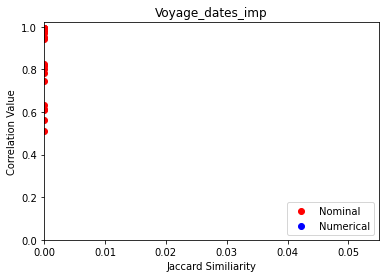

In [299]:
plt.scatter(prep_nom_14[1], prep_nom_14[0], c="red", label = "Nominal")
plt.scatter(prep_num_14[1], prep_num_14[0], c="blue", label = "Numerical")
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.xlabel("Jaccard Similiarity")
plt.ylabel("Correlation Value")
plt.legend(loc="lower right")
plt.title("Voyage_dates_imp")
plt.show()

<font size="6">15) Correlation with slaves_numbers_imp</font>

In [80]:
corr_nom_15 = dython_nom_to_num_correlation(all_nominal, slaves_numbers_imp, 0)
corr_nom_15

[('XMIMPFLAG', 'SLAXIMP', 0.6040695463874205),
 ('XMIMPFLAG', 'SLAMIMP', 0.604097065139474),
 ('NATIONAL', 'SLAXIMP', 0.26532217184438245),
 ('NATIONAL', 'SLAMIMP', 0.283526316826198),
 ('TONTYPE', 'SLAXIMP', 0.22151982821897223),
 ('TONTYPE', 'SLAMIMP', 0.22813727626299035),
 ('RIG', 'SLAXIMP', 0.42519564535577425),
 ('RIG', 'SLAMIMP', 0.42229188462198597),
 ('YRCONS', 'SLAXIMP', 0.13267488455392498),
 ('YRCONS', 'SLAMIMP', 0.1314452364084891),
 ('PLACCONS', 'SLAXIMP', 0.17857694451607464),
 ('PLACCONS', 'SLAMIMP', 0.17830946740777578),
 ('CONSTREG', 'SLAXIMP', 0.1342388855853975),
 ('CONSTREG', 'SLAMIMP', 0.13678971661521652),
 ('YRREG', 'SLAXIMP', 0.1255088975613124),
 ('YRREG', 'SLAMIMP', 0.13132018616144017),
 ('PLACREG', 'SLAXIMP', 0.2416338421454694),
 ('PLACREG', 'SLAMIMP', 0.23903175592616913),
 ('REGISREG', 'SLAXIMP', 0.23217920238721435),
 ('REGISREG', 'SLAMIMP', 0.23049929380791903),
 ('OWNERA', 'SLAXIMP', 0.5515830780879796),
 ('OWNERA', 'SLAMIMP', 0.5584156467118704),
 ('

In [81]:
corr_num_15 = dython_num_to_num_correlation(slaves_numbers_imp, all_numerical, 0)
corr_num_15

/Users/jessickmon/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/jessickmon/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


[('SLAXIMP', 'TONNAGE', 0.49882747201808325),
 ('SLAXIMP', 'GUNS', 0.423898465721041),
 ('SLAXIMP', 'NPPRETRA', 0.04464189707172349),
 ('SLAXIMP', 'VOY1IMP', 0.029619637103804483),
 ('SLAXIMP', 'CREW1', 0.4520971390776492),
 ('SLAXIMP', 'CREW2', 0.47274047662430324),
 ('SLAXIMP', 'CREW3', 0.49761219691120573),
 ('SLAXIMP', 'CREW4', 0.5249370716020584),
 ('SLAXIMP', 'CREW5', 0.4458516933673849),
 ('SLAXIMP', 'SAILD2', 0.09420259174727237),
 ('SLAXIMP', 'SAILD3', 0.13807257150752023),
 ('SLAXIMP', 'SAILD4', 0.14469856483188956),
 ('SLAXIMP', 'SAILD5', 0.10830406869292913),
 ('SLAXIMP', 'CREWDIED', 0.158537118717911),
 ('SLAXIMP', 'NDESERT', 0.13199381486972964),
 ('SLAXIMP', 'SLINTEND', 0.5955177551012403),
 ('SLAXIMP', 'SLINTEN2', 0.6273568109705421),
 ('SLAXIMP', 'NCAR13', 0.7441102027865489),
 ('SLAXIMP', 'NCAR15', 0.1176156354392097),
 ('SLAXIMP', 'NCAR17', 0.04670815991578094),
 ('SLAXIMP', 'TSLAVESP', 0.9409338604659155),
 ('SLAXIMP', 'TSLAVESD', 0.9930278703560053),
 ('SLAXIMP', '

In [82]:
prep_nom_15 = prep_jac_to_corr_plot(corr_nom_15)

In [83]:
prep_num_15 = prep_jac_to_corr_plot(corr_num_15)

In [332]:
prep_nom_15

([0.6040695463874205,
  0.604097065139474,
  0.5515830780879796,
  0.5584156467118704,
  0.5468582566160758,
  0.5517452839366778,
  0.509839392843265,
  0.5150749475561903,
  0.5247779302982014,
  0.5516047431551098,
  0.516316378459514],
 [0.03795966785290629,
  0.03387259858442872,
  0.05520141946507196,
  0.06202506981879587,
  0.9079930994824612,
  0.7771765863256271,
  0.9079930994824612,
  0.7771765863256271,
  0.37427173153111165,
  0.44100535257156154,
  0.44090274546300606])

In [333]:
prep_num_15

([0.5249370716020584,
  0.5955177551012403,
  0.6273568109705421,
  0.7441102027865489,
  0.9409338604659155,
  0.9930278703560053,
  0.9494519541871588,
  0.6832144815133584,
  0.7788265971378568,
  0.7042108644590938,
  0.9116068738661216,
  0.91829413401935,
  0.7658801976913786,
  0.540037462580342,
  0.8140885973845324,
  0.7228005570618372,
  0.5367561157971519,
  0.898591410801268,
  0.868888571839448,
  0.7625576691994118,
  0.7285609832729099,
  0.7029954530020066,
  0.5967059014718518,
  0.7123532190806415,
  1.0,
  0.9573134489886603,
  0.9907329221682948,
  0.919861803998757,
  0.9516482608794192,
  0.9308555941691876,
  0.9169141675244159,
  0.9182078552996144,
  0.9192547323816034,
  0.8109366242530085,
  0.7128633841021418,
  0.510521448173119,
  0.8618553072582174,
  0.8628585378139632,
  0.7772885309193419,
  0.9119901415175498,
  0.9268991426344767,
  0.916464943136811,
  0.5273342392998339,
  0.9745950933131576,
  0.9114975547636686,
  0.8569723514288824,
  0.5144936

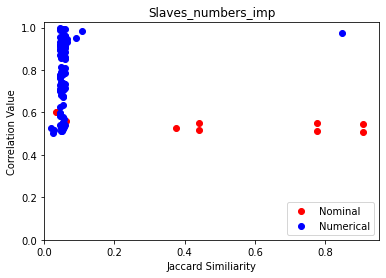

In [303]:
plt.scatter(prep_nom_15[1], prep_nom_15[0], c="red", label = "Nominal")
plt.scatter(prep_num_15[1], prep_num_15[0], c="blue", label = "Numerical")
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.xlabel("Jaccard Similiarity")
plt.ylabel("Correlation Value")
plt.legend(loc="lower right")
plt.title("Slaves_numbers_imp")
plt.show()

<font size="6">16) Correlation with slaves_charac_imputed</font>

In [84]:
corr_nom_16 = dython_nom_to_num_correlation(all_nominal, slaves_charac_imputed, 0)
corr_nom_16

[('XMIMPFLAG', 'ADLT1IMP', 0.31273248784339885),
 ('XMIMPFLAG', 'ADLT2IMP', 0.17451563385852958),
 ('XMIMPFLAG', 'ADLT3IMP', 0.3435806156022714),
 ('XMIMPFLAG', 'CHIL1IMP', 0.21390770299278095),
 ('XMIMPFLAG', 'CHIL2IMP', 0.12234077534983648),
 ('XMIMPFLAG', 'CHIL3IMP', 0.2714329130768553),
 ('XMIMPFLAG', 'MALE1IMP', 0.2768030282679461),
 ('XMIMPFLAG', 'MALE2IMP', 0.1591701645351474),
 ('XMIMPFLAG', 'MALE3IMP', 0.36548214307602417),
 ('XMIMPFLAG', 'FEML1IMP', 0.2811672762164748),
 ('XMIMPFLAG', 'FEML2IMP', 0.09759882448813792),
 ('XMIMPFLAG', 'FEML3IMP', 0.36673770847796217),
 ('XMIMPFLAG', 'TSLMTIMP', 0.4225342125726103),
 ('XMIMPFLAG', 'VYMRTIMP', 0.24758081117667674),
 ('NATIONAL', 'ADLT1IMP', 0.2613431944493398),
 ('NATIONAL', 'ADLT2IMP', 0.13018085932006446),
 ('NATIONAL', 'ADLT3IMP', 0.19652213210439215),
 ('NATIONAL', 'CHIL1IMP', 0.16758633647209786),
 ('NATIONAL', 'CHIL2IMP', 0.11442918361771386),
 ('NATIONAL', 'CHIL3IMP', 0.2153395339142868),
 ('NATIONAL', 'MALE1IMP', 0.192907

In [85]:
corr_num_16 = dython_num_to_num_correlation(slaves_charac_imputed, all_numerical, 0)
corr_num_16

[('ADLT1IMP', 'TONNAGE', 0.5786094825515767),
 ('ADLT1IMP', 'GUNS', 0.5543767674106478),
 ('ADLT1IMP', 'VOYAGE', 0.2028007881891614),
 ('ADLT1IMP', 'VOY1IMP', 0.08064811348037379),
 ('ADLT1IMP', 'VOY2IMP', 0.025366849605514163),
 ('ADLT1IMP', 'CREW1', 0.5154888581050293),
 ('ADLT1IMP', 'CREW2', 0.6760678808155213),
 ('ADLT1IMP', 'CREW3', 0.08293595667917719),
 ('ADLT1IMP', 'CREW4', 0.440570721661477),
 ('ADLT1IMP', 'CREW5', 0.35120096570433706),
 ('ADLT1IMP', 'SAILD3', 0.13121597299209045),
 ('ADLT1IMP', 'SAILD4', 0.15510525467245265),
 ('ADLT1IMP', 'SAILD5', 0.09512560091790634),
 ('ADLT1IMP', 'CREWDIED', 0.10828930724444548),
 ('ADLT1IMP', 'NDESERT', 0.18489306981543357),
 ('ADLT1IMP', 'SLINTEND', 0.8286641168218364),
 ('ADLT1IMP', 'NCAR13', 0.5569534611467747),
 ('ADLT1IMP', 'NCAR15', 0.26009883746498647),
 ('ADLT1IMP', 'NCAR17', 0.25701269750694283),
 ('ADLT1IMP', 'TSLAVESP', 0.8896312147873779),
 ('ADLT1IMP', 'TSLAVESD', 0.9256748482690446),
 ('ADLT1IMP', 'SLAARRIV', 0.88080131726

In [86]:
prep_nom_16 = prep_jac_to_corr_plot(corr_nom_16)


In [87]:
prep_num_16 = prep_jac_to_corr_plot(corr_num_16)

In [328]:
prep_nom_16

([0.542328100700581,
  0.5458961061308132,
  0.5735286312695193,
  0.5042606648242972,
  0.5600987869831398,
  0.6130170403889144,
  0.5193116415077486,
  0.5584334313781082,
  0.561433529473361],
 [0.4056676102854447,
  0.4056676102854447,
  0.41205743921815513,
  0.4038821726545207,
  0.4091477205094632,
  0.4152531482909278,
  0.41497364022116495,
  0.34759034115784865,
  0.3481965446401509])

In [329]:
prep_num_16

([0.5786094825515767,
  0.5543767674106478,
  0.5154888581050293,
  0.6760678808155213,
  0.8286641168218364,
  0.5569534611467747,
  0.8896312147873779,
  0.9256748482690446,
  0.8808013172635432,
  0.7841306924757807,
  0.871055849516494,
  0.8072248559210965,
  0.9999999999999999,
  0.5520189841242458,
  0.5136001085223684,
  0.8664724840058299,
  0.7677330231392442,
  0.9987437469572156,
  0.7002669255155247,
  0.8193338378946323,
  1.0,
  0.7123597218484242,
  0.627422777624391,
  0.5303096854626655,
  0.9386124456145825,
  0.9564395609209376,
  0.9386124456145825,
  0.8711890920185517,
  0.8766760546139342,
  0.8706540798289031,
  0.9177899483262654,
  0.8173898437268952,
  0.9839417416731465,
  0.8591709938916775,
  0.7844470551870224,
  0.914958585732969,
  0.9531717204269952,
  0.913359325117917,
  0.9114975547636686,
  0.9032650292760758,
  0.9214774466345991,
  0.8924685646069133,
  0.5532278293393397,
  0.8241999045736504,
  0.8034760464039027,
  0.7528043663104866,
  0.901

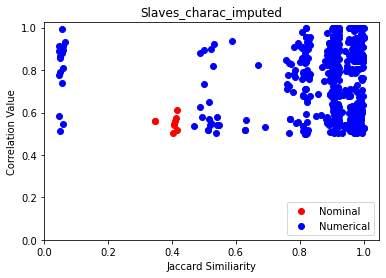

In [309]:
plt.scatter(prep_nom_16[1], prep_nom_16[0], c="red", label = "Nominal")
plt.scatter(prep_num_16[1], prep_num_16[0], c="blue", label = "Numerical")
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.xlabel("Jaccard Similiarity")
plt.ylabel("Correlation Value")
plt.legend(loc="lower right")
plt.title("Slaves_charac_imputed")
plt.show() ####

<font size="6">17) Correlation with tech_var_ship_flag</font>

In [88]:
corr_nom_17 = dython_nom_to_nom_correlation(all_nominal, tech_var_ship_flag, 0)
corr_nom_17

[('NATIONAL', 'XMIMPFLAG', 0.43470275712139594),
 ('TONTYPE', 'XMIMPFLAG', 0.47517811212177413),
 ('RIG', 'XMIMPFLAG', 0.6416745216731229),
 ('YRCONS', 'XMIMPFLAG', 0.12502642800579544),
 ('PLACCONS', 'XMIMPFLAG', 0.14092294975812725),
 ('CONSTREG', 'XMIMPFLAG', 0.16014771258350596),
 ('YRREG', 'XMIMPFLAG', 0.1051490979451164),
 ('PLACREG', 'XMIMPFLAG', 0.13215363603340768),
 ('REGISREG', 'XMIMPFLAG', 0.18856355246282075),
 ('OWNERA', 'XMIMPFLAG', 0.2919175230546325),
 ('OWNERB', 'XMIMPFLAG', 0.1519170573698252),
 ('OWNERC', 'XMIMPFLAG', 0.06114670144760783),
 ('OWNERD', 'XMIMPFLAG', 0.0),
 ('OWNERE', 'XMIMPFLAG', 0.0),
 ('OWNERF', 'XMIMPFLAG', 0.0),
 ('OWNERG', 'XMIMPFLAG', 0.0),
 ('OWNERH', 'XMIMPFLAG', 0.0),
 ('OWNERI', 'XMIMPFLAG', 0.0),
 ('OWNERJ', 'XMIMPFLAG', 0.0),
 ('OWNERK', 'XMIMPFLAG', 0.0),
 ('OWNERL', 'XMIMPFLAG', 0.0),
 ('OWNERM', 'XMIMPFLAG', 0.0),
 ('OWNERN', 'XMIMPFLAG', 0.09071176800676654),
 ('OWNERO', 'XMIMPFLAG', 0.07499564978571267),
 ('OWNERP', 'XMIMPFLAG', 0.074

In [89]:
corr_num_17 = dython_nom_to_num_correlation(tech_var_ship_flag, all_numerical, 0)
corr_num_17

[('XMIMPFLAG', 'TONNAGE', 0.6363795332750406),
 ('XMIMPFLAG', 'GUNS', 0.49709459993787874),
 ('XMIMPFLAG', 'NPPRETRA', 0.4644206323105426),
 ('XMIMPFLAG', 'NPPRIOR', 0.3597781659320662),
 ('XMIMPFLAG', 'VOYAGE', 0.3868267644314085),
 ('XMIMPFLAG', 'VOY1IMP', 0.43234094269472256),
 ('XMIMPFLAG', 'VOY2IMP', 0.42021651596499277),
 ('XMIMPFLAG', 'CREW1', 0.5785877462683561),
 ('XMIMPFLAG', 'CREW2', 0.19426885363419594),
 ('XMIMPFLAG', 'CREW3', 0.3744431220186235),
 ('XMIMPFLAG', 'CREW4', 0.4009449681907717),
 ('XMIMPFLAG', 'CREW5', 0.22804489210140158),
 ('XMIMPFLAG', 'CREW', 0.10576870037861531),
 ('XMIMPFLAG', 'SAILD1', 0.14603035842207365),
 ('XMIMPFLAG', 'SAILD2', 0.39190136563057437),
 ('XMIMPFLAG', 'SAILD3', 0.3875003569985809),
 ('XMIMPFLAG', 'SAILD4', 0.31336521085788077),
 ('XMIMPFLAG', 'SAILD5', 0.2556868521803894),
 ('XMIMPFLAG', 'CREWDIED', 0.4494384447073899),
 ('XMIMPFLAG', 'NDESERT', 0.4022270601435018),
 ('XMIMPFLAG', 'SLINTEND', 0.6714789125738925),
 ('XMIMPFLAG', 'SLINTEN

In [90]:
prep_nom_17 = prep_jac_to_corr_plot(corr_nom_17)

In [91]:
prep_num_17 = prep_jac_to_corr_plot(corr_num_17)

In [326]:
prep_nom_17

([0.6416745216731229,
  0.5165747964178908,
  0.7218492912296982,
  0.8358447998873191,
  0.716072356396437,
  0.5178345784500198],
 [0.0024796032634778436,
  0.006352683461117196,
  0.0,
  0.0,
  0.006544502617801047,
  0.03495702005730659])

In [327]:
prep_num_17

([0.6363795332750406,
  0.5785877462683561,
  0.6714789125738925,
  0.6610164014886659,
  0.6040695463874205,
  0.604097065139474],
 [0.0038948393378773127,
  0.003630926954293037,
  0.0033990011098779136,
  0.0038564376799670916,
  0.03795966785290629,
  0.03387259858442872])

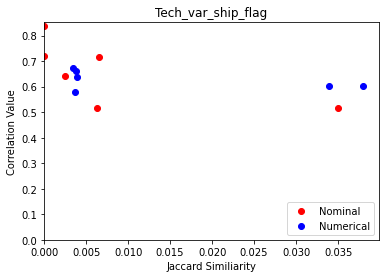

In [321]:
plt.scatter(prep_nom_17[1], prep_nom_17[0], c="red", label = "Nominal")
plt.scatter(prep_num_17[1], prep_num_17[0], c="blue", label = "Numerical")
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.xlabel("Jaccard Similiarity")
plt.ylabel("Correlation Value")
plt.legend(loc="lower right")
plt.title("Tech_var_ship_flag")
plt.show()

<font size="6">Plot for the percent missing count of the dataframe and jaccard/correlation </font>

In [278]:
def calc_percent_missing(category):
    """
    Calculates the percent missing and prepares it for plotting in a graph
    """
    missing = {}
    for v in category:
        missing[v] = df[v].isna().sum() / df.shape[0]

    return missing 

In [279]:
plot_1 = calc_percent_missing(ship_nation_owners)
sorted_tuples_1 = sorted(plot_1.items(), key=lambda item: item[1], reverse = True)
sorted_plot_1 = {k: v for k, v in sorted_tuples_1}

In [280]:
plot_2 = calc_percent_missing(voyage_outcome)
sorted_tuples_2 = sorted(plot_2.items(), key=lambda item: item[1], reverse = True)
sorted_plot_2 = {k: v for k, v in sorted_tuples_2}

In [281]:
plot_3 = calc_percent_missing(itinerary)
sorted_tuples_3 = sorted(plot_3.items(), key=lambda item: item[1], reverse = True)
sorted_plot_3 = {k: v for k, v in sorted_tuples_3}

In [282]:
plot_4 = calc_percent_missing(voyage_dates)
sorted_tuples_4 = sorted(plot_4.items(), key=lambda item: item[1], reverse = True)
sorted_plot_4 = {k: v for k, v in sorted_tuples_4}

In [283]:
plot_5 = calc_percent_missing(captain_and_crew)
sorted_tuples_5 = sorted(plot_5.items(), key=lambda item: item[1], reverse = True)
sorted_plot_5 = {k: v for k, v in sorted_tuples_5}

In [284]:
plot_6 = calc_percent_missing(slaves_numbers)
sorted_tuples_6 = sorted(plot_6.items(), key=lambda item: item[1], reverse = True)
sorted_plot_6 = {k: v for k, v in sorted_tuples_6}

In [285]:
slaves_charac_first = {"MEN1": "Men embarked at first port of purchase",
"WOMEN1": "Women embarked at first port of purchase",
"BOY1": "Boys embarked at first port of purchase",
"GIRL1": "Girls embarked at first port of purchase",
"ADULT1": "Adults embarked at first port of purchase",
"CHILD1": "Children embarked at first port of purchase",
"INFANT1": "Infants embarked at first port of purchase",
"MALE1": "Males embarked at first port of purchase",
"FEMALE1": "Females embarked at first port of purchase",
"MEN2": "Men who died on Middle Passage",
"WOMEN2": "Women who died on Middle Passage",
"BOY2": "Boys who died on Middle Passage",
"GIRL2": "Girls who died on Middle Passage",
"ADULT2": "Adults who died on Middle Passage",
"CHILD2": "Children who died on Middle Passage",
"MALE2": "Males who died on Middle Passage",
"FEMALE2": "Females who died on Middle Passage",
"MEN3": "Men disembarked at first place of landing",
"WOMEN3": "Women disembarked at first place of landing",
"BOY3": "Boys disembarked at first place of landing",
"GIRL3": "Girls disembarked at first place of landing",
"ADULT3": "Adults disembarked at first place of landing",
"CHILD3": "Children disembarked at first place of landing",
"INFANT3": "Infants disembarked at first place of landing",
"MALE3": "Males disembarked at first place of landing",
"FEMALE3": "Females disembarked at first place of landing",
"MEN4": "Men embarked at second port of purchase",
"WOMEN4": "Women embarked at second port of purchase",
"BOY4": "Boys embarked at second port of purchase",
"GIRL4": "Girl embarked at second port of purchase",
"ADULT4": "Adults embarked at second port of purchase",
"CHILD4": "Children embarked at second port of purchase",
"INFANT4": "Infants embarked at second port of purchase",
"MALE4": "Males embarked at second port of purchase",
"FEMALE4": "Females embarked second port of purchase",
"MEN5": "Men embarked at third port of purchase",
"WOMEN5": "Women embarked at third port of purchase",
"BOY5": "Boys embarked at third port of purchase",
"GIRL5": "Girls embarked at third port of purchase",
"ADULT5": "Adults embarked at third port of purchase",
"CHILD5": "Children embarked at third port of purchase",
"MALE5": "Males embarked at third port of purchase",
"FEMALE5": "Females embarked at third port of purchase"}

slaves_charac_second = {"MEN6": "Men disembarked at second place of landing",
"WOMEN6": "Women disembarked at second place of landing",
"BOY6": "Boys disembarked at second place of landing",
"GIRL6": "Girls disembarked at second place of landing",
"ADULT6": "Adults disembarked at second place of landing",
"CHILD6": "Children disembarked at second place of landing",
"MALE6": "Males disembarked at second place of landing",
"FEMALE6": "Females disembarked at second place of landing",
"SLADAFRI": "Slaves deaths before leaving Africa",
"SLADVOY": "Slaves deaths between African and the Americas",
"SLADAMER": "Slaves deaths between arrival and sale",
# "ADLT1IMP": "Derived number of adult embarked",
# "CHIL1IMP": "Derived number of children embarked",
# "MALE1IMP": "Derived number of males embarked",
# "FEML1IMP": "Derived number of females embarked",
"SLAVMAX1": "Total slaves embarked with age and gender identified",
"SLAVEMA1": "Total slaves embarked with age identified",
"SLAVEMX1": "Total slaves embarked with gender identified",
"MENRAT1": "Percentage of men among embarked slaves",
"WOMRAT1": "Percentage of women among embarked slaves",
"BOYRAT1": "Percentage of boys among embarked slaves",
"GIRLRAT1": "Percentage of girls among embarked slaves",
"CHILRAT1": "Child ratio among embarked slaves",
"MALRAT1": "Male ratio among embarked slaves",
# "ADLT2IMP": "Derived number of adults who died on Middle Passage",
# "CHIL2IMP": "Derived number of children who died on Middle Passage",
# "MALE2IMP": "Derived number of males who died on Middle Passage",
# "FEML2IMP": "Derived number of females who died on Middle Passage",
# "ADLT3IMP": "Derived number of adults landed",
# "CHIL3IMP": "Derived number of children landed",
# "MALE3IMP": "Derived number of males landed",
# "FEML3IMP": "Derived number of females landed",
"SLAVMAX3": "Total slaves identified by age and gender among landed slaves",
"SLAVEMA3": "Total slaves identified by age among landed slaves",
"SLAVEMX3": "Total slaves identified by gender among landed slaves",
"MENRAT3": "Percentage of men among landed slaves",
"WOMRAT3": "Percentage of women among landed slaves",
"BOYRAT3": "Percentage of boys among landed slaves",
"GIRLRAT3": "Percentage of girls among landed slaves",
"CHILRAT3": "Child ratio among landed slaves",
"MALRAT3": "Male ratio among landed slaves",
"MEN7": "Derived number of men at departure or arrival",
"WOMEN7": "Derived number of women at departure or arrival",
"BOY7": "Derived number of boys at departure or arrival",
"GIRL7": "Derived number of girls at departure or arrival",
"ADULT7": "Derived number of adults at departure or arrival",
"CHILD7": "Derived number of children at departure or arrival",
"MALE7": "Derived number of males at departure or arrival",
"FEMALE7": "Derived number of females at departure or arrival",
"SLAVMAX7": "Total slaves identified by age and gender at departure or arrival",
"SLAVEMA7": "Total slaves identified by age at departure or arrival",
"SLAVEMX7": "Total slaves identified by gender at departure or arrival",
"MENRAT7": "Percentage of men at departure or arrival",
"WOMRAT7": "Percentage of women at departure or arrival",
"BOYRAT7": "Percentage of boys at departure or arrival",
"GIRLRAT7": "Percentage of girls at departure or arrival",
"CHILRAT7": "Child ratio at departure or arrival",
"MALRAT7": "Male ratio at departure or arrival",
# "TSLMTIMP": "Derived number of slaves embarked for mortality calculation",
# "VYMRTIMP": "Derived slave deaths during Middle Passage",
"VYMRTRAT": "Slave mortality rate (slave deaths / slaves embarked)",
"JAMCASPR": "Average price of slaves standardized on sterling cash price of prime slaves sold in Jamaica",
"XMIMPFLAG": "Voyage groupings for estimating imputed slaves"
}


In [286]:
plot_7 = calc_percent_missing(slaves_charac_first)
sorted_tuples_7 = sorted(plot_7.items(), key=lambda item: item[1], reverse = True)
sorted_plot_7 = {k: v for k, v in sorted_tuples_7}

In [287]:
plot_8 = calc_percent_missing(slaves_charac_second)
sorted_tuples_8 = sorted(plot_8.items(), key=lambda item: item[1], reverse = True)
sorted_plot_8 = {k: v for k, v in sorted_tuples_8}

In [335]:
percentages_1 = [val1 for val1 in sorted_plot_1.values()]
percentages_2 = [val2 for val2 in sorted_plot_2.values()]
percentages_3 = [val3 for val3 in sorted_plot_3.values()]
percentages_4 = [val4 for val4 in sorted_plot_4.values()]
percentages_5 = [val5 for val5 in sorted_plot_5.values()]
percentages_6 = [val6 for val6 in sorted_plot_6.values()]
percentages_7 = [val7 for val7 in sorted_plot_7.values()]
percentages_8 = [val8 for val8 in sorted_plot_8.values()]

In [336]:
percentages = percentages_1 + percentages_2 + percentages_3 + percentages_4 + percentages_5 + percentages_6 + percentages_7 + percentages_8

In [801]:
count = 0 
for item in percentages:
    if item >= 0.9: count += 1

count

135

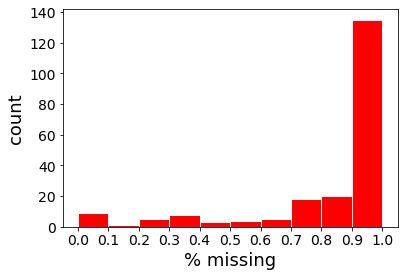

In [410]:
bins = np.arange(0, 1.1, .1)
plt.hist(percentages, bins = bins, color="red", edgecolor = "white")
#plt.title("Count of Percent Missing for Variables")
plt.xlabel("% missing", fontsize=18)
plt.ylabel("count", fontsize=18)
#plt.xlim([1,None])
_ = plt.xticks(bins, fontsize=14)
_ = plt.yticks(fontsize=14)
plt.savefig('percent_missing_count.pdf', bbox_inches = "tight")  

In [764]:
df["RESISTANCE"].isna().sum()

35537

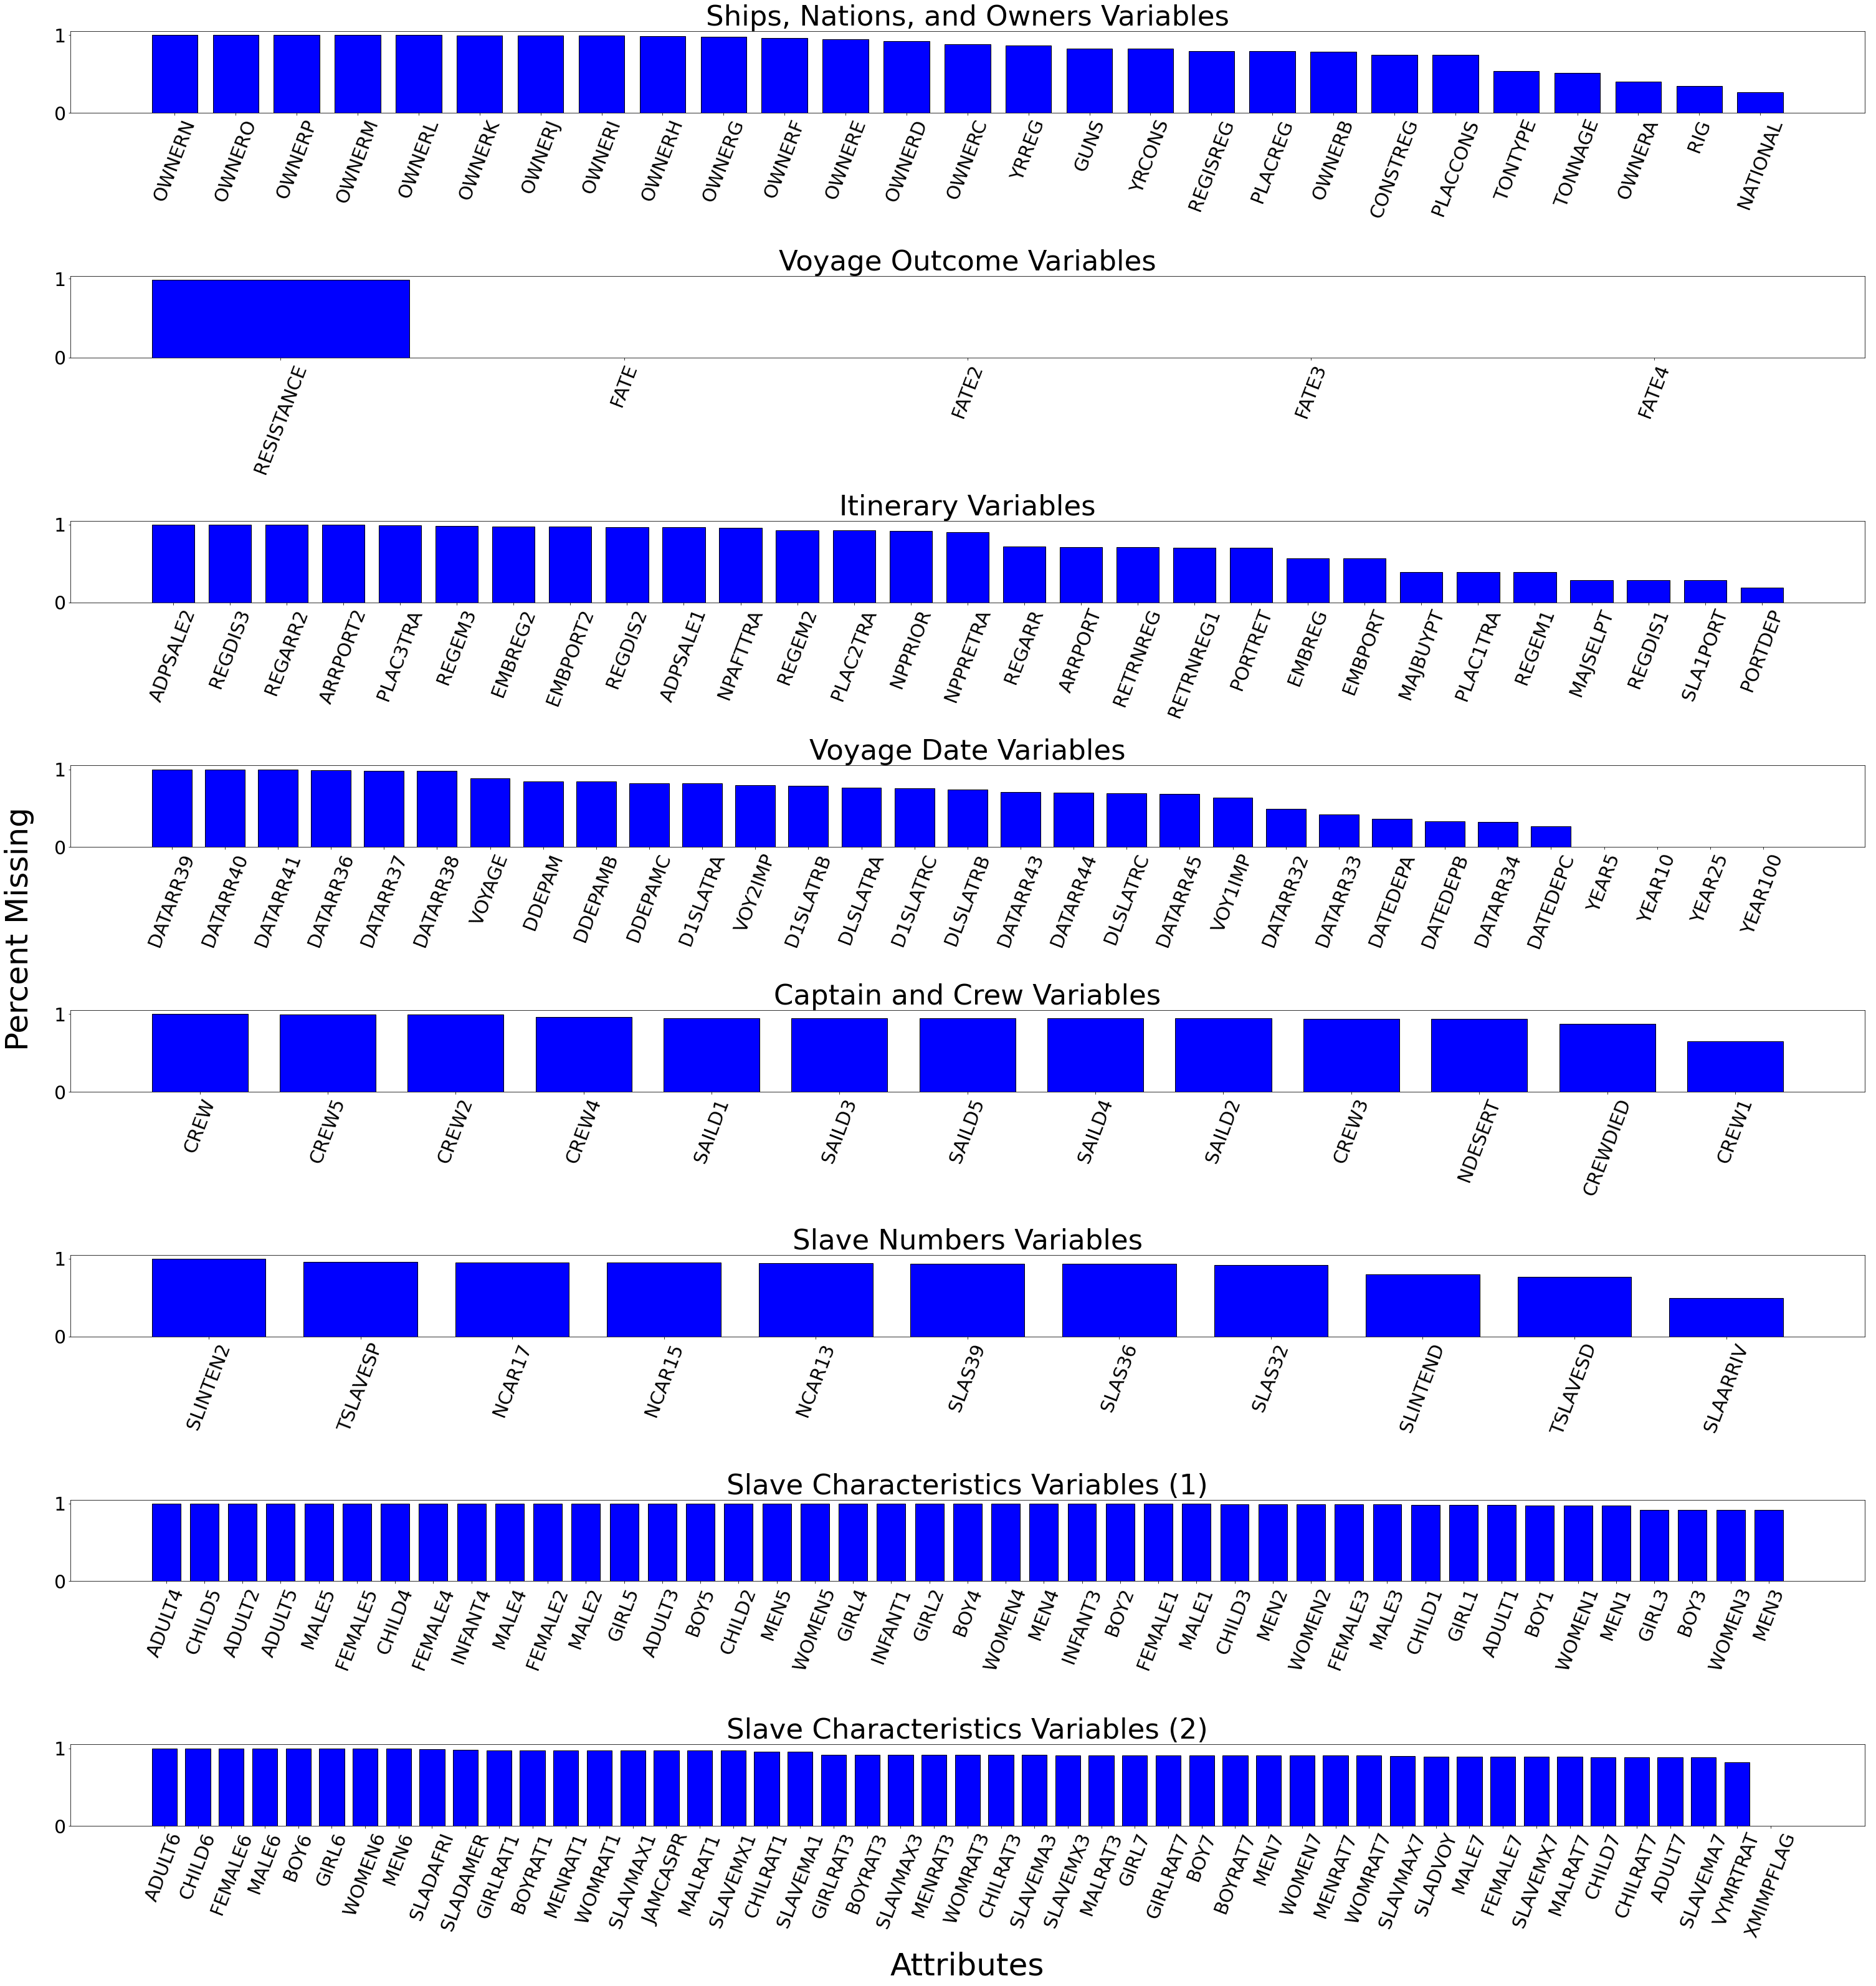

In [331]:
fig = plt.figure(figsize=(30,15))

fig.set_figheight(50)
fig.set_figwidth(50)

plt.subplot(8,1,1)
plt.bar(sorted_plot_1.keys(), sorted_plot_1.values(), width = .75, color='blue', edgecolor='black')
plt.xticks(rotation = 69)
plt.title("Ships, Nations, and Owners Variables", fontsize=45)
plt.tick_params(labelsize=30)

plt.subplot(8,1,2)
plt.bar(sorted_plot_2.keys(), sorted_plot_2.values(), width = .75, color='blue', edgecolor='black')
plt.xticks(rotation = 69)
plt.title("Voyage Outcome Variables", fontsize=45)
plt.tick_params(labelsize=30)

plt.subplot(8,1,3)
plt.bar(sorted_plot_3.keys(), sorted_plot_3.values(), width = .75, color='blue', edgecolor='black')
plt.xticks(rotation = 69)
plt.title("Itinerary Variables", fontsize=45)
plt.tick_params(labelsize=30)

plt.subplot(8,1,4)
plt.bar(sorted_plot_4.keys(), sorted_plot_4.values(), width = .75, color='blue', edgecolor='black')
plt.xticks(rotation = 69)
plt.title("Voyage Date Variables", fontsize=45)
plt.tick_params(labelsize=30)

plt.subplot(8,1,5)
plt.bar(sorted_plot_5.keys(), sorted_plot_5.values(), width = .75, color='blue', edgecolor='black')
plt.xticks(rotation = 69)
plt.title("Captain and Crew Variables", fontsize=45)
plt.tick_params(labelsize=30)

plt.subplot(8,1,6)
plt.bar(sorted_plot_6.keys(), sorted_plot_6.values(), width = .75, color='blue', edgecolor='black')
plt.xticks(rotation = 69)
plt.title("Slave Numbers Variables", fontsize=45)
plt.tick_params(labelsize=30)

plt.subplot(8,1,7)
plt.bar(sorted_plot_7.keys(), sorted_plot_7.values(), width = .75, color='blue', edgecolor='black')
plt.xticks(rotation = 69)
plt.title("Slave Characteristics Variables (1)", fontsize=45)
plt.tick_params(labelsize=30)

plt.subplot(8,1,8)
plt.bar(sorted_plot_8.keys(), sorted_plot_8.values(), width = 0.75, color='blue', edgecolor='black')
plt.xticks(rotation = 69)
plt.title("Slave Characteristics Variables (2)", fontsize=45)
plt.tick_params(labelsize=30)

fig.add_subplot(111, frame_on=False)

plt.tick_params(labelcolor="none", bottom=False, left=False)

plt.xlabel("Attributes")

plt.ylabel("Percent Missing")

axes = plt.gca()

fig.tight_layout(pad=5.0)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=2)

axes.xaxis.label.set_size(50)
axes.xaxis.set_label_coords(.5, -.07)

axes.yaxis.label.set_size(50)
axes.yaxis.set_label_coords(-.02, .5)

axes.margins(1,1)


In [16]:
def percent_correct(lsts):
    """
    """
    count = 0 
    for i in range(len(lsts[0])):
        if lsts[0][i] == lsts[1][i]:
            count += 1

    return count / len(lsts[0])

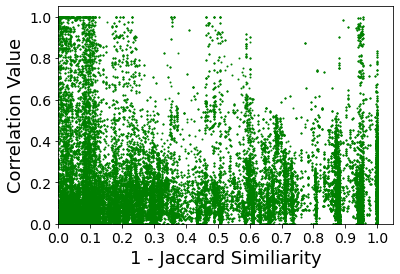

In [409]:
plt.scatter(prep_nom_1[1], prep_nom_1[0], c="green", s = 1)
plt.scatter(prep_nom_1[1], prep_nom_1[0], c="green", s = 1)
plt.scatter(prep_nom_2[1], prep_nom_2[0], c="green", s = 1)
plt.scatter(prep_num_2[1], prep_num_2[0], c="green", s = 1)
plt.scatter(prep_nom_3[1], prep_nom_3[0], c="green", s = 1)
plt.scatter(prep_num_3[1], prep_num_3[0], c="green", s = 1)
plt.scatter(prep_nom_4[1], prep_nom_4[0], c="green", s = 1)
plt.scatter(prep_num_4[1], prep_num_4[0], c="green", s = 1)
plt.scatter(prep_nom_5[1], prep_nom_5[0], c="green", s = 1)
plt.scatter(prep_num_5[1], prep_num_5[0], c="green", s = 1)

plt.scatter(prep_nom_6[1], prep_nom_6[0], c="green", s = 1)
plt.scatter(prep_num_6[1], prep_num_6[0], c="green", s = 1)
plt.scatter(prep_nom_7[1], prep_nom_7[0], c="green", s = 1)
plt.scatter(prep_num_7[1], prep_num_7[0], c="green", s = 1)
plt.scatter(prep_nom_8[1], prep_nom_8[0], c="green", s = 1)
plt.scatter(prep_num_8[1], prep_num_8[0], c="green", s = 1)
plt.scatter(prep_nom_9[1], prep_nom_9[0], c="green", s = 1)
plt.scatter(prep_num_9[1], prep_num_9[0], c="green", s = 1)

plt.scatter(prep_nom_10[1], prep_nom_10[0], c="green", s = 1)
plt.scatter(prep_num_10[1], prep_num_10[0], c="green", s = 1)
plt.scatter(prep_nom_11[1], prep_nom_11[0], c="green", s = 1)
plt.scatter(prep_num_11[1], prep_num_11[0], c="green", s = 1)
plt.scatter(prep_nom_12[1], prep_nom_12[0], c="green", s = 1)
plt.scatter(prep_num_12[1], prep_num_12[0], c="green", s = 1)
plt.scatter(prep_nom_13[1], prep_nom_13[0], c="green", s = 1)
plt.scatter(prep_num_13[1], prep_num_13[0], c="green", s = 1)

plt.scatter(prep_nom_14[1], prep_nom_14[0], c="green", s = 1)
plt.scatter(prep_num_14[1], prep_num_14[0], c="green", s = 1)
plt.scatter(prep_nom_15[1], prep_nom_15[0], c="green", s = 1)
plt.scatter(prep_num_15[1], prep_num_15[0], c="green", s = 1)
plt.scatter(prep_nom_16[1], prep_nom_16[0], c="green", s = 1)
plt.scatter(prep_num_16[1], prep_num_16[0], c="green", s = 1)
plt.scatter(prep_nom_17[1], prep_nom_17[0], c="green", s = 1)
plt.scatter(prep_num_17[1], prep_num_17[0], c="green", s = 1)
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.xlabel("1 - Jaccard Similiarity", fontsize=18)
plt.ylabel("Correlation Value", fontsize=18)
_ = plt.xticks(bins, fontsize=14)
_ = plt.yticks(fontsize=14)
#plt.legend(loc="lower right")
#plt.title("Correlation and Jaccard Similiarity Between Attributes")
#plt.show()
plt.savefig('jacc_corr_plot.pdf', bbox_inches = "tight")  

<font size="6">Preparation for imputation techniques</font>

In [699]:
# (column1, column2, corr_val, jaccard_sim)
preferred_jac_corr = find_preferred_jac_corr(0.25, corr_num_9)

In [700]:
preferred_jac_corr

[('SLINTEND', 'TONNAGE', 0.6038807658219575, 0.4293454775122162),
 ('SLINTEND', 'CREW1', 0.7093699521120225, 0.3447936820070412),
 ('SLINTEND', 'TSLAVESD', 0.8251241786977412, 0.37493183318504064),
 ('SLINTEND', 'SLAARRIV', 0.8100717408487588, 0.5205122501509423),
 ('SLINTEND', 'MEN7', 0.6690531062582273, 0.25229657859560306),
 ('SLINTEND', 'WOMEN7', 0.6364435697258186, 0.25229657859560306),
 ('SLINTEND', 'ADULT7', 0.7177624791990712, 0.27003846701809375),
 ('SLINTEND', 'MALE7', 0.7303772455199604, 0.25152688172043014),
 ('SLINTEND', 'FEMALE7', 0.7185062663352215, 0.25152688172043014),
 ('SLINTEND', 'SLAVMAX7', 0.7669051041596934, 0.25232501919740624),
 ('SLINTEND', 'SLAVEMA7', 0.7677520826203978, 0.27009545519304745),
 ('SLINTEND', 'SLAVEMX7', 0.7921078542590508, 0.25152688172043014),
 ('SLINTEND', 'TONMOD', 0.7241271677936757, 0.40220705196182394),
 ('SLINTEND', 'SLAXIMP', 0.5955177551012403, 0.954529844082698),
 ('SLINTEND', 'SLAMIMP', 0.6339793708454863, 0.9474711502242921),
 ('SLI

In [438]:
num_categories = [category for category in all_numerical]

In [529]:
new_df = df.filter(num_categories, axis=1)
new_df

TONNAGE  GUNS  NPPRETRA  NPPRIOR  VOYAGE  VOY1IMP  VOY2IMP  CREW1  \
0          NaN   NaN       NaN      NaN    56.0    165.0     56.0    NaN   
1          NaN   NaN       NaN      NaN    74.0    190.0     74.0   30.0   
2          NaN   NaN       NaN      NaN     NaN    120.0      NaN   28.0   
3          NaN   NaN       1.0      NaN     NaN    236.0      NaN    NaN   
4          NaN   NaN       NaN      NaN     NaN      NaN      NaN    NaN   
...        ...   ...       ...      ...     ...      ...      ...    ...   
36103      NaN   NaN       NaN      NaN     NaN      NaN      NaN    NaN   
36104      NaN   NaN       NaN      NaN     NaN      NaN      NaN    NaN   
36105      NaN   NaN       NaN      NaN     NaN      NaN      NaN    NaN   
36106      NaN   NaN       NaN      NaN     NaN      NaN      NaN    NaN   
36107      NaN   NaN       NaN      NaN     NaN      NaN      NaN    NaN   

       CREW2  CREW3  ...  CHIL2IMP  CHIL3IMP  MALE1IMP  MALE2IMP  MALE3IMP  \
0        NaN    NaN  ...       NaN       NaN       NaN       NaN       NaN   
1        NaN    NaN  ...       NaN       NaN       NaN       NaN       NaN   
2        NaN    NaN  ...       NaN       NaN       NaN       NaN       NaN   
3        NaN    NaN  ...       NaN       NaN       NaN       NaN       NaN   
4        NaN    NaN  ...       NaN       NaN       NaN       NaN       NaN   
...      ...    ...  ...       ...       ...       ...       ...       ...   
36103    NaN    NaN  ...       NaN       NaN       NaN       NaN       NaN   
36104    NaN    NaN  ...       NaN       NaN       NaN       NaN       NaN   
36105    NaN    NaN  ...       NaN       NaN       NaN       NaN       NaN   
36106    NaN    NaN  ...       NaN       NaN       NaN       NaN       NaN   
36107    NaN    NaN  ...       NaN       NaN       NaN       NaN       NaN   

       FEML1IMP  FEML2IMP  FEML3IMP  TSLMTIMP  VYMRTIMP  
0           NaN       NaN       NaN     404.0     114.0  
1           NaN       NaN       NaN       NaN       NaN  
2           NaN       NaN       NaN     405.0      55.0  
3           NaN       NaN       NaN     381.0      39.0  
4           NaN       NaN       NaN       NaN       NaN  
...         ...       ...       ...       ...       ...  
36103       NaN       NaN       NaN       NaN       NaN  
36104       NaN       NaN       NaN       NaN       NaN  
36105       NaN       NaN       NaN       NaN       NaN  
36106       NaN       NaN       NaN       NaN       NaN  
36107       NaN       NaN       NaN       NaN       NaN  

[36108 rows x 139 columns]

In [530]:
x = np.array(new_df).reshape(-1,len(num_categories))
x

array([[ nan,  nan,  nan, ...,  nan, 404., 114.],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan, 405.,  55.],
       ...,
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])

<font size="6">Univariate imputation/analysis on numerical values</font>

In [724]:
def single_imputation_num(array, category):
    """
    Performs univariate imputation on an array 

    Inputs: array - a numpy array of our dataframe 
            category - the attribute that we care to return the real versus predicted data

    Outputs: A transformed array in which we performed univariate imputation with the strategy of mean; specifically, a list of 
    its real data and the predicted data from the transformed array
    """
    index_of_attribute = num_categories.index(category)
    non_nans = [(idx, array[idx, index_of_attribute]) for idx in range(len(array)) if not np.isnan(array[idx, index_of_attribute])]

    indices = [non_nans[i][0] for i in range(len(non_nans) // 10)]
    real_data = [non_nans[j][1] for j in range(len(non_nans) // 10)]

    copy_array = np.array(df.filter([category, "SLAXIMP", "SLAMIMP"], axis = 1)).reshape(-1, 3)
    
    imp = SimpleImputer(strategy="mean")
    fitted = imp.fit(copy_array)

    for item in indices:
        copy_array[item, 0] = np.nan

    transformed = imp.transform(copy_array)
    
    predicted_data = [transformed[index, 0] for index in indices] 

    return (real_data, predicted_data)

In [725]:
def find_errors(lsts, col):
    """
    Finds the mean squared error, mean absolute error, and max error of a lists of real and predicted data. Also, it finds the mean and range of
    the numercal attribute

    Inputs: lsts - a tuple that has two elements: real and predicted data
            col - the attribute that we care about from the dataframe

    Outputs: a tuple with the mean squared error, mean absolute error, max error, mean of attribute, and range of attribute 
    """
    mean_sq_er = mean_squared_error(lsts[0], lsts[1])
    mean_ab_er = mean_absolute_error(lsts[0], lsts[1])
    max_er = max_error(lsts[0], lsts[1])

    mean_imp = df[col].mean()
    range_imp = df[col].max() - df[col].min()

    return (mean_sq_er, mean_ab_er, max_er, mean_imp, range_imp)

In [677]:
slintend_uni = single_imputation_num(x, "SLINTEND")

In [687]:
slinten2_uni = single_imputation_num(x, "SLINTEN2")

In [688]:
ncar13_uni = single_imputation_num(x, "NCAR13")

In [689]:
tslavesp_uni = single_imputation_num(x, "TSLAVESP")

In [690]:
tslavesd_uni = single_imputation_num(x, "TSLAVESD")

In [691]:
slaarriv_uni = single_imputation_num(x, "SLAARRIV")

In [692]:
slas32_uni = single_imputation_num(x, "SLAS32")

In [685]:
find_errors(slintend_uni, "SLINTEND")

(26897.028127262372,
 119.55231108562006,
 1219.4888310264491,
 280.51116897355075,
 1497.0)

In [693]:
find_errors(slinten2_uni, "SLINTEN2")

(23182.68281807372,
 127.01724137931032,
 208.36206896551724,
 218.36206896551724,
 540.0)

In [694]:
find_errors(ncar13_uni, "NCAR13")

(31845.941326068256,
 146.83728173666825,
 561.5030674846626,
 245.49693251533742,
 966.0)

In [695]:
find_errors(tslavesp_uni, "TSLAVESP")

(49150.14388474117,
 192.60063829787237,
 536.0644946808511,
 329.93550531914894,
 1100.0)

In [696]:
find_errors(tslavesd_uni, "TSLAVESD")

(37143.194921019014,
 152.6552367542459,
 857.3321686746988,
 330.6678313253012,
 1499.0)

In [697]:
find_errors(slaarriv_uni, "SLAARRIV")

(37259.00381155973,
 151.73748730228735,
 872.2738412940471,
 275.72615870595286,
 1700.0)

In [698]:
find_errors(slas32_uni, "SLAS32")

(22341.39266929082,
 120.31766808473313,
 465.84403973509933,
 199.15596026490067,
 1200.0)

<font size="6">Multivariate imputation/analysis on numerical values</font>

<font size="4">Multivariate imputation 1: Bayesian Ridge</font>

In [703]:
def multi_imputation_num_bayessian(array, category):
    """
    Performs multivariate imputation on an array 

    Inputs: array - a numpy array of our dataframe 
            category - the attribute that we care to return the real versus predicted data

    Outputs: A transformed array in which we performed multivariate imputation with the estimator of Bayesian Ridge; specifically, a list of 
    its real data and the predicted data from the transformed array
    """
    # find all the values that are not NAN values 
    index_of_attribute = num_categories.index(category)
    non_nans = [(idx, array[idx, index_of_attribute]) for idx in range(len(array)) if not np.isnan(array[idx, index_of_attribute])]

    # keep note of those non-NAN values and their indices in the array
    indices = [non_nans[i][0] for i in range(len(non_nans) // 10)]
    real_data = [non_nans[j][1] for j in range(len(non_nans) // 10)]

    filtered_categories = [preferred_jac_corr[k][1] for k in range(len(preferred_jac_corr)) if preferred_jac_corr[k][0] == category]

    # create a copy of the array and reshape for imputation techniques 
    copy_array = np.array(df.filter([category] + filtered_categories, axis = 1)).reshape(-1, len(filtered_categories) + 1)
    
    # imputation techniques
    imp = IterativeImputer(max_iter = 10, random_state = 0, skip_complete = True, min_value = df[category].min(), max_value = df[category].max())
    fitted = imp.fit(copy_array)

    # change the real data to nan for imputation and to compare for later
    for item in indices:
        copy_array[item, 0] = np.nan

    # continuation of imputation
    transformed = imp.transform(copy_array)
    
    predicted_data = [transformed[index, 0] for index in indices] 

    return (real_data, predicted_data)



In [704]:
slintend_multi = multi_imputation_num_bayessian(x, "SLINTEND")

/Users/jessickmon/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [707]:
slinten2_multi = multi_imputation_num_bayessian(x, "SLINTEN2")

/Users/jessickmon/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [711]:
ncar13_multi = multi_imputation_num_bayessian(x, "NCAR13")

/Users/jessickmon/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [714]:
tslavesp_multi = multi_imputation_num_bayessian(x, "TSLAVESP")

/Users/jessickmon/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [716]:
tslavesd_multi = multi_imputation_num_bayessian(x, "TSLAVESD")

/Users/jessickmon/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [718]:
slaarriv_multi = multi_imputation_num_bayessian(x, "SLAARRIV")

/Users/jessickmon/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [722]:
slas32_multi = multi_imputation_num_bayessian(x, "SLAS32")

In [706]:
find_errors(slintend_multi, "SLINTEND")

(18426.940661921006,
 93.97050005742797,
 1154.515306573389,
 280.51116897355075,
 1497.0)

In [708]:
find_errors(slinten2_multi, "SLINTEN2")

(7706.829433905761,
 82.89256033081274,
 119.62878051741546,
 218.36206896551724,
 540.0)

In [713]:
find_errors(ncar13_multi, "NCAR13")

(26975.537728853124,
 122.19149414001217,
 516.5208649219836,
 245.49693251533742,
 966.0)

In [715]:
find_errors(tslavesp_multi, "TSLAVESP")

(3445.752175529888,
 26.283215944801626,
 549.0676365980578,
 329.93550531914894,
 1100.0)

In [717]:
#(18.96538702256575,
#  2.635391233256806,
#  34.918070018686876,
#  330.6678313253012,
#  1499.0)

find_errors(tslavesd_multi, "TSLAVESD")

(239.21452116414835,
 1.9215805119820017,
 353.72474321802173,
 330.6678313253012,
 1499.0)

In [719]:
find_errors(slaarriv_multi, "SLAARRIV")

(503.11174365068473,
 6.173031390899347,
 540.5021273741918,
 275.72615870595286,
 1700.0)

In [723]:
find_errors(slas32_multi, "SLAS32")

(7783.930587580338,
 67.92439442806689,
 438.55329088135807,
 199.15596026490067,
 1200.0)

<font size="4">Multivariate imputation 2: Decision Tree Regressor</font>

In [756]:
def multi_imputation_num_decisiontree(array, category):
    """
    Performs multivariate imputation on an array 

    Inputs: array - a numpy array of our dataframe 
            category - the attribute that we care to return the real versus predicted data

    Outputs: A transformed array in which we performed multivariate imputation with the estimator of Decision Tree; specifically, a list of 
    its real data and the predicted data from the transformed array
    """
    # find all the values that are not NAN values 
    index_of_attribute = num_categories.index(category)
    non_nans = [(idx, array[idx, index_of_attribute]) for idx in range(len(array)) if not np.isnan(array[idx, index_of_attribute])]

    # keep note of those non-NAN values and their indices in the array
    indices = [non_nans[i][0] for i in range(len(non_nans) // 10)]
    real_data = [non_nans[j][1] for j in range(len(non_nans) // 10)]

    filtered_categories = [preferred_jac_corr[k][1] for k in range(len(preferred_jac_corr)) if preferred_jac_corr[k][0] == category]

    # create a copy of the array and reshape for imputation techniques 
    copy_array = np.array(df.filter([category] + filtered_categories, axis = 1)).reshape(-1, len(filtered_categories) + 1)
    
    # imputation techniques
    imp = IterativeImputer(estimator = DecisionTreeRegressor(max_features="sqrt", random_state=0), skip_complete = True, min_value = df[category].min(), max_value = df[category].max())
    fitted = imp.fit(copy_array)

    # change the real data to nan for imputation and to compare for later
    for item in indices:
        copy_array[item, 0] = np.nan

    # continuation of imputation
    transformed = imp.transform(copy_array)
    
    predicted_data = [transformed[index, 0] for index in indices] 

    return (real_data, predicted_data)



In [757]:
slintend_multi_decision = multi_imputation_num_decisiontree(x, "SLINTEND")

/Users/jessickmon/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [752]:
slinten2_multi_decision = multi_imputation_num_decisiontree(x, "SLINTEN2")

/Users/jessickmon/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [731]:
ncar13_multi_decision = multi_imputation_num_decisiontree(x, "NCAR13")

/Users/jessickmon/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [732]:
tslavesp_multi_decision = multi_imputation_num_decisiontree(x, "TSLAVESP")

/Users/jessickmon/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [733]:
tslavesd_multi_decision = multi_imputation_num_decisiontree(x, "TSLAVESD")

/Users/jessickmon/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [734]:
slaarriv_multi_decision = multi_imputation_num_decisiontree(x, "SLAARRIV")

/Users/jessickmon/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [735]:
slas32_multi_decision = multi_imputation_num_decisiontree(x, "SLAS32")

In [758]:
find_errors(slintend_multi_decision, "SLINTEND")

(11746.205761316873, 42.20301783264746, 1121.0, 280.51116897355075, 1497.0)

In [759]:
# partitioned into thirds opposed to tenths
find_errors(slinten2_multi_decision, "SLINTEN2")

(328.94736842105266, 5.2631578947368425, 75.0, 218.36206896551724, 540.0)

In [738]:
find_errors(ncar13_multi_decision, "NCAR13")

(464.9384615384615, 3.687179487179487, 225.0, 245.49693251533742, 966.0)

In [739]:
find_errors(tslavesp_multi_decision, "TSLAVESP")

(716.8533333333334, 6.426666666666667, 258.0, 329.93550531914894, 1100.0)

In [740]:
find_errors(tslavesd_multi_decision, "TSLAVESD")

(579.6831325301205, 7.328915662650602, 287.0, 330.6678313253012, 1499.0)

In [741]:
find_errors(slaarriv_multi_decision, "SLAARRIV")

(0.05310457516339869, 0.011437908496732025, 7.0, 275.72615870595286, 1700.0)

In [742]:
find_errors(slas32_multi_decision, "SLAS32")

(509.86599775119765, 4.357418795332703, 252.0, 199.15596026490067, 1200.0)

<font size="4">Multivariate imputation 3: Extra Trees Regressor</font>

In [783]:
def multi_imputation_num_extratrees(array, category):
    """
    Performs multivariate imputation on an array 

    Inputs: array - a numpy array of our dataframe 
            category - the attribute that we care to return the real versus predicted data

    Outputs: A transformed array in which we performed multivariate imputation with the estimator of Extra Trees; specifically, a list of 
    its real data and the predicted data from the transformed array
    """
    # find all the values that are not NAN values 
    index_of_attribute = num_categories.index(category)
    non_nans = [(idx, array[idx, index_of_attribute]) for idx in range(len(array)) if not np.isnan(array[idx, index_of_attribute])]

    # keep note of those non-NAN values and their indices in the array
    indices = [non_nans[i][0] for i in range(len(non_nans) // 10)]
    real_data = [non_nans[j][1] for j in range(len(non_nans) // 10)]

    filtered_categories = [preferred_jac_corr[k][1] for k in range(len(preferred_jac_corr)) if preferred_jac_corr[k][0] == category]

    # create a copy of the array and reshape for imputation techniques 
    copy_array = np.array(df.filter([category] + filtered_categories, axis = 1)).reshape(-1, len(filtered_categories) + 1)
    
    # imputation techniques
    imp = IterativeImputer(estimator = ExtraTreesRegressor(n_estimators=10, random_state=0), skip_complete = True, min_value = df[category].min(), max_value = df[category].max())
    fitted = imp.fit(copy_array)

    # change the real data to nan for imputation and to compare for later
    for item in indices:
        copy_array[item, 0] = np.nan

    # continuation of imputation
    transformed = imp.transform(copy_array)
    
    predicted_data = [transformed[index, 0] for index in indices] 

    return (real_data, predicted_data)



In [761]:
slintend_multi_extra = multi_imputation_num_extratrees(x, "SLINTEND")

/Users/jessickmon/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [780]:
slinten2_multi_extra = multi_imputation_num_extratrees(x, "SLINTEN2")

/Users/jessickmon/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [763]:
ncar13_multi_extra = multi_imputation_num_extratrees(x, "NCAR13")

/Users/jessickmon/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [765]:
tslavesp_multi_extra = multi_imputation_num_extratrees(x, "TSLAVESP")

/Users/jessickmon/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [766]:
tslavesd_multi_extra = multi_imputation_num_extratrees(x, "TSLAVESD")

/Users/jessickmon/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [767]:
slaarriv_multi_extra = multi_imputation_num_extratrees(x, "SLAARRIV")

/Users/jessickmon/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [768]:
slas32_multi_extra = multi_imputation_num_extratrees(x, "SLAS32")

/Users/jessickmon/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [769]:
find_errors(slintend_multi_extra, "SLINTEND")

(9912.652181069958, 50.71385459533608, 931.1, 280.51116897355075, 1497.0)

In [782]:
# partitioned into halves instead of tenths
find_errors(slinten2_multi_extra, "SLINTEN2")

(2248.7844827586205, 16.120689655172413, 200.0, 218.36206896551724, 540.0)

In [771]:
find_errors(ncar13_multi_extra, "NCAR13")

(1831.8394358974356, 6.201538461538461, 521.3, 245.49693251533742, 966.0)

In [772]:
find_errors(tslavesp_multi_extra, "TSLAVESP")

(2417.6223999999997, 11.601333333333335, 498.3, 329.93550531914894, 1100.0)

In [773]:
find_errors(tslavesd_multi_extra, "TSLAVESD")

(7.512120481927717,
 0.5426506024096416,
 42.60000000000002,
 330.6678313253012,
 1499.0)

In [774]:
find_errors(slaarriv_multi_extra, "SLAARRIV")

(0.08800653594771225,
 0.007298474945533756,
 12.699999999999989,
 275.72615870595286,
 1700.0)

In [775]:
find_errors(slas32_multi_extra, "SLAS32")

(509.81636198960814, 4.34781614632608, 252.0, 199.15596026490067, 1200.0)

<font size="4">Multivariate imputation 4: K-Nearest Neighbors Regressor</font>

In [803]:
def multi_imputation_num_neighbor(array, category):
    """
    Performs multivariate imputation on an array 

    Inputs: array - a numpy array of our dataframe 
            category - the attribute that we care to return the real versus predicted data

    Outputs: A transformed array in which we performed multivariate imputation with the estimator of K-Nearest Neighbors; specifically, a list of 
    its real data and the predicted data from the transformed array
    """
    # find all the values that are not NAN values 
    index_of_attribute = num_categories.index(category)
    non_nans = [(idx, array[idx, index_of_attribute]) for idx in range(len(array)) if not np.isnan(array[idx, index_of_attribute])]

    # keep note of those non-NAN values and their indices in the array
    indices = [non_nans[i][0] for i in range(len(non_nans) // 10)]
    real_data = [non_nans[j][1] for j in range(len(non_nans) // 10)]

    filtered_categories = [preferred_jac_corr[k][1] for k in range(len(preferred_jac_corr)) if preferred_jac_corr[k][0] == category]

    # create a copy of the array and reshape for imputation techniques 
    copy_array = np.array(df.filter([category] + filtered_categories, axis = 1)).reshape(-1, len(filtered_categories) + 1)
    
    # imputation techniques
    imp = IterativeImputer(estimator = KNeighborsRegressor(n_neighbors=5), random_state=0, skip_complete = True, min_value = df[category].min(), max_value = df[category].max())
    fitted = imp.fit(copy_array)

    # change the real data to nan for imputation and to compare for later
    for item in indices:
        copy_array[item, 0] = np.nan

    # continuation of imputation
    transformed = imp.transform(copy_array)
    
    predicted_data = [transformed[index, 0] for index in indices] 

    return (real_data, predicted_data)



In [785]:
slintend_multi_neigh = multi_imputation_num_neighbor(x, "SLINTEND")

/Users/jessickmon/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [786]:
slinten2_multi_neigh = multi_imputation_num_neighbor(x, "SLINTEN2")

/Users/jessickmon/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [787]:
ncar13_multi_neigh = multi_imputation_num_neighbor(x, "NCAR13")

/Users/jessickmon/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [788]:
tslavesp_multi_neigh = multi_imputation_num_neighbor(x, "TSLAVESP")

/Users/jessickmon/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [789]:
tslavesd_multi_neigh = multi_imputation_num_neighbor(x, "TSLAVESD")

/Users/jessickmon/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [790]:
slaarriv_multi_neigh = multi_imputation_num_neighbor(x, "SLAARRIV")

/Users/jessickmon/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [791]:
slas32_multi_neigh = multi_imputation_num_neighbor(x, "SLAS32")

/Users/jessickmon/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [792]:
find_errors(slintend_multi_neigh, "SLINTEND")

(11796.532845602804,
 68.09785093735711,
 1033.3333333333333,
 280.51116897355075,
 1497.0)

In [793]:
# partitioned into halves instead of tenths
find_errors(slinten2_multi_neigh, "SLINTEN2")

(4906.666666666666, 58.0, 115.0, 218.36206896551724, 540.0)

In [794]:
find_errors(ncar13_multi_neigh, "NCAR13")

(15169.095156695153,
 81.1931623931624,
 412.3333333333333,
 245.49693251533742,
 966.0)

In [795]:
find_errors(tslavesp_multi_neigh, "TSLAVESP")

(5601.3474074074065, 38.18, 506.0, 329.93550531914894, 1100.0)

In [796]:
find_errors(tslavesd_multi_neigh, "TSLAVESD")

(266.9137884872825,
 8.432128514056226,
 187.33333333333334,
 330.6678313253012,
 1499.0)

In [797]:
find_errors(slaarriv_multi_neigh, "SLAARRIV")

(439.95231178891305,
 6.416122004357298,
 548.3333333333334,
 275.72615870595286,
 1700.0)

In [798]:
find_errors(slas32_multi_neigh, "SLAS32")

(6474.092715231789,
 48.033112582781456,
 358.6666666666667,
 199.15596026490067,
 1200.0)